# Heart Failure: predicting hospital re-admission after 6 months

Project for the _Statistical Learning for Healthcare Data_ (056867) course held at Politecnico di Milano in the academic year 2022/2023 by Professor Manuela Ferrario and Professor Anna Maria Paganoni.

It is recommended to [**view this notebook in nbviewer**](https://nbviewer.org/github/teobucci/slhd/blob/master/main.ipynb) for the best viewing experience.

You can also [execute the code in this notebook on Binder](https://mybinder.org/v2/gh/teobucci/slhd/HEAD?labpath=main.ipynb) - no local installation required.

Authors:

- Teo Bucci ([@teobucci](https://github.com/teobucci))
- Giulia Montani ([@GiuliaMontani](https://github.com/GiuliaMontani))
- Alice Traversa ([@AliceTraversa](https://github.com/AliceTraversa))

## 1. Introduction

### Explanation of the problem and objective


Heart Failure (HF) is a prevalent condition with high readmission rates: the literature states that the number of HF cases worldwide almost doubled from 33.5 million in 1990 to 64.3 million in 2017.

Studies also suggest that half of the patients diagnosed with HF will be re-admitted once within a year and 20% will be re-admitted twice or more.

The focus of this analysis is on predicting the readmission within 6 months for HF patients.

### Data description

The data has been provided in the folder `hospitalized-patients-with-heart-failure-integrating-electronic-healthcare-records-and-external-outcome-data-1.2` and for the analysis to be reproducible it must be in the same directory as this script.

|     | Variables                                                     | Description                                                                                                                                                                                                                                                                                                         |
|-------|-----------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 1   | inpatient.number                                              | The patient unique ID                                                                                                                                                                                                                                                                                               |
| 2   | DestinationDischarge                                          | Destination of hospital discharge, recorded after discharge                                                                                                                                                                                                                                                         |
| 3   | admission.ward                                                | first admission ward                                                                                                                                                                                                                                                                                                |
| 4   | admission.way                                                 | possible ways of admission are Emergency vs. non-emergency                                                                                                                                                                                                                                                          |
| 5   | occupation                                                    | occupation                                                                                                                                                                                                                                                                                                          |
| 6   | discharge.department                                          | the patient discharged from                                                                                                                                                                                                                                                                                         |
| 7   | visit.times                                                   | the number of hospital admissions before this hospitalization                                                                                                                                                                                                                                                       |
| 8   | gender                                                        | gender: Male, Female                                                                                                                                                                                                                                                                                                |
| 9   | body.temperature                                              | body temperature in degrees celsius                                                                                                                                                                                                                                                                                 |
| 10  | pulse                                                         | pulse rate (beats per minute)                                                                                                                                                                                                                                                                                       |
| 11  | respiration                                                   | respiratory rate (breaths/min)                                                                                                                                                                                                                                                                                      |
| 12  | systolic.blood.pressure                                       | systolic blood pressure (mmHg)                                                                                                                                                                                                                                                                                      |
| 13  | diastolic.blood.pressure                                      | diastolic blood pressure (mmHg)                                                                                                                                                                                                                                                                                     |
| 14  | map                                                           | mean arterial pressure (mmHg)                                                                                                                                                                                                                                                                                       |
| 15  | weight                                                        | weight (kg)                                                                                                                                                                                                                                                                                                         |
| 16  | height                                                        | height (m)                                                                                                                                                                                                                                                                                                          |
| 17  | BMI                                                           | BMI (kg/m^2)                                                                                                                                                                                                                                                                                                        |
| 18  | type.of.heart.failure                                         | type of heart failure (left, right, both)                                                                                                                                                                                                                                                                           |
| 19  | NYHA.cardiac.function.classification                          | NYHA.cardiac.function.classification                                                                                                                                                                                                                                                                                |
| 20  | Killip.grade                                                  | Killip.grade: Class 1 No rales, no 3rd heart sound; Class 2 Rales in <1⁄2 lung field or presence of a 3rd heart sound; Class 3 Rales in >1⁄2 lung field–pulmonary edema;Class 4 Cardiogenic shock–determined clinically                                                                                             |
| 21  | myocardial.infarction                                         | myocardial.infarction                                                                                                                                                                                                                                                                                               |
| 22  | congestive.heart.failure                                      | congestive heart failure (e.g., A minority of patients were not coded as having the diagnosis of “congestive heart failure” in the comorbidity list because they did not have past history of congestive heart failure on admission. They were diagnosed with HF for the first time in this index hospitalization.) |
| 23  | peripheral.vascular.disease                                   | peripheral.vascular.disease                                                                                                                                                                                                                                                                                         |
| 24  | cerebrovascular.disease                                       | cerebrovascular.disease                                                                                                                                                                                                                                                                                             |
| 25  | dementia                                                      | dementia                                                                                                                                                                                                                                                                                                            |
| 26  | Chronic.obstructive.pulmonary.disease                         | Chronic.obstructive.pulmonary.disease                                                                                                                                                                                                                                                                               |
| 27  | connective.tissue.disease                                     | connective.tissue.disease                                                                                                                                                                                                                                                                                           |
| 28  | peptic.ulcer.disease                                          | peptic.ulcer.disease                                                                                                                                                                                                                                                                                                |
| 29  | diabetes                                                      | diabetes                                                                                                                                                                                                                                                                                                            |
| 30  | moderate.to.severe.chronic.kidney.disease                     | moderate to severe chronic kidney disease with Glomerular filtration rate < 60 ml/min                                                                                                                                                                                                                               |
| 31  | hemiplegia                                                    | hemiplegia                                                                                                                                                                                                                                                                                                          |
| 32  | leukemia                                                      | leukemia                                                                                                                                                                                                                                                                                                            |
| 33  | malignant.lymphoma                                            | malignant.lymphoma                                                                                                                                                                                                                                                                                                  |
| 34  | solid.tumor                                                   | solid.tumor                                                                                                                                                                                                                                                                                                         |
| 35  | liver.disease                                                 | liver.disease                                                                                                                                                                                                                                                                                                       |
| 36  | AIDS                                                          | AIDS                                                                                                                                                                                                                                                                                                                |
| 37  | CCI.score                                                     | Charlson Comorbidity Index score                                                                                                                                                                                                                                                                                    |
| 38  | type.II.respiratory.failure                                   | type.II.respiratory.failure                                                                                                                                                                                                                                                                                         |
| 39  | consciousness                                                 | consciousness                                                                                                                                                                                                                                                                                                       |
| 40  | eye.opening                                                   | eye.opening                                                                                                                                                                                                                                                                                                         |
| 41  | verbal.response                                               | verbal.response                                                                                                                                                                                                                                                                                                     |
| 42  | movement                                                      | movement                                                                                                                                                                                                                                                                                                            |
| 43  | respiratory.support.                                          | respiratory support defined as the use of either invasive or non-invasive mechanical ventilation                                                                                                                                                                                                                    |
| 44  | oxygen.inhalation                                             | oxygen.inhalation                                                                                                                                                                                                                                                                                                   |
| 45  | fio2                                                          | fraction of inspired oxygenation (%)                                                                                                                                                                                                                                                                                |
| 46  | acute.renal.failure                                           | presence of acute kidney injury defined as Increase of serum creatinine ≥ 0.3 mg per dL (26.52 μmol per L) or ≥ 1.5- to twofold from baseline, or urine output < 0.5 mL per kg per hour for more than six hours                                                                                                     |
| 47  | LVEF                                                          | Left Ventricular Ejection Fraction (%), normal range: 55% - 70%                                                                                                                                                                                                                                                     |
| 48  | left.ventricular.end.diastolic.diameter.LV                    | left.ventricular.end.diastolic.diameter.LV (cm), normal range: 3.5 - 5.6 cm                                                                                                                                                                                                                                         |
| 49  | mitral.valve.EMS                                              | maximum velocity of the mitral.valve E wave (m/s)                                                                                                                                                                                                                                                                   |
| 50  | mitral.valve.AMS                                              | maximum velocity of the mitral.valve A wave (m/s)                                                                                                                                                                                                                                                                   |
| 51  | EA                                                            | E/A ratio, normal range: 0.6-1.32                                                                                                                                                                                                                                                                                   |
| 52  | tricuspid.valve.return.velocity                               | tricuspid.valve.return.velocity (m/s)                                                                                                                                                                                                                                                                               |
| 53  | tricuspid.valve.return.pressure                               | tricuspid.valve.return.pressure (mmHg)                                                                                                                                                                                                                                                                              |
| 54  | outcome.during.hospitalization                                | outcome during hospitalization, recorded after the decision of discharge was made ( living vs. died in the hospital)                                                                                                                                                                                                |
| 55  | death.within.28.days                                          | death.within.28.days                                                                                                                                                                                                                                                                                                |
| 56  | re.admission.within.28.days                                   | re.admission.within.28.days                                                                                                                                                                                                                                                                                         |
| 57  | death.within.3.months                                         | death.within.3.months                                                                                                                                                                                                                                                                                               |
| 58  | re.admission.within.3.months                                  | re.admission.within.3.months                                                                                                                                                                                                                                                                                        |
| 59  | death.within.6.months                                         | death.within.6.months                                                                                                                                                                                                                                                                                               |
| 60  | re.admission.within.6.months                                  | re.admission.within.6.months                                                                                                                                                                                                                                                                                        |
| 61  | time.of.death..days.from.admission.                           | time.of.death..days.from.admission.                                                                                                                                                                                                                                                                                 |
| 62  | re.admission.time..days.from.admission.                       | re.admission.time..days.from.admission.                                                                                                                                                                                                                                                                             |
| 63  | return.to.emergency.department.within.6.months                | return.to.emergency.department.within.6.months                                                                                                                                                                                                                                                                      |
| 64  | time.to.emergency.department.within.6.months                  | time.to.emergency.department.within.6.months                                                                                                                                                                                                                                                                        |
| 65  | creatinine.enzymatic.method                                   | creatinine (enzymatic method, umol/l); normal range:44-110 umol/L                                                                                                                                                                                                                                                   |
| 66  | urea                                                          | urea (mmol/l), ref:1.7 - 8.3 mmol/L                                                                                                                                                                                                                                                                                 |
| 67  | uric.acid                                                     | uric.acid (umol/L); ref: 150 - 440 umol/L                                                                                                                                                                                                                                                                           |
| 68  | glomerular.filtration.rate                                    | glomerular.filtration.rate (mL/min/1.73 m^2); ref: 90 -120                                                                                                                                                                                                                                                          |
| 69  | cystatin                                                      | cystatin (mg/L); ref:0.51–0.98                                                                                                                                                                                                                                                                                      |
| 70  | white.blood.cell                                              | white blood cell count (*10^9/L); ref: 4 -10                                                                                                                                                                                                                                                                        |
| 71  | monocyte.ratio                                                | monocyte.ratio (%); ref: 3 -11.4                                                                                                                                                                                                                                                                                    |
| 72  | monocyte.count                                                | monocyte.count (*10^9/L); ref:0.2 - 0.8                                                                                                                                                                                                                                                                             |
| 73  | red.blood.cell                                                | red blood cell count (*10^12/L); ref: 3.5 - 5.5                                                                                                                                                                                                                                                                     |
| 74  | coefficient.of.variation.of.red.blood.cell.distribution.width | coefficient of variation of.red.blood.cell.distribution.width(%); ref: 0 -15                                                                                                                                                                                                                                        |
| 75  | standard.deviation.of.red.blood.cell.distribution.width       | standard.deviation.of.red.blood.cell.distribution.width (fL); ref: 40 - 53                                                                                                                                                                                                                                          |
| 76  | mean.corpuscular.volume                                       | mean.corpuscular.volume (fL); ref: 82 - 96                                                                                                                                                                                                                                                                          |
| 77  | hematocrit                                                    | hematocrit(%); ref: 35 - 50                                                                                                                                                                                                                                                                                         |
| 78  | lymphocyte.count                                              | lymphocyte.count (*10^9/L); ref:0.8 - 4                                                                                                                                                                                                                                                                             |
| 79  | mean.hemoglobin.volume                                        | mean.hemoglobin.content(pg); ref: 27 - 35                                                                                                                                                                                                                                                                           |
| 80  | mean.hemoglobin.concentration                                 | mean.hemoglobin.concentration (g/L); ref: 320 - 360                                                                                                                                                                                                                                                                 |
| 81  | mean.platelet.volume                                          | mean.platelet.volume(fL); ref: 6.5 - 12                                                                                                                                                                                                                                                                             |
| 82  | basophil.ratio                                                | basophil.ratio; ref: 0 -1                                                                                                                                                                                                                                                                                           |
| 83  | basophil.count                                                | basophil.count(*10^9/L); ref: 0 - 0.1                                                                                                                                                                                                                                                                               |
| 84  | eosinophil.ratio                                              | eosinophil.ratio; ref: 0.5 -5                                                                                                                                                                                                                                                                                       |
| 85  | eosinophil.count                                              | eosinophil.count(*10^9/L); ref: 0.02-0.5                                                                                                                                                                                                                                                                            |
| 86  | hemoglobin                                                    | hemoglobin (g/L); ref: 110 - 160                                                                                                                                                                                                                                                                                    |
| 87  | platelet                                                      | platelet(*10^9/L); ref:100 - 300                                                                                                                                                                                                                                                                                    |
| 88  | platelet.distribution.width                                   | platelet.distribution.width (fL); ref: 9 -17                                                                                                                                                                                                                                                                        |
| 89  | platelet.hematocrit                                           | platelet.hematocrit(%); ref: 0.108 - 0.282                                                                                                                                                                                                                                                                          |
| 90  | neutrophil.ratio                                              | neutrophil.ratio; ref: 0.5 -0.7                                                                                                                                                                                                                                                                                     |
| 91  | neutrophil.count                                              | neutrophil.count(*10^9/L); 2 -7                                                                                                                                                                                                                                                                                     |
| 92  | D.dimer                                                       | D.dimer(mg/l); ref: 0 - 0.55                                                                                                                                                                                                                                                                                        |
| 93  | international.normalized.ratio                                | international.normalized.ratio; ref: 0.8 - 1.5                                                                                                                                                                                                                                                                      |
| 94  | activated.partial.thromboplastin.time                         | activated.partial.thromboplastin.time(s); ref: 20 -40                                                                                                                                                                                                                                                               |
| 95  | thrombin.time                                                 | thrombin.time (s); ref: 14-21                                                                                                                                                                                                                                                                                       |
| 96  | prothrombin.activity                                          | prothrombin.activity(%); ref: 70 -120                                                                                                                                                                                                                                                                               |
| 97  | prothrombin.time.ratio                                        | prothrombin.time.ratio                                                                                                                                                                                                                                                                                              |
| 98  | fibrinogen                                                    | fibrinogen (g/L); ref: 2 -4                                                                                                                                                                                                                                                                                         |
| 99  | high.sensitivity.troponin                                     | high.sensitivity.troponin (pg/mL); ref:0 -14                                                                                                                                                                                                                                                                        |
| 100 | myoglobin                                                     | myoglobin (ng/ml); ref: 28 - 72                                                                                                                                                                                                                                                                                     |
| 101 | carbon.dioxide.binding.capacity                               | carbon.dioxide.binding.capacity (mmol/L); ref: 22 -30                                                                                                                                                                                                                                                               |
| 102 | calcium                                                       | calcium (mmol/L); ref: 2.11 - 2.52                                                                                                                                                                                                                                                                                  |
| 103 | potassium                                                     | potassium(mmol/L); ref:3.5 - 5.3                                                                                                                                                                                                                                                                                    |
| 104 | chloride                                                      | chloride(mmol/L); ref:99 - 110                                                                                                                                                                                                                                                                                      |
| 105 | sodium                                                        | sodium(mmol/L); ref:137 - 147                                                                                                                                                                                                                                                                                       |
| 106 | Inorganic.Phosphorus                                          | Inorganic.Phosphorus (mmol/L); ref: 0.85-1.51                                                                                                                                                                                                                                                                       |
| 107 | serum.magnesium                                               | serum.magnesium (mmol/L); ref:0.75-1.02                                                                                                                                                                                                                                                                             |
| 108 | creatine.kinase.isoenzyme.to.creatine.kinase                  | creatine.kinase.isoenzyme.to.creatine.kinase; ref: 0 -0.05                                                                                                                                                                                                                                                          |
| 109 | hydroxybutyrate.dehydrogenase.to.lactate.dehydrogenase        | hydroxybutyrate.dehydrogenase.to.lactate.dehydrogenase; ref: 0.2-0.8                                                                                                                                                                                                                                                |
| 110 | hydroxybutyrate.dehydrogenase                                 | hydroxybutyrate.dehydrogenase(U/L); ref: 90 -180                                                                                                                                                                                                                                                                    |
| 111 | glutamic.oxaloacetic.transaminase                             | glutamic.oxaloacetic.transaminase(IU/L); ref: 15 -40                                                                                                                                                                                                                                                                |
| 112 | creatine.kinase                                               | creatine.kinase (IU/L); ref: 22 -270                                                                                                                                                                                                                                                                                |
| 113 | creatine.kinase.isoenzyme                                     | creatine.kinase.isoenzyme (IU/L); ref: 0-32                                                                                                                                                                                                                                                                         |
| 114 | lactate.dehydrogenase                                         | lactate.dehydrogenase(IU/L); ref: 90 -282                                                                                                                                                                                                                                                                           |
| 115 | brain.natriuretic.peptide                                     | brain.natriuretic.peptide (pg/ml); ref: 0 -100                                                                                                                                                                                                                                                                      |
| 116 | high.sensitivity.protein                                      | high.sensitivity.C reactive protein (mg/L); ref: 0- 5                                                                                                                                                                                                                                                               |
| 117 | nucleotidase                                                  | nucleotidase(U/L); ref: 0-10                                                                                                                                                                                                                                                                                        |
| 118 | fucosidase                                                    | fucosidase(U/L); ref: 0-40                                                                                                                                                                                                                                                                                          |
| 119 | albumin                                                       | albumin (g/L); ref: 40-55                                                                                                                                                                                                                                                                                           |
| 120 | white.globulin.ratio                                          | white.globulin.ratio; ref: 1.2-2.4                                                                                                                                                                                                                                                                                  |
| 121 | cholinesterase                                                | cholinesterase(U/L); ref:3000-13000                                                                                                                                                                                                                                                                                 |
| 122 | glutamyltranspeptidase                                        | glutamyltranspeptidase(U/L); ref:10-60                                                                                                                                                                                                                                                                              |
| 123 | glutamic.pyruvic.transaminase                                 | glutamic.pyruvic.transaminase(U/L); ref: 9-50                                                                                                                                                                                                                                                                       |
| 124 | glutamic.oxaliplatin                                          | AST/ALT ratio; ref: <0.8                                                                                                                                                                                                                                                                                            |
| 125 | indirect.bilirubin                                            | indirect.bilirubin (umol/L); ref: 0-16                                                                                                                                                                                                                                                                              |
| 126 | alkaline.phosphatase                                          | alkaline.phosphatase (U/L); ref: 45-125                                                                                                                                                                                                                                                                             |
| 127 | globulin                                                      | globulin (g/L); ref: 20-40                                                                                                                                                                                                                                                                                          |
| 128 | direct.bilirubin                                              | direct.bilirubin (umol/L); ref: 0-6.8                                                                                                                                                                                                                                                                               |
| 129 | total.bilirubin                                               | total.bilirubin(umol/l); ref: 2-20.4                                                                                                                                                                                                                                                                                |
| 130 | total.bile.acid                                               | total.bile.acid(umol/l); ref: 0-20                                                                                                                                                                                                                                                                                  |
| 131 | total.protein                                                 | total.protein(g/l); ref: 65-85                                                                                                                                                                                                                                                                                      |
| 132 | erythrocyte.sedimentation.rate                                | erythrocyte.sedimentation.rate(mm/h); ref: 0-43                                                                                                                                                                                                                                                                     |
| 133 | cholesterol                                                   | cholesterol(mmol/l); ref:2.9-5.68                                                                                                                                                                                                                                                                                   |
| 134 | low.density.lipoprotein.cholesterol                           | low.density.lipoprotein.cholesterol(mmol/l); ref:0-3.36                                                                                                                                                                                                                                                             |
| 135 | triglyceride                                                  | triglyceride(mmol/l); ref:0.22-2.26                                                                                                                                                                                                                                                                                 |
| 136 | high.density.lipoprotein.cholesterol                          | high.density.lipoprotein.cholesterol(mmol/l); ref:0.9-2.19                                                                                                                                                                                                                                                          |
| 137 | homocysteine                                                  | homocysteine(umol/l); ref: 0-15                                                                                                                                                                                                                                                                                     |
| 138 | apolipoprotein.A                                              | apolipoprotein.A(g/l); ref: 1.2-1.8                                                                                                                                                                                                                                                                                 |
| 139 | apolipoprotein.B                                              | apolipoprotein.B (g/l); ref:0.6-1.14                                                                                                                                                                                                                                                                                |
| 140 | lipoprotein                                                   | lipoprotein(mg/l); ref: 0-300                                                                                                                                                                                                                                                                                       |
| 141 | pH                                                            | pH; ref: 7.35-7.45                                                                                                                                                                                                                                                                                                  |
| 142 | standard.residual.base                                        | standard base excess(mmol/l); ref: -3 - 3                                                                                                                                                                                                                                                                           |
| 143 | standard.bicarbonate                                          | standard.bicarbonate (mmol/l); ref: 21.8-26.9                                                                                                                                                                                                                                                                       |
| 144 | partial.pressure.of.carbon.dioxide                            | partial.pressure.of.carbon.dioxide (mmHg); 35-45                                                                                                                                                                                                                                                                    |
| 145 | total.carbon.dioxide                                          | total.carbon.dioxide(mmol/l); ref:24-32                                                                                                                                                                                                                                                                             |
| 146 | methemoglobin                                                 | methemoglobin (%); ref: 0-6                                                                                                                                                                                                                                                                                         |
| 147 | hematocrit.blood.gas                                          | hematocrit.blood.gas(%); ref: 37-49                                                                                                                                                                                                                                                                                 |
| 148 | reduced.hemoglobin                                            | reduced.hemoglobin (%); ref: 0-5                                                                                                                                                                                                                                                                                    |
| 149 | potassium.ion                                                 | potassium.ion(mmol/l); ref:3.5-4.5                                                                                                                                                                                                                                                                                  |
| 150 | chloride.ion                                                  | chloride.ion(mmol/l); ref:98-106                                                                                                                                                                                                                                                                                    |
| 151 | sodium.ion                                                    | sodium.ion(mmol/l); ref:136-146                                                                                                                                                                                                                                                                                     |
| 152 | glucose.blood.gas                                             | glucose.blood.gas(mmol/l); ref: 3.9-6.1                                                                                                                                                                                                                                                                             |
| 153 | lactate                                                       | lactate(mmol/l); ref: 0.5-2.2                                                                                                                                                                                                                                                                                       |
| 154 | measured.residual.base                                        | measured base excess(mmol/L); ref: -3 - +3                                                                                                                                                                                                                                                                          |
| 155 | measured.bicarbonate                                          | measured.bicarbonate mmol/L); ref: 22-30                                                                                                                                                                                                                                                                            |
| 156 | carboxyhemoglobin                                             | carboxyhemoglobin(%); ref: 0-1.6                                                                                                                                                                                                                                                                                    |
| 157 | body.temperature.blood.gas                                    | body.temperature.blood.gas (℃)                                                                                                                                                                                                                                                                                      |
| 158 | oxygen.saturation                                             | oxygen.saturation(%); ref: 93-98                                                                                                                                                                                                                                                                                    |
| 159 | partial.oxygen.pressure                                       | partial.oxygen.pressure(mmHg); ref: 83-108                                                                                                                                                                                                                                                                          |
| 160 | oxyhemoglobin                                                 | oxyhemoglobin(%); ref:94-97                                                                                                                                                                                                                                                                                         |
| 161 | anion.gap                                                     | anion.gap(mmol/l); ref:12-16                                                                                                                                                                                                                                                                                        |
| 162 | free.calcium                                                  | free.calcium(mmol/l); ref:1.15-1.29                                                                                                                                                                                                                                                                                 |
| 163 | total.hemoglobin                                              | total.hemoglobin(g/L); ref: 130-175                                                                                                                                                                                                                                                                                 |
| 164 | GCS                                                           | Glasgow Coma Scale: range 3-15                                                                                                                                                                                                                                                                                      |
| 165 | dischargeDay                                                  | dischargeDay: days from admission to hospital discharge                                                                                                                                                                                                                                                             |
| 166 | ageCat                                                        | ageCat:the age is categorized in decades                                                                                                                                                                                                                                                                            |


## 2. Materials and Methods

### Importing necessary libraries and dataset

Here we import all the libraries we will use. For reproducibility make sure to install them with `pip install -r requirements.txt`.

In [4]:
import pickle
import re
from pathlib import Path

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

from sklearn.feature_selection import SelectFromModel, VarianceThreshold
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
# from sklearn.model_selection import cross_val_score, cross_val_predict
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
# from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.metrics import accuracy_score, make_scorer, cohen_kappa_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.utils import class_weight
import scipy.cluster.hierarchy as spc

from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

Fix the seed for reproducibility later.

In [5]:
SEED = 42

Use the `pipreqs` library to produce a `requirements.txt`

In [6]:
#!pipreqsnb . --force
#!pipreqs . --force

Create an output folder for pickle files and figures.

In [7]:
OUTPUT_FOLDER = Path() / 'output'
OUTPUT_FOLDER.mkdir(parents=True, exist_ok=True)

For reproducibility purposes we load the (previously installed) `watermark` extension and print the current versions of the software.

In [8]:
%load_ext watermark

In [9]:
%watermark -m -v -iv

Python implementation: CPython
Python version       : 3.10.6
IPython version      : 8.5.0

Compiler    : Clang 13.1.6 (clang-1316.0.21.2.5)
OS          : Darwin
Release     : 21.6.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit

scipy     : 1.10.1
re        : 2.2.1
numpy     : 1.23.3
pandas    : 1.5.3
sklearn   : 0.0.post1
matplotlib: 3.7.0
seaborn   : 0.12.2



As first step we load the data, setting the index to the first column since it's already numbered

In [10]:
DATA_FOLDER = Path() / "hospitalized-patients-with-heart-failure-integrating-electronic-healthcare-records-and-external-outcome-data-1.2"
df = pd.read_csv((DATA_FOLDER / "dat.csv"), index_col=1)
df = df.drop(columns=df.columns[0], axis=1)

In [11]:
target_var = 're.admission.within.6.months'

### Drugs integration

We also have a dataset containing which drugs each patient took.

In [12]:
df_drugs = pd.read_csv((DATA_FOLDER / "dat_md.csv"), index_col=1)
df_drugs = df_drugs.drop(columns=df_drugs.columns[0], axis=1)

In [13]:
df_drugs.head()

Drug_name
inpatient.number                                                  
857781                            sulfotanshinone sodium injection
857781                                           Furosemide tablet
857781            Meglumine Adenosine Cyclophosphate for injection
857781                                        Furosemide injection
857781                                         Milrinone injection

Inspect the unique drugs:

In [14]:
pd.DataFrame(df_drugs['Drug_name'].unique(), columns=['name'])

name
0                   sulfotanshinone sodium injection
1                                  Furosemide tablet
2   Meglumine Adenosine Cyclophosphate for injection
3                               Furosemide injection
4                                Milrinone injection
5                              Deslanoside injection
6                                  Torasemide tablet
7                    Benazepril hydrochloride tablet
8                        Atorvastatin calcium tablet
9                                     Digoxin tablet
10                        Hydrochlorothiazide tablet
11                             Spironolactone tablet
12                      Valsartan Dispersible tablet
13                Dobutamine hydrochloride injection
14              Isoprenaline Hydrochloride injection
15                           Nitroglycerin injection
16                                  Shenfu injection
17   Isosorbide Mononitrate Sustained Release tablet

To reduce the number of drugs (now they are 18) we researched their active ingredients and functionalities to capture some similarities. Keeping in mind that only the effects concerning the treatment of heart failure are of interest to us, we divided the medicines into 4 categories:

**Diuretics**

- Furosemide tablet
- Furosemide injection
- Torasemide tablet
- Hydrochlorothiazide tablet
- Spironolactone tablet

**Vasodilatory**

- Meglumine Adenosine Cyclophosphate
- Milrinone injection
- Deslanoside injection
- Nitroglycerin injection
- Isoprenaline Hydrochloride injection
- Shenfu injection
- Isosorbide Mononitrate Sustained Release tablet
- sulfotanshinone sodium injection (\*)

**Inhibitor**

- Benazepril hydrochloride tablet
- Atorvastatin calcium tablet
- Valsartan Dispersible tablet

**Increase force of heart contraction (IFHC)**

- Digoxin tablet
- Dobutamine hydrochloride injection

(\*) Sulfotanshinone sodium injection is a compound derived from traditional Chinese medicine, commonly found in the plant Salvia miltiorrhiza.
Salvia miltiorrhiza and its constituents, including sulfotanshinone, have been studied for their potential cardiovascular effects. They are reported to possess antioxidant, anti-inflammatory, and vasodilatory properties. Vasodilation refers to the widening or relaxation of blood vessels, leading to increased blood flow and potentially lowering blood pressure.


In [15]:
df_drugs['Group_name'] = df_drugs['Drug_name'].map({
    'sulfotanshinone sodium injection': 'Vasodilatory',
    'Furosemide tablet': 'Diuretics',
    'Meglumine Adenosine Cyclophosphate for injection': 'Vasodilatory',
    'Furosemide injection': 'Diuretics',
    'Milrinone injection': 'Vasodilatory',
    'Deslanoside injection': 'Vasodilatory',
    'Torasemide tablet': 'Diuretics',
    'Benazepril hydrochloride tablet': 'Inhibitor',
    'Atorvastatin calcium tablet': 'Inhibitor',
    'Digoxin tablet': 'IFHC',
    'Hydrochlorothiazide tablet': 'Diuretics',
    'Spironolactone tablet': 'Diuretics',
    'Valsartan Dispersible tablet': 'Inhibitor',
    'Dobutamine hydrochloride injection': 'IFHC',
    'Isoprenaline Hydrochloride injection': 'Vasodilatory',
    'Nitroglycerin injection': 'Vasodilatory',
    'Shenfu injection': 'Vasodilatory',
    'Isosorbide Mononitrate Sustained Release tablet': 'Inhibitor'
})
df_drugs = df_drugs.astype({'Group_name': 'category'})

In [16]:
df_drugs.head()

Drug_name  \
inpatient.number                                                     
857781                            sulfotanshinone sodium injection   
857781                                           Furosemide tablet   
857781            Meglumine Adenosine Cyclophosphate for injection   
857781                                        Furosemide injection   
857781                                         Milrinone injection   

                    Group_name  
inpatient.number                
857781            Vasodilatory  
857781               Diuretics  
857781            Vasodilatory  
857781               Diuretics  
857781            Vasodilatory

Check if for each patient in the data set is recorded one or more drugs, check also if there is a record of a drug for a patient that is not present in the data set.

In [17]:
# Check which patients are missing from the drugs dataframe
missing_patients = ~df.index.isin(df_drugs.index)
print('These patients did not take any drugs:')
print(df[missing_patients].index)

These patients did not take any drugs:
Int64Index([863648, 796480, 789308, 829624], dtype='int64', name='inpatient.number')


In [18]:
# Check the contrary (i.e. if there are entries in the drug dataframe that don't correspond to any patient in the main df)
missing_drugs = ~df_drugs.index.isin(df.index)
print('These patients in the drugs dataframe are not in the original dataframe:')
print(df_drugs[missing_drugs].index)

These patients in the drugs dataframe are not in the original dataframe:
Int64Index([], dtype='int64', name='inpatient.number')


The following things have emerged from the analysis so far:

1. Some patient recevied more than one drugs
2. Some patient doesn't recevived a drug (or it is not recorded)

We aggregate this data using a pivot table, that allows us to analyze the occurrence of drugs for each patient.

In [19]:
# Create a pivot table of drugs, with patients as rows and drugs as columns
drugs_pivot = df_drugs.drop(columns='Drug_name').pivot_table(index='inpatient.number', columns='Group_name', fill_value=0, aggfunc=lambda x: 1).add_prefix('Drugs_')
drugs_columns = drugs_pivot.columns
drugs_pivot.head()

Group_name        Drugs_Diuretics  Drugs_IFHC  Drugs_Inhibitor  \
inpatient.number                                                 
722128                          1           1                0   
723327                          1           1                1   
723617                          1           0                1   
724385                          1           1                0   
725509                          1           1                0   

Group_name        Drugs_Vasodilatory  
inpatient.number                      
722128                             1  
723327                             1  
723617                             0  
724385                             1  
725509                             1

In [20]:
# Merge the patient dataframe with the drug pivot table
merged_df = pd.merge(df, drugs_pivot, on='inpatient.number', how='left')
merged_df.head()

DestinationDischarge admission.ward admission.way  \
inpatient.number                                                     
857781                           Home     Cardiology  NonEmergency   
743087                           Home     Cardiology  NonEmergency   
866418                           Home     Cardiology  NonEmergency   
775928                           Home     Cardiology     Emergency   
810128                           Home     Cardiology  NonEmergency   

                     occupation discharge.department  visit.times  gender  \
inpatient.number                                                            
857781            UrbanResident           Cardiology            1    Male   
743087            UrbanResident           Cardiology            1  Female   
866418                   farmer           Cardiology            2    Male   
775928            UrbanResident           Cardiology            1    Male   
810128            UrbanResident           Cardiology            1  Female   

                  body.temperature  pulse  respiration  ...  anion.gap  \
inpatient.number                                        ...              
857781                        36.7     87           19  ...       17.8   
743087                        36.8     95           18  ...        NaN   
866418                        36.5     98           18  ...        NaN   
775928                        36.0     73           19  ...        NaN   
810128                        35.0     88           19  ...        NaN   

                  free.calcium  total.hemoglobin  GCS  dischargeDay   ageCat  \
inpatient.number                                                               
857781                    1.14             125.0   15            11  (69,79]   
743087                     NaN               NaN   15             8  (69,79]   
866418                     NaN               NaN   15             5  (59,69]   
775928                     NaN               NaN   15            11  (69,79]   
810128                     NaN               NaN   15             5  (69,79]   

                 Drugs_Diuretics Drugs_IFHC Drugs_Inhibitor  \
inpatient.number                                              
857781                       1.0        1.0             1.0   
743087                       1.0        0.0             0.0   
866418                       1.0        0.0             1.0   
775928                       1.0        0.0             1.0   
810128                       1.0        1.0             0.0   

                  Drugs_Vasodilatory  
inpatient.number                      
857781                           1.0  
743087                           0.0  
866418                           1.0  
775928                           1.0  
810128                           1.0  

[5 rows x 169 columns]

In [21]:
# Fill patients without any drug with No
for drug_name in drugs_columns:
    merged_df[drug_name] = merged_df[drug_name].fillna(value=0)

Understand how frequently each drugs is used and if they are used in combination with others

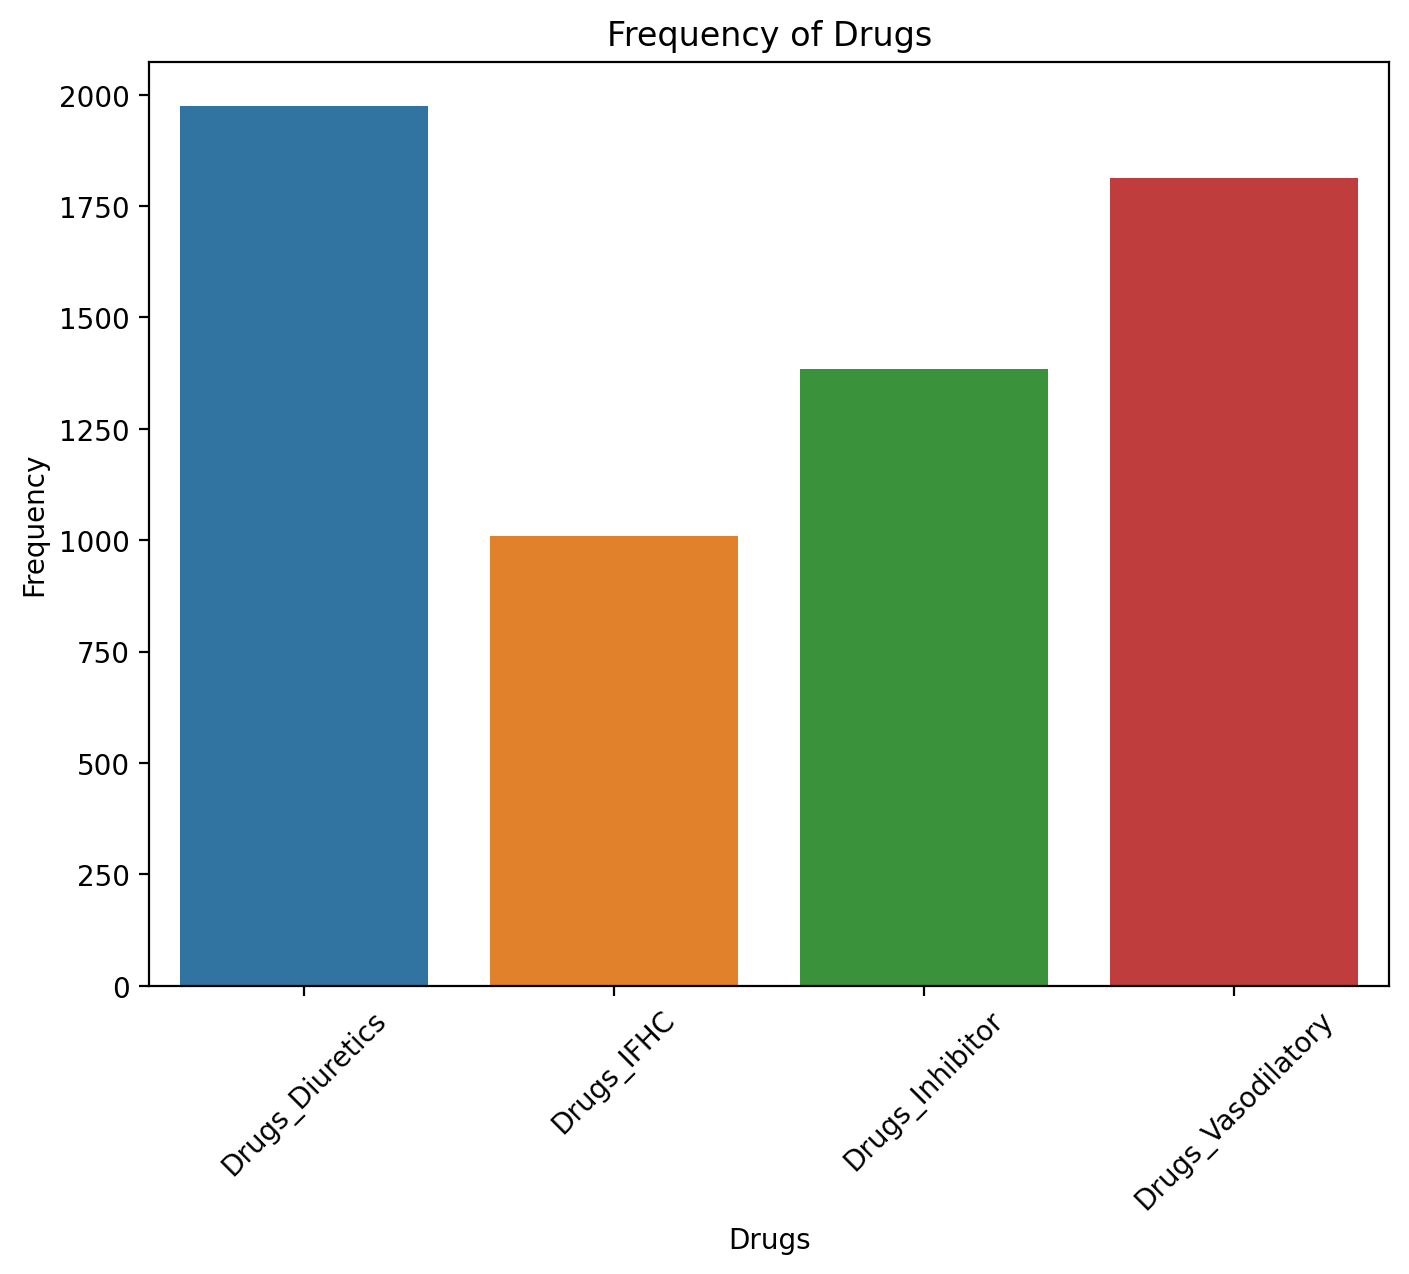

In [22]:
# Count the frequency of each drug
drug_counts = merged_df[drugs_columns].sum()

# Plotting the frequencies
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=drug_counts.index, y=drug_counts.values)
plt.title('Frequency of Drugs')
plt.xlabel('Drugs')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Inhibitor and drugs that increase force of heart contraction are the two categories with less variables, is therefore reasonable that counting the frequency of the group their bar is lower.
This doesn't imply that they are less used.

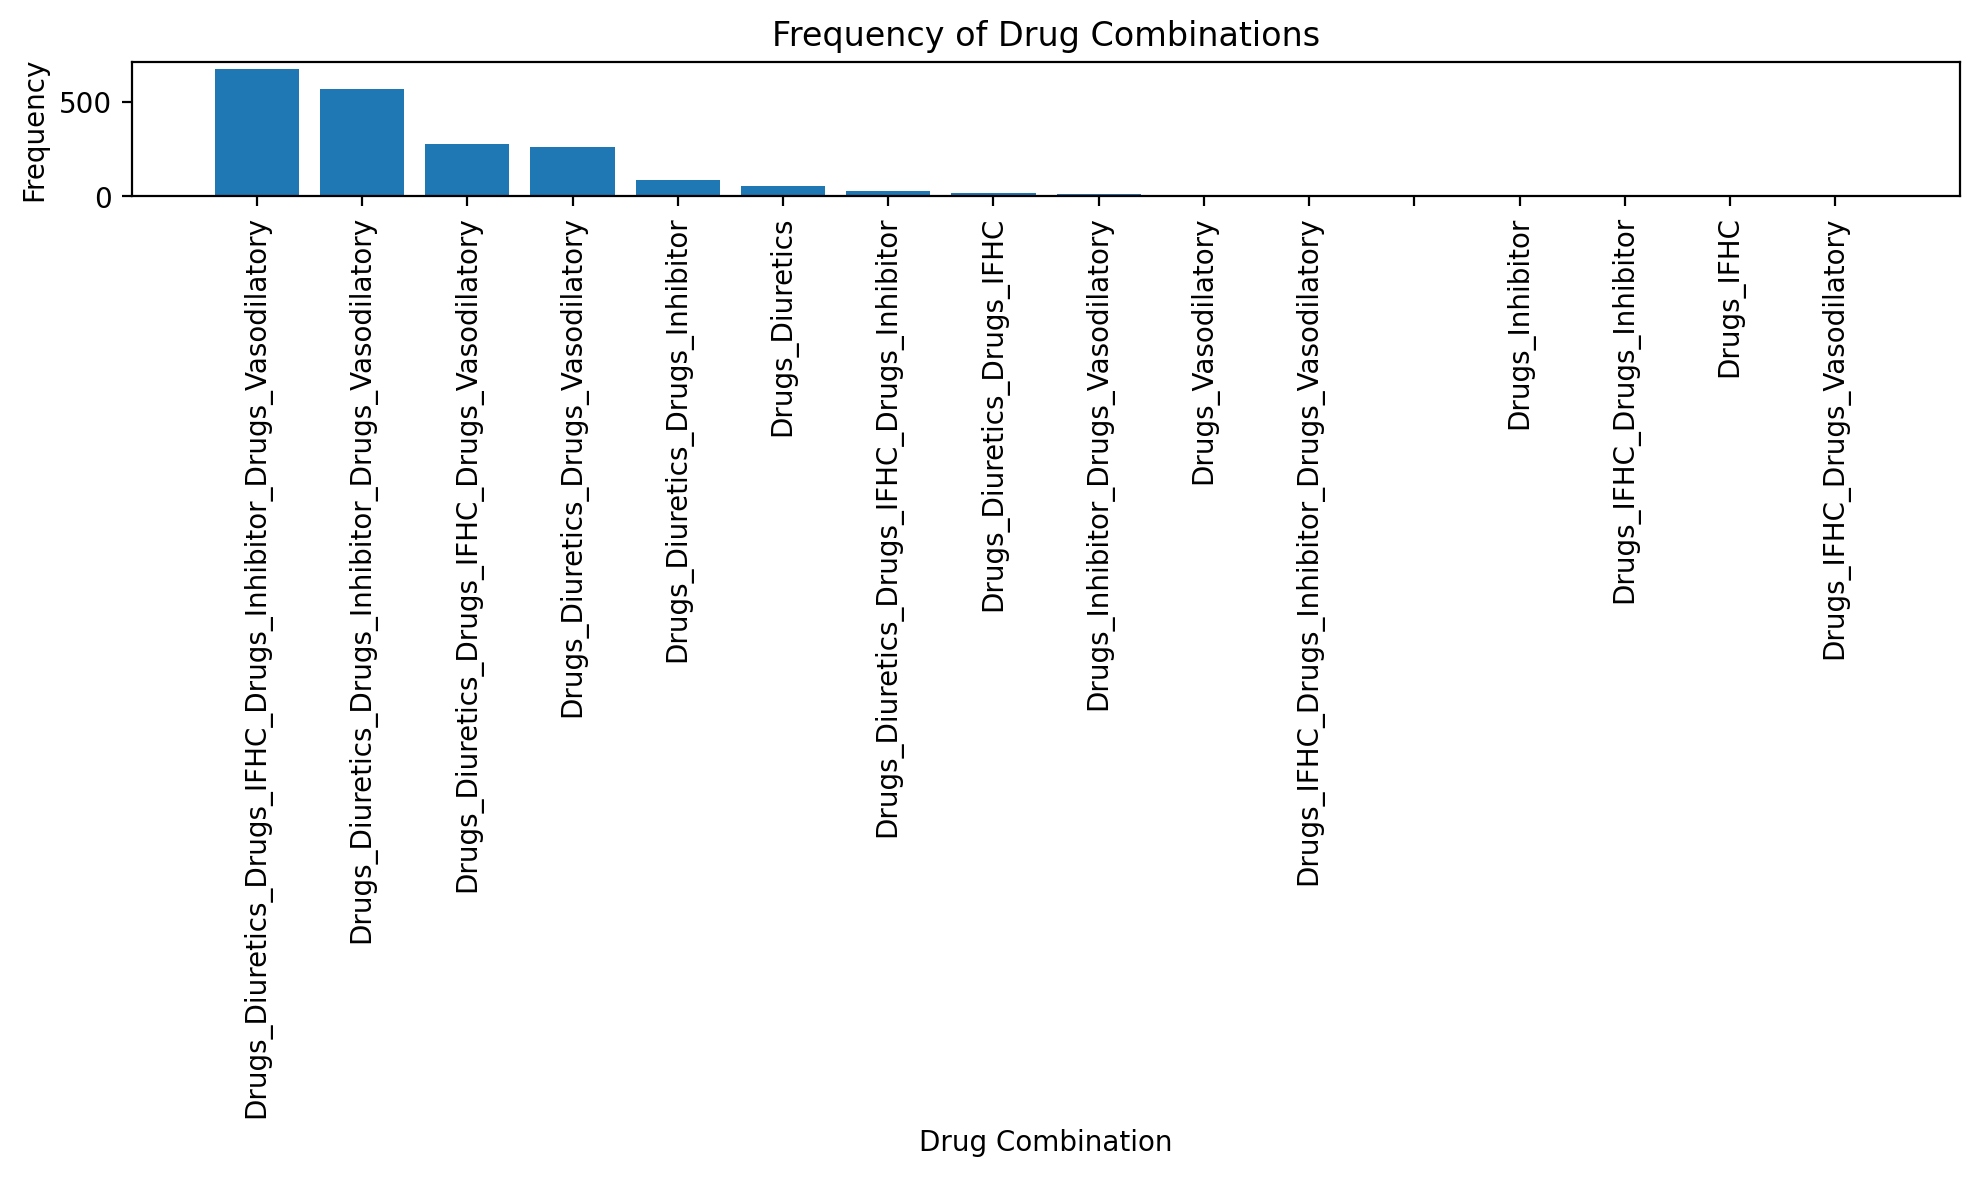

In [23]:
combination_frequency = merged_df[drugs_columns].apply(lambda row: '_'.join([col for col, val in zip(drugs_columns, row) if val]), axis=1).value_counts()
combination_frequency = combination_frequency.reset_index()

# Rename the columns for clarity
combination_frequency.columns = ['DrugCombination', 'Frequency']

# Sort the combinations by frequency in descending order
combination_frequency = combination_frequency.sort_values('Frequency', ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(combination_frequency['DrugCombination'], combination_frequency['Frequency'])
plt.xlabel('Drug Combination')
plt.ylabel('Frequency')
plt.title('Frequency of Drug Combinations')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

To assess the importance of drugs, we proceed with our analysis using the merged dataframe, and since we'll implement feature selection methods, we'll be able to state the importance of this information.

In [24]:
INCLUDE_DRUGS = True

In [25]:
if INCLUDE_DRUGS:
    df = merged_df

### Information about the memory usage

We check the memory usage of the `DataFrame`.

In [26]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2008 entries, 857781 to 791864
Columns: 169 entries, DestinationDischarge to Drugs_Vasodilatory
dtypes: float64(123), int64(31), object(15)
memory usage: 4.2 MB


### Setting the correct column type

To reduce the memory usage and facilitate the overall performance, let's set properly the column types, starting by investigating which types Pandas has assigned to the columns.

In [27]:
# get the data types of each column
dtypes = df.dtypes

# count the number of columns of each type
counts = dtypes.value_counts()

# print the counts
print(counts)

float64    123
int64       31
object      15
dtype: int64


Now let's look closer to which columns have which type (output commented for being too long)

In [28]:
# group the column names by type
type_dict = {}
for col, dtype in dtypes.items():
    if dtype not in type_dict:
        type_dict[dtype] = []
    type_dict[dtype].append(col)

# print the number of columns of each type
# print("Number of columns by type:")
# for dtype, cols in type_dict.items():
#     print(f"• {dtype}: {len(cols)} columns ({', '.join(cols)})")
#     print('-'*80)

Now let's dive even deeper and see the values per feature to see if the type is correct

In [29]:
# print value counts for categorical and boolean columns
# for dtype, cols in type_dict.items():
#     if dtype == 'float64': # skip continuous
#         continue
#     if not cols:
#         continue
#     print(f"Value counts for {dtype} columns:\n")
#     for col in cols:
#         print(df[col].value_counts(), '\n')
#     print('-'*80)

Now that we know what to correct, let's perform the changes

In [30]:
df = df.astype({
    'DestinationDischarge': 'category',
    'admission.ward': 'category',
    'admission.way': 'category',
    'occupation': 'category',
    'discharge.department': 'category',
    'gender': 'category',
    'type.of.heart.failure': 'category',
    'NYHA.cardiac.function.classification': 'category',
    'Killip.grade': 'category',
    'type.II.respiratory.failure': 'category',
    'consciousness': 'category',
    'respiratory.support.': 'category',
    'oxygen.inhalation': 'category',
    'outcome.during.hospitalization': 'category',
    'ageCat': 'category',
    'myocardial.infarction': 'bool',
    'congestive.heart.failure': 'bool',
    'peripheral.vascular.disease': 'bool',
    'cerebrovascular.disease': 'bool',
    'dementia': 'bool',
    'Chronic.obstructive.pulmonary.disease': 'bool',
    'connective.tissue.disease': 'bool',
    'diabetes': 'bool',
    'hemiplegia': 'bool',
    'leukemia': 'bool',
    'malignant.lymphoma': 'bool',
    'solid.tumor': 'bool',
    'AIDS': 'bool',
    'acute.renal.failure': 'bool',
    'death.within.28.days': 'bool',
    're.admission.within.28.days': 'bool',
    'death.within.3.months': 'bool',
    're.admission.within.3.months': 'bool',
    'death.within.6.months': 'bool',
    're.admission.within.6.months': 'bool',
    'moderate.to.severe.chronic.kidney.disease': 'bool',
    'peptic.ulcer.disease': 'bool',
    'liver.disease': 'bool'
})

if INCLUDE_DRUGS:
     df = df.astype({
        'Drugs_Diuretics': 'bool',
        'Drugs_IFHC': 'bool',
        'Drugs_Inhibitor': 'bool',
        'Drugs_Vasodilatory': 'bool'
    })

and see if there has been a memory reduce

In [31]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2008 entries, 857781 to 791864
Columns: 169 entries, DestinationDischarge to Drugs_Vasodilatory
dtypes: bool(27), category(15), float64(116), int64(11)
memory usage: 2.0 MB


Here is a recap of the columns types.

In [32]:
df.info(verbose=True, show_counts=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2008 entries, 857781 to 791864
Data columns (total 169 columns):
 #    Column                                                         Dtype   
---   ------                                                         -----   
 0    DestinationDischarge                                           category
 1    admission.ward                                                 category
 2    admission.way                                                  category
 3    occupation                                                     category
 4    discharge.department                                           category
 5    visit.times                                                    int64   
 6    gender                                                         category
 7    body.temperature                                               float64 
 8    pulse                                                          int64   
 9    respiration          

Check the shape of the dataset

In [33]:
df.shape

(2008, 169)

We have 2008 patients and 165 variables + 4 drugs groups.

### Removing duplicates

Remove duplicates rows if there are any.

In [34]:
n_duplicates = df.duplicated().sum()
if not n_duplicates == 0:
    print(f"Removing {n_duplicates} duplicate rows")
    df = df.drop_duplicates()
else:
    print("No duplicate rows found. All good!")

No duplicate rows found. All good!


### Removing inconsistencies

We check if there are inconsistencies by looking at two variables: `DestinationDischarge` and `outcome.during.hospitalization`, when the first is `Died` the second should be `Dead` and vice-versa, therefore we remove patients with this inconsistency.

In [35]:
df[(df['DestinationDischarge'] == 'Died') & (df['outcome.during.hospitalization'] != 'Dead')]

DestinationDischarge admission.ward admission.way  \
inpatient.number                                                     
728787                           Died     Cardiology     Emergency   
768336                           Died    GeneralWard     Emergency   
868748                           Died     Cardiology     Emergency   
753570                           Died     Cardiology     Emergency   
773886                           Died    GeneralWard     Emergency   

                     occupation discharge.department  visit.times  gender  \
inpatient.number                                                            
728787            UrbanResident           Cardiology            1    Male   
768336            UrbanResident          GeneralWard            1  Female   
868748            UrbanResident           Cardiology            1  Female   
753570            UrbanResident           Cardiology            1    Male   
773886                   farmer          GeneralWard            1    Male   

                  body.temperature  pulse  respiration  ...  anion.gap  \
inpatient.number                                        ...              
728787                        36.2    100           22  ...       20.4   
768336                        37.3     60           19  ...        NaN   
868748                        36.0     62           20  ...        9.2   
753570                        36.0     56           18  ...        NaN   
773886                        36.0      0            0  ...        NaN   

                  free.calcium  total.hemoglobin  GCS  dischargeDay   ageCat  \
inpatient.number                                                               
728787                    1.05             179.0   13             9  (79,89]   
768336                     NaN               NaN   15             8  (69,79]   
868748                    0.99             117.0   15             3  (79,89]   
753570                     NaN               NaN   15             1  (59,69]   
773886                     NaN               NaN   15             6  (59,69]   

                 Drugs_Diuretics Drugs_IFHC Drugs_Inhibitor  \
inpatient.number                                              
728787                      True      False            True   
768336                      True       True           False   
868748                      True      False            True   
753570                      True      False           False   
773886                      True      False            True   

                  Drugs_Vasodilatory  
inpatient.number                      
728787                          True  
768336                          True  
868748                          True  
753570                         False  
773886                          True  

[5 rows x 169 columns]

In [36]:
df[(df['DestinationDischarge'] != 'Died') & (df['outcome.during.hospitalization'] == 'Dead')]

DestinationDischarge admission.ward admission.way  \
inpatient.number                                                     
834443                           Home    GeneralWard     Emergency   
828678                        Unknown         Others     Emergency   

                     occupation discharge.department  visit.times gender  \
inpatient.number                                                           
834443            UrbanResident          GeneralWard            3   Male   
828678                      NaN           Cardiology            1   Male   

                  body.temperature  pulse  respiration  ...  anion.gap  \
inpatient.number                                        ...              
834443                        36.3     68           19  ...        NaN   
828678                        36.5     98           22  ...       43.7   

                  free.calcium  total.hemoglobin  GCS  dischargeDay   ageCat  \
inpatient.number                                                               
834443                     NaN               NaN    3            17  (79,89]   
828678                    1.14             132.0   11             3  (69,79]   

                 Drugs_Diuretics Drugs_IFHC Drugs_Inhibitor  \
inpatient.number                                              
834443                      True      False            True   
828678                      True      False            True   

                  Drugs_Vasodilatory  
inpatient.number                      
834443                         False  
828678                          True  

[2 rows x 169 columns]

In [37]:
df = df.drop(df[(df['DestinationDischarge'] == 'Died') & (df['outcome.during.hospitalization'] != 'Dead')].index)
df = df.drop(df[(df['DestinationDischarge'] != 'Died') & (df['outcome.during.hospitalization'] == 'Dead')].index)

### Removing outcome-related variables

Since we're interested in predicting the re-admission at 6 months, it's important to have a look at the following features:
- `death.within.28.days`
- `re.admission.within.28.days`
- `death.within.3.months`
- `re.admission.within.3.months`
- `death.within.6.months`
- `re.admission.within.6.months` - this is our target
- `time.of.death..days.from.admission.`
- `re.admission.time..days.from.admission.`
- `return.to.emergency.department.within.6.months`
- `time.to.emergency.department.within.6.months`

Given that some patients died before the 6 months, such patients present a target of `0` since they haven't been re-admitted, not because they're healthy, but the exact opposite. Thus keeping them together with living healthy patients doesn't make sense: we remove the dead patients.

In [38]:
# specify the columns to check for True values
cols_to_check = [
    'death.within.28.days',
    'death.within.3.months',
    'death.within.6.months'
]

# remove rows where at least one of the specified columns is True
df = df.loc[~(df[cols_to_check] == True).any(axis=1)]

Now those columns are meaninglesse as they all have the same value, we'll remove them in the next section.

It also makes sense that if we want to predict the re-admission at 6 months, we have no knowledge neither at 3 months nor 28 days. Therefore we can drop these features as well.

Before we do that, we save the re-admission withing 28 days and 3 months for a further development of this work.

In [39]:
y_28d = df['re.admission.within.28.days']
y_3m = df['re.admission.within.3.months']

In [40]:
drop_cols = [
    're.admission.within.28.days',
    're.admission.within.3.months',
    'time.of.death..days.from.admission.',
    're.admission.time..days.from.admission.',
    'return.to.emergency.department.within.6.months',
    'time.to.emergency.department.within.6.months',
]

df = df.drop(drop_cols, axis=1)

In [41]:
df.shape

(1946, 163)

Create an utility to quickly get the names of numerical and categorical features.

In [44]:
def get_num_cat(dataframe):
    return (dataframe.select_dtypes(include=['float64', 'int64']).columns,
            dataframe.select_dtypes(include=['object', 'category', 'bool']).columns)

### Removing low-variance variables

In [45]:
cols_numerical, cols_categorical = get_num_cat(df)

Removing categorical variables with 95% dominance.

In [46]:
frequencies = df[cols_categorical].apply(pd.Series.value_counts)

dominant_categories = frequencies.idxmax()

threshold = 0.95

drop_cols = []
for variable, dominant_category in dominant_categories.items():
    dominant_frequency = frequencies.loc[dominant_category, variable] / df[cols_categorical].shape[0]
    if dominant_frequency > threshold:
        drop_cols.append(variable)

print(f'Number of columns: {len(drop_cols)}')
drop_cols

Number of columns: 16


['connective.tissue.disease',
 'peptic.ulcer.disease',
 'hemiplegia',
 'leukemia',
 'malignant.lymphoma',
 'solid.tumor',
 'liver.disease',
 'AIDS',
 'consciousness',
 'respiratory.support.',
 'acute.renal.failure',
 'outcome.during.hospitalization',
 'death.within.28.days',
 'death.within.3.months',
 'death.within.6.months',
 'Drugs_Diuretics']

We can see that almost all patients took a `Drugs_Diuretics`, so it has been discarded and therefore not important for our task.

In [47]:
df = df.drop(drop_cols, axis=1)
cols_numerical, cols_categorical = get_num_cat(df)

Removing numerical variables with 0 variance, i.e. constant variables.

In [48]:
selector = VarianceThreshold(threshold=0)
selector.fit(df[cols_numerical])

const_col = [column for column in cols_numerical
          if column not in cols_numerical[selector.get_support()]]

print(f'Number of columns: {len(const_col)}')
const_col

Number of columns: 2


/Users/teo/.pyenv/versions/datascience/lib/python3.10/site-packages/sklearn/feature_selection/_variance_threshold.py:111: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/Users/teo/.pyenv/versions/datascience/lib/python3.10/site-packages/sklearn/feature_selection/_variance_threshold.py:119: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)


['cholinesterase', 'body.temperature.blood.gas']

In [49]:
df = df.drop(const_col, axis=1)
cols_numerical, cols_categorical = get_num_cat(df)

### Checking for missing values

Identify categorical and numerical variables

In [50]:
def get_percentage_missing(df):
    df_na = df.isnull()
    list_vars = df_na.sum() / len(df_na.index) * 100
    list_vars = list_vars.sort_values(ascending=False)
    list_vars = list_vars[list_vars != 0]
    return list_vars

numerical_missing = get_percentage_missing(df[cols_numerical])
categorical_missing = get_percentage_missing(df[cols_categorical])

for name, features in zip(['numerical', 'categorical'], [numerical_missing, categorical_missing]):
    print(f"Among the {name} features, {len(features)} contain missing values")

Among the numerical features, 105 contain missing values
Among the categorical features, 1 contain missing values


#### Categorical

The single categorical feature that contains missing values is `occupation` with 1.34% of missing values.

In [51]:
categorical_missing

occupation    1.336074
dtype: float64

Given the non-clinical nature of the variable and the low percentage of missing values, we simply decide to impute it.

In [52]:
imputer = SimpleImputer(strategy='most_frequent')
df.occupation = imputer.fit_transform(df.occupation.values.reshape(-1,1))[:,0]

Set its type to `category` since after imputation it's `object`.

In [53]:
df = df.astype({'occupation': 'category'})

In [54]:
cols_numerical, cols_categorical = get_num_cat(df)

#### Numerical

There are many more numerical features with missing values, to understand the amplitude of it, let us plot the percentage of missing values per feature.

In [55]:
def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

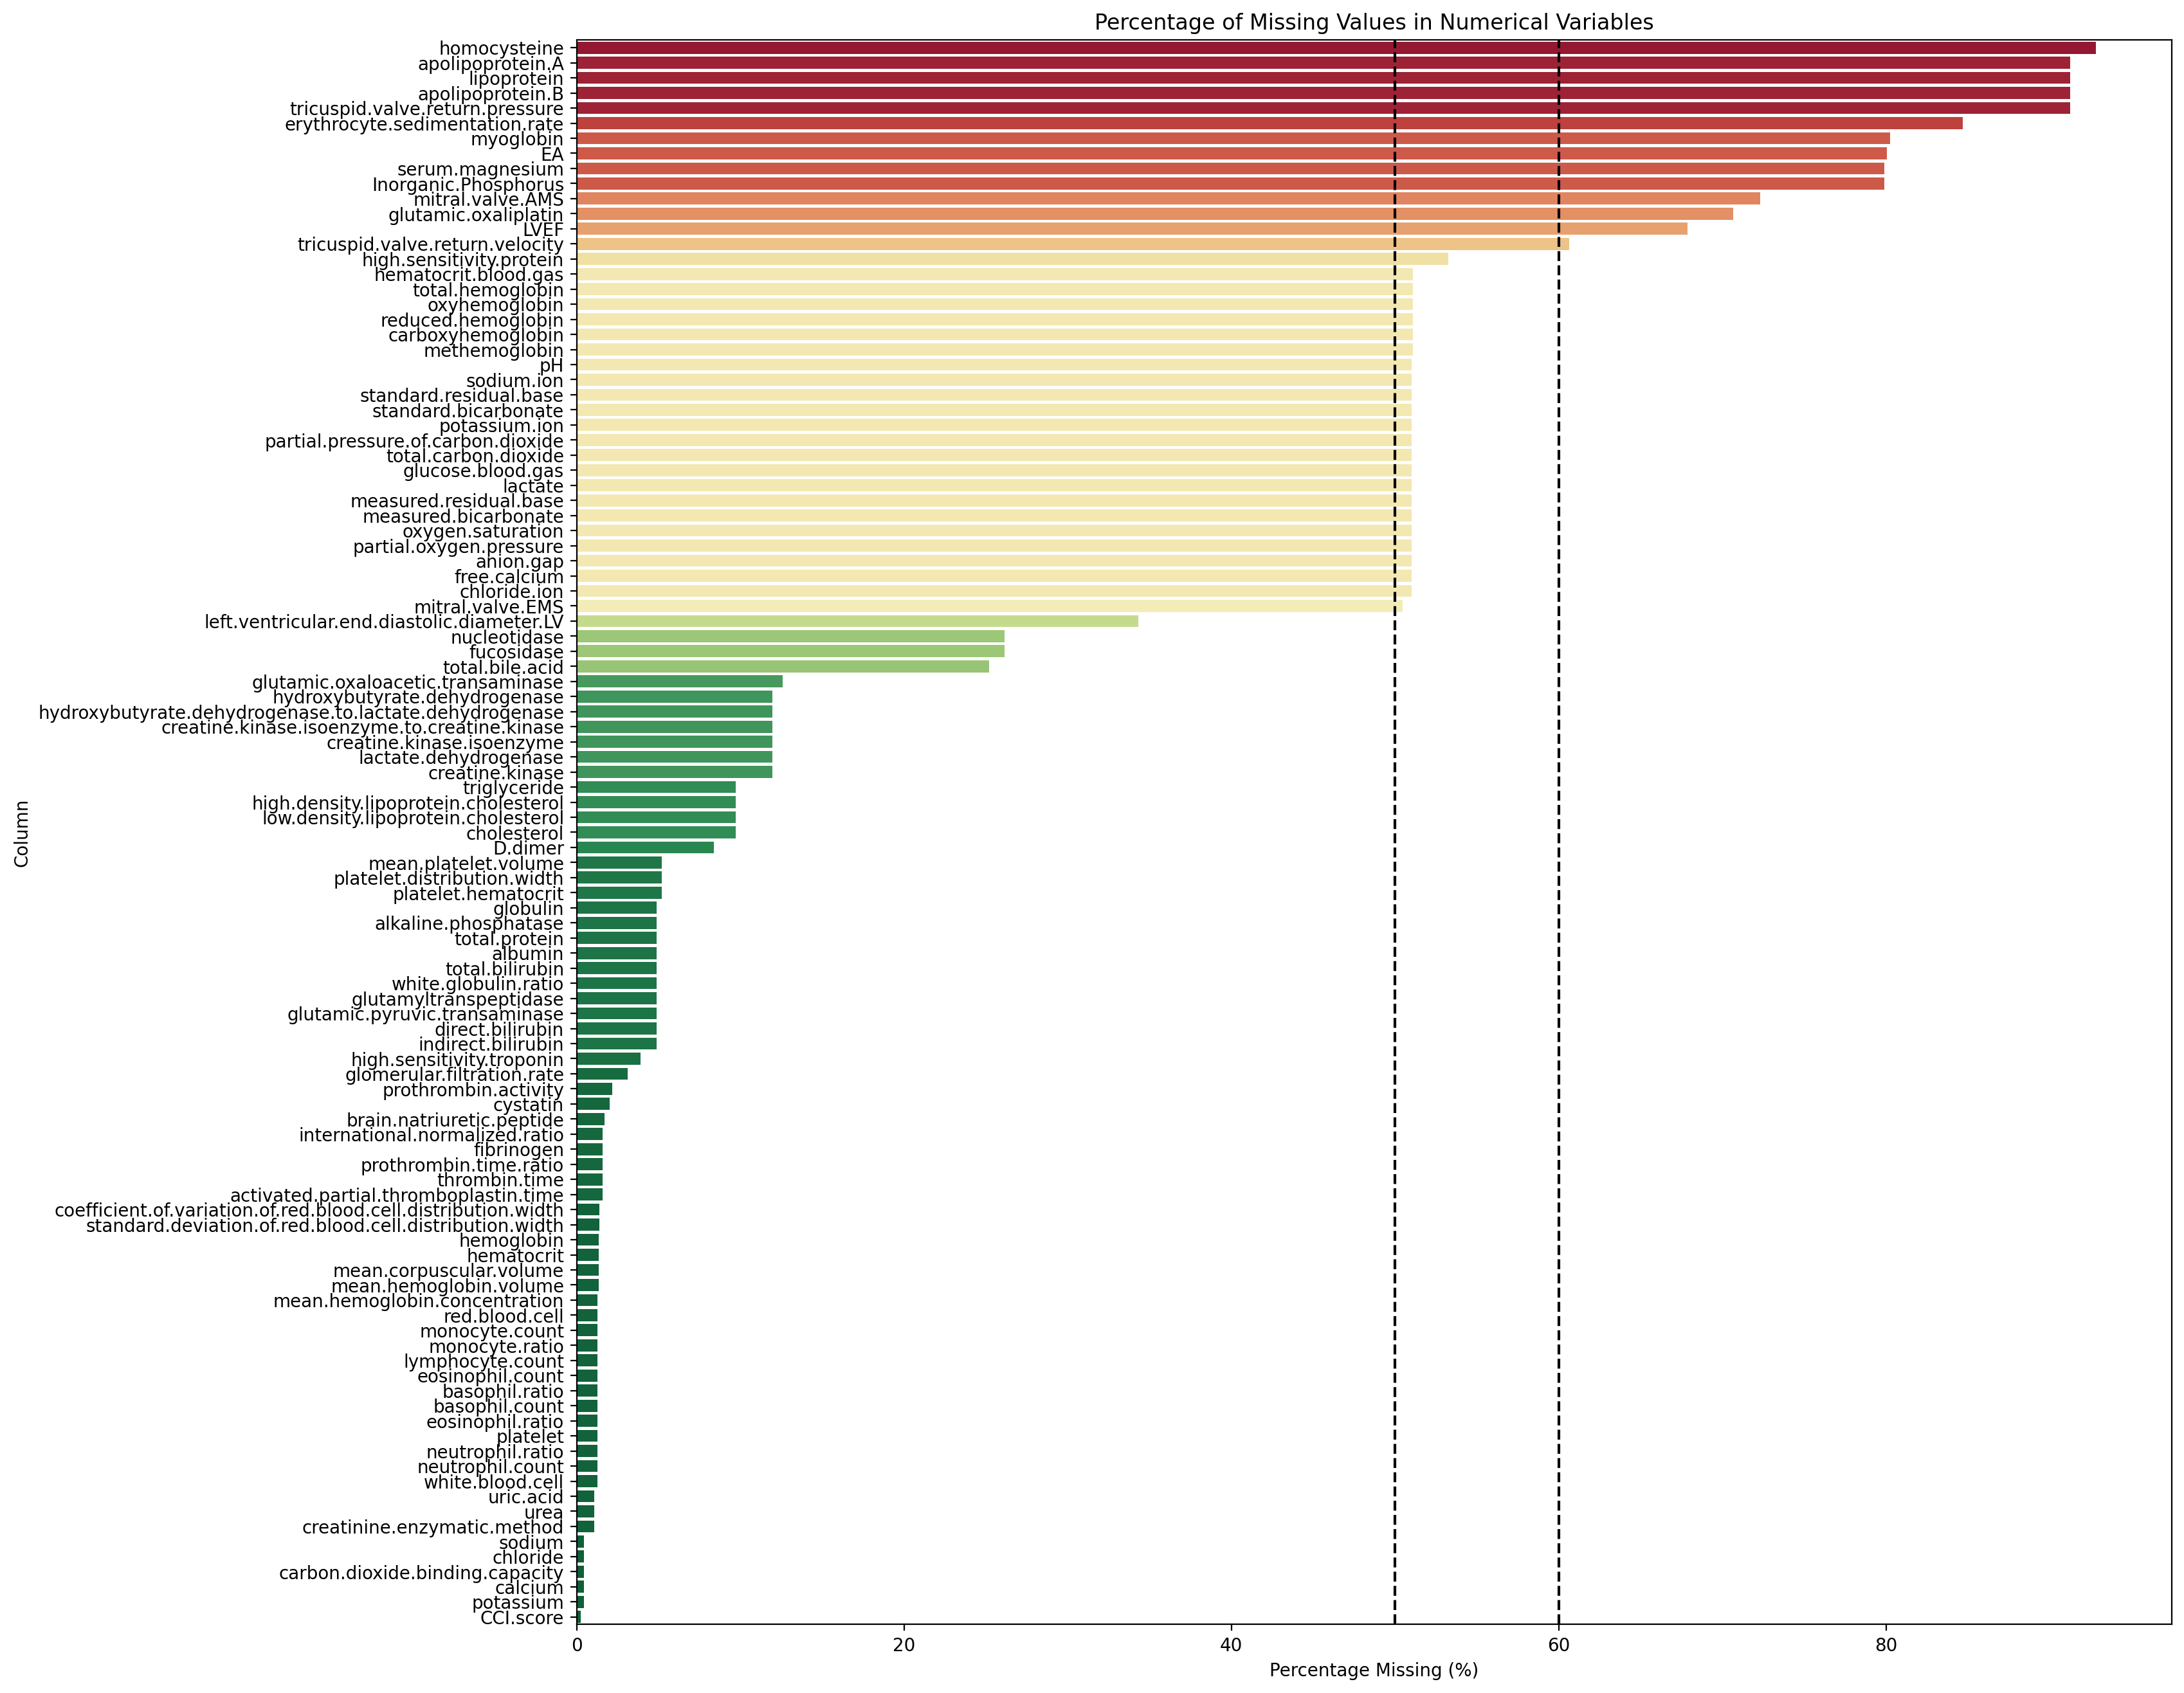

In [56]:
fig, ax = plt.subplots(figsize=(16,16))

# Plot bar charts for discrete and continuous variables
sns.barplot(orient='h', y=numerical_missing.index, x=numerical_missing, ax=ax, palette=colors_from_values(numerical_missing, "RdYlGn_r"))

# Set axis labels and titles for each subplot
ax.set_title('Percentage of Missing Values in Numerical Variables')
ax.set_ylabel('Column')
ax.set_xlabel('Percentage Missing (%)')
ax.axvline(x=50, color='k', linestyle='--')
ax.axvline(x=60, color='k', linestyle='--')
plt.savefig(str(OUTPUT_FOLDER / 'missing_values_percentages.pdf'), bbox_inches='tight')
plt.show()

We delete variables with a missing percentage higher than 60%.

In [57]:
threshold = 0.60

In [58]:
missing_cols = numerical_missing[numerical_missing>(threshold*100)].index.tolist()
print(f'Number of columns with % of NaNs greater than {threshold:.0%}: {len(missing_cols)}')
missing_cols

Number of columns with % of NaNs greater than 60%: 14


['homocysteine',
 'apolipoprotein.A',
 'lipoprotein',
 'apolipoprotein.B',
 'tricuspid.valve.return.pressure',
 'erythrocyte.sedimentation.rate',
 'myoglobin',
 'EA',
 'serum.magnesium',
 'Inorganic.Phosphorus',
 'mitral.valve.AMS',
 'glutamic.oxaliplatin',
 'LVEF',
 'tricuspid.valve.return.velocity']

In [59]:
df = df.drop(missing_cols, axis=1)
cols_numerical, cols_categorical = get_num_cat(df)
numerical_missing = get_percentage_missing(df[cols_numerical])

Variables with missingness between 50%-60% deserve a closer look, because they are many and we don't want to discard too much information. Let us plot their correlation matrix, clustered using hierarchical clustering to see a better block structure.

In [61]:
cols_numerical_missing = numerical_missing[(numerical_missing>50) & (numerical_missing<60)].index.tolist()
print(f'Number of columns with % of NaNs between 50% and 60%: {len(cols_numerical_missing)}')
cols_numerical_missing

Number of columns with % of NaNs between 50% and 60%: 24


['high.sensitivity.protein',
 'reduced.hemoglobin',
 'total.hemoglobin',
 'oxyhemoglobin',
 'carboxyhemoglobin',
 'hematocrit.blood.gas',
 'methemoglobin',
 'potassium.ion',
 'glucose.blood.gas',
 'pH',
 'sodium.ion',
 'partial.pressure.of.carbon.dioxide',
 'total.carbon.dioxide',
 'chloride.ion',
 'measured.bicarbonate',
 'lactate',
 'measured.residual.base',
 'standard.residual.base',
 'oxygen.saturation',
 'partial.oxygen.pressure',
 'anion.gap',
 'free.calcium',
 'standard.bicarbonate',
 'mitral.valve.EMS']

To decide whether it is useful to keep some of these variables we check whether they are highly correlated with variables with a lower percentage of NaN, which would therefore be a better choice.

In [62]:
def analyze_correlation(df, columns, threshold=0.8):

    # Create a list of all the columns
    all_columns = list(df.columns)

    # Create a list of the columns that are not in the list of columns
    other_columns = [column for column in all_columns if column not in columns]
        
    # Create a dataframe with the column as index and the most correlated column and the value of the correlation as columns
    output = pd.DataFrame(index=columns, columns=['most_correlated_column', 'correlation'])

    # For each column in the list of columns
    for column in columns:
        
        # Create a list of the correlations between the column and the other columns
        correlations = [df[column].corr(df[other_column]) for other_column in other_columns]

        # Find the index of the column that is most correlated to the column
        max_index = np.argmax(np.absolute(correlations))

        # If the correlation is above a threshold
        if correlations[max_index] > threshold:
                    
            # Set the most correlated column and the value of the correlation in the dataframe
            # Round the correlation to 2 decimals
            output.loc[column, 'most_correlated_column'] = other_columns[max_index]
            output.loc[column, 'correlation'] = np.round(correlations[max_index], 2)
        
        # If the correlation is below a threshold
        else:
                        
            # Set the most correlated column to None and the value of the correlation to None
            output.loc[column, 'most_correlated_column'] = None
            output.loc[column, 'correlation'] = None
    
    # Return the dataframe
    return output

For each of the variables with 50%-60% missingness, we have the column in the sub-50% to which it's most correlated, and with which value (and a threshold).

In [63]:
df_correlation_analysis = analyze_correlation(df[cols_numerical], cols_numerical_missing)
df_correlation_analysis

most_correlated_column  \
high.sensitivity.protein                                       None   
reduced.hemoglobin                                             None   
total.hemoglobin                                         hemoglobin   
oxyhemoglobin                                                  None   
carboxyhemoglobin                                              None   
hematocrit.blood.gas                                     hemoglobin   
methemoglobin                                                  None   
potassium.ion                                             potassium   
glucose.blood.gas                                              None   
pH                                                             None   
sodium.ion                                                   sodium   
partial.pressure.of.carbon.dioxide                             None   
total.carbon.dioxide                carbon.dioxide.binding.capacity   
chloride.ion                                               chloride   
measured.bicarbonate                carbon.dioxide.binding.capacity   
lactate                                                        None   
measured.residual.base              carbon.dioxide.binding.capacity   
standard.residual.base              carbon.dioxide.binding.capacity   
oxygen.saturation                                              None   
partial.oxygen.pressure                                        None   
anion.gap                                                      None   
free.calcium                                                   None   
standard.bicarbonate                                           None   
mitral.valve.EMS                                               None   

                                   correlation  
high.sensitivity.protein                  None  
reduced.hemoglobin                        None  
total.hemoglobin                          0.89  
oxyhemoglobin                             None  
carboxyhemoglobin                         None  
hematocrit.blood.gas                      0.84  
methemoglobin                             None  
potassium.ion                             0.84  
glucose.blood.gas                         None  
pH                                        None  
sodium.ion                                0.88  
partial.pressure.of.carbon.dioxide        None  
total.carbon.dioxide                      0.83  
chloride.ion                              0.88  
measured.bicarbonate                      0.84  
lactate                                   None  
measured.residual.base                     0.8  
standard.residual.base                    0.82  
oxygen.saturation                         None  
partial.oxygen.pressure                   None  
anion.gap                                 None  
free.calcium                              None  
standard.bicarbonate                      None  
mitral.valve.EMS                          None

In [64]:
# Extract columns with a correlation above a threshold
drop_cols = df_correlation_analysis[df_correlation_analysis['most_correlated_column'].notnull()].index.tolist()
print(f'Number of columns: {len(drop_cols)}')
drop_cols

Number of columns: 9


['total.hemoglobin',
 'hematocrit.blood.gas',
 'potassium.ion',
 'sodium.ion',
 'total.carbon.dioxide',
 'chloride.ion',
 'measured.bicarbonate',
 'measured.residual.base',
 'standard.residual.base']

In [65]:
df = df.drop(drop_cols, axis=1)
cols_numerical, cols_categorical = get_num_cat(df)
numerical_missing = get_percentage_missing(df[cols_numerical])
cols_numerical_missing = numerical_missing[(numerical_missing>50) & (numerical_missing<60)].index.tolist()

Let's see the correlation withing the 50%-60% group.

In [66]:
def plot_clustered_correlation_matrix(dataframe, name='clustered_correlation_matrix'):
    
    corr_matrix = dataframe.corr()
    
    # Use correlation matrix as distance
    pdist = spc.distance.pdist(abs(corr_matrix.values))

    linkage = spc.linkage(pdist, method='complete')
    idx = spc.fcluster(linkage, 0.5 * pdist.max(), 'distance')

    columns = [dataframe.columns.tolist()[i] for i in list((np.argsort(idx)))]
    dataframe = dataframe.reindex(columns, axis=1)

    corr_matrix = dataframe.corr()

    # Create a correlation heatmap
    plt.figure(figsize=(20, 15))
    sns.heatmap(corr_matrix, annot=False, vmin=-1, vmax=1, cmap='RdBu_r') # 'bwr' 'coolwarm'
    plt.title('Correlation Heatmap')
    plt.savefig(str(OUTPUT_FOLDER / str(name+'.pdf')), bbox_inches='tight')
    plt.show()

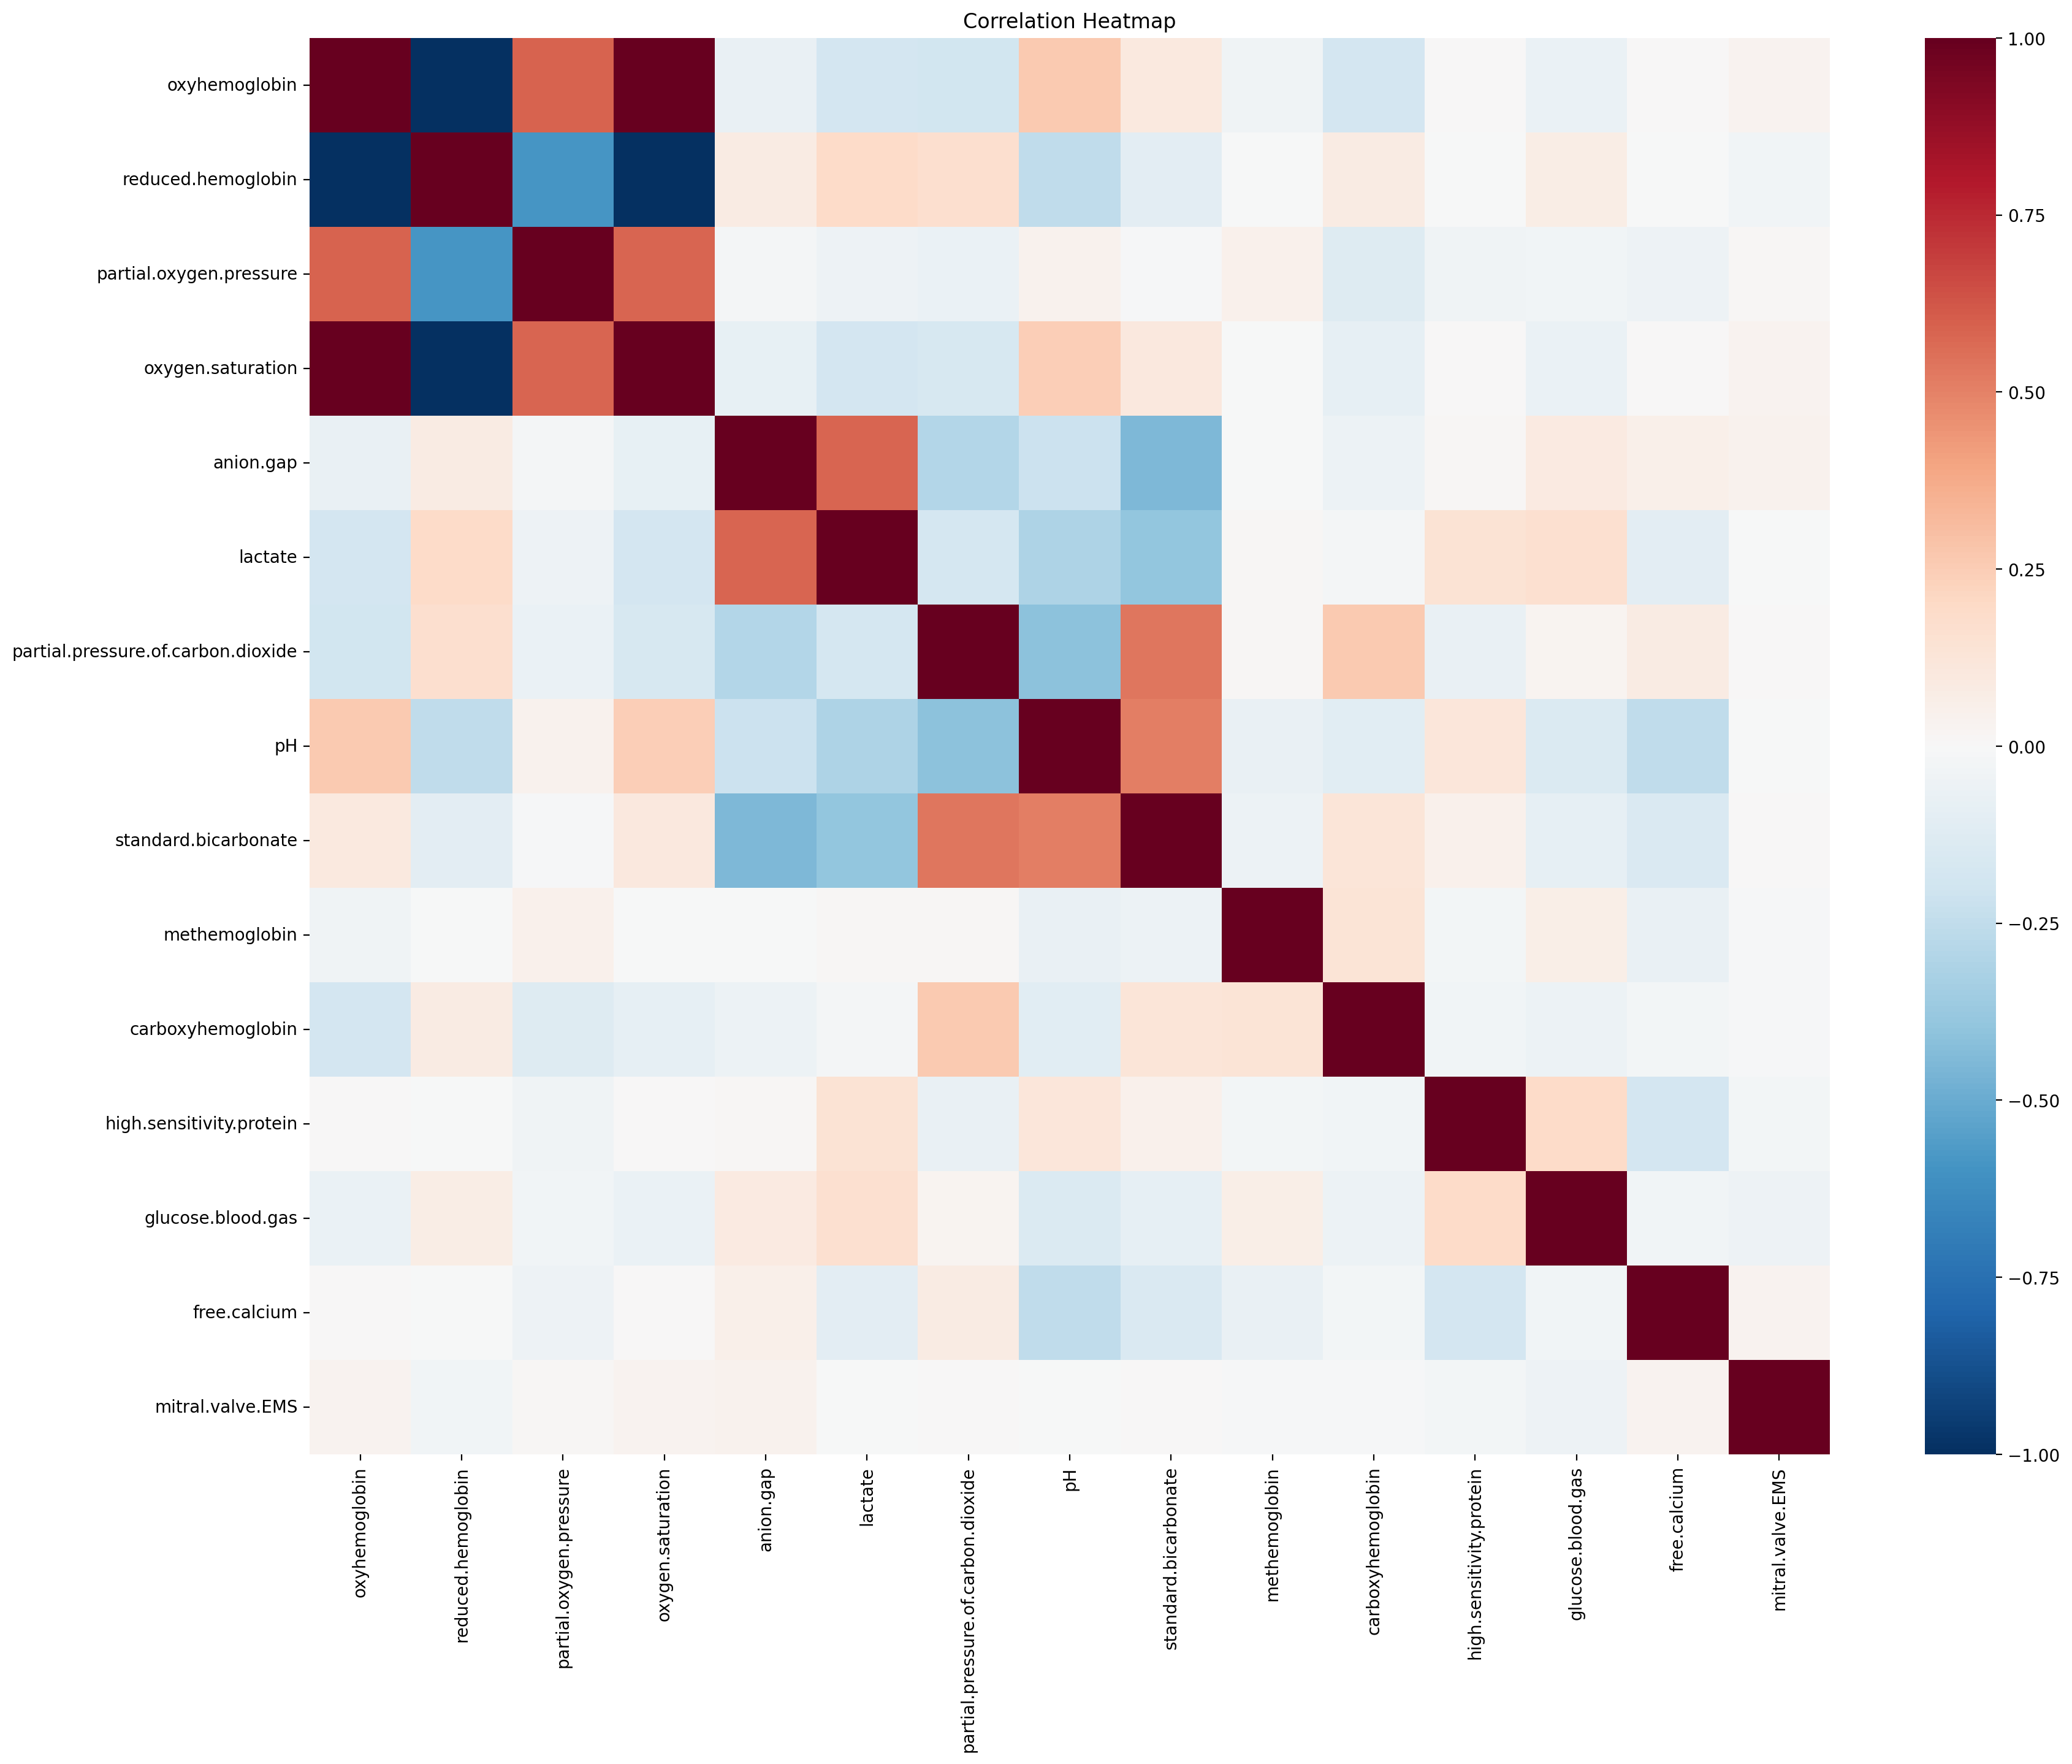

In [67]:
plot_clustered_correlation_matrix(df[cols_numerical_missing], name='clustered_correlation_matrix')

Since we can see a very correlated block of 4 variables in the upper-left corner, mostly related to oxygen level, let's just keep `oxygen.saturation`.

In [68]:
drop_cols = [
    'oxyhemoglobin',
    'reduced.hemoglobin',
    'partial.oxygen.pressure'
]

df = df.drop(drop_cols, axis=1)
cols_numerical, cols_categorical = get_num_cat(df)

In [69]:
df.shape

(1946, 119)

### Data visualization

#### Histograms of numerical variables

Let us plot them in a big grid to have an understanding of the distribution of numerical variables.

In [70]:
len(cols_numerical)

95

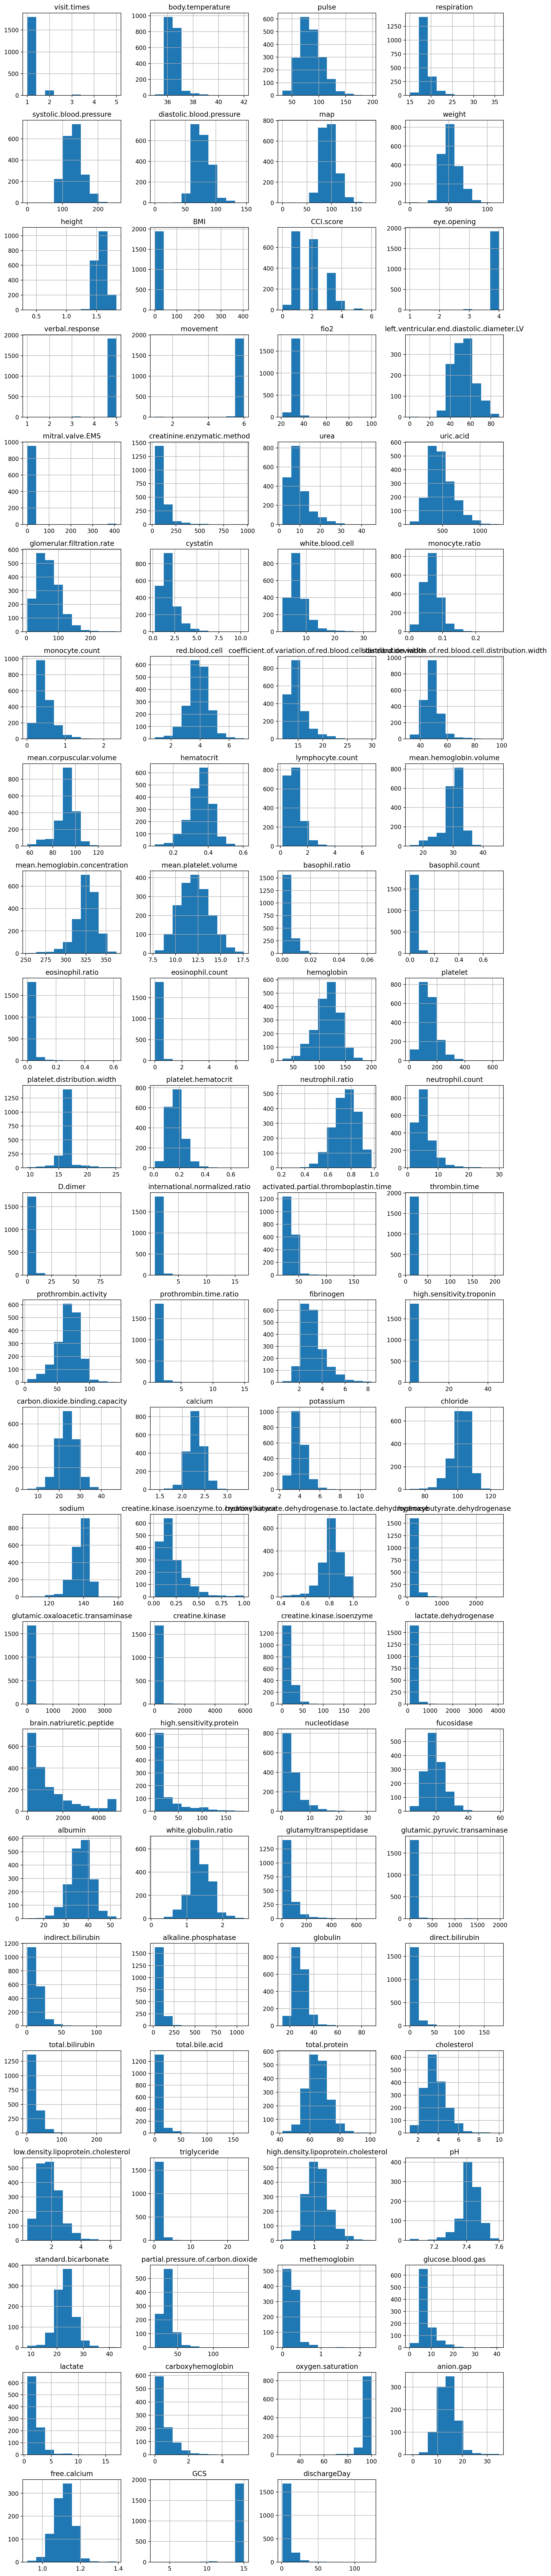

In [71]:
df[cols_numerical].hist(layout=(24,4), figsize=(15,80))
plt.show()

#### Outlier detection

We can immediately see that some histograms present a very wide range of values, we can leverage this knowledge to find some outliers. Let us also look at a box plot of all these features.

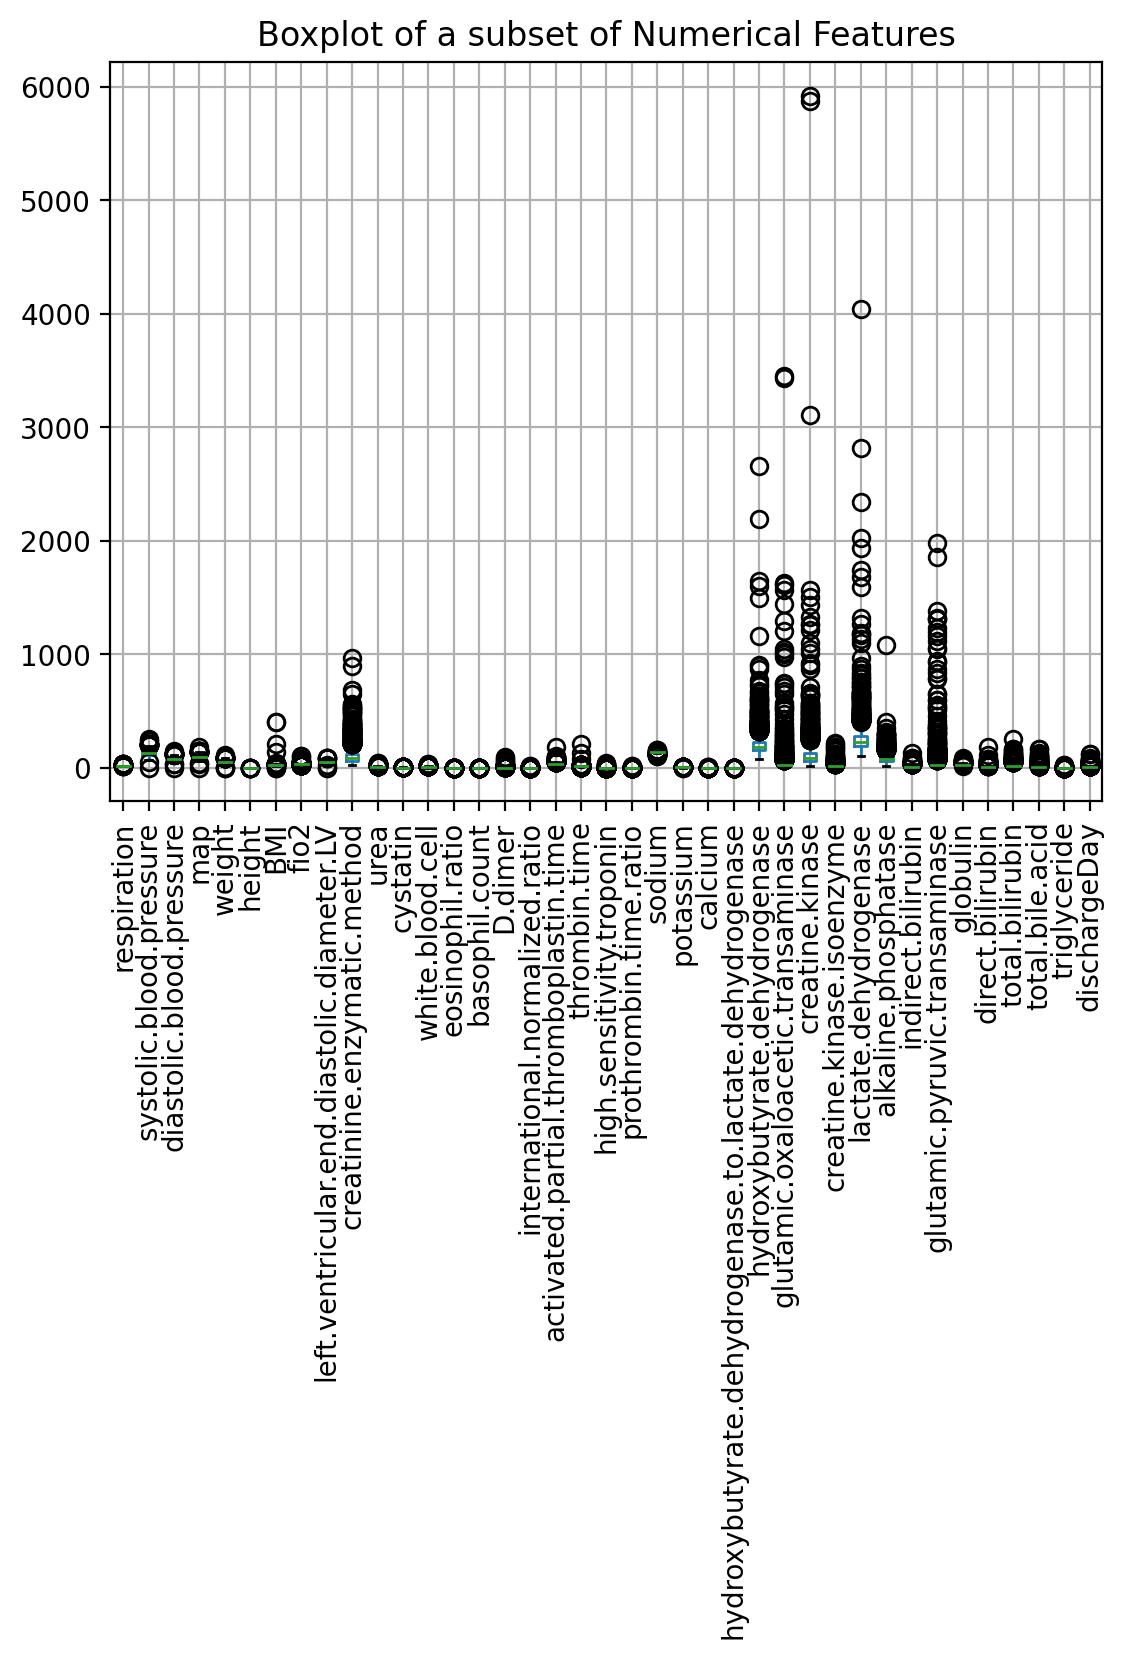

In [72]:
col_inspect = [
    'respiration',
    'systolic.blood.pressure',
    'diastolic.blood.pressure',
    'map',
    'weight',
    'height',
    'BMI',
    'fio2',
    'left.ventricular.end.diastolic.diameter.LV',
    'creatinine.enzymatic.method',
    'urea',
    'cystatin',
    'white.blood.cell',
    'eosinophil.ratio',
    'basophil.count',
    'D.dimer',
    'international.normalized.ratio',
    'activated.partial.thromboplastin.time',
    'thrombin.time',
    'high.sensitivity.troponin',
    'prothrombin.time.ratio',
    'sodium',
    'potassium',
    'calcium',
    'hydroxybutyrate.dehydrogenase.to.lactate.dehydrogenase',
    'hydroxybutyrate.dehydrogenase',
    'glutamic.oxaloacetic.transaminase',
    'creatine.kinase',
    'creatine.kinase.isoenzyme',
    'lactate.dehydrogenase',
    'alkaline.phosphatase',
    'indirect.bilirubin',
    'glutamic.pyruvic.transaminase',
    'globulin',
    'direct.bilirubin',
    'total.bilirubin',
    'total.bile.acid',
    'triglyceride',
    'dischargeDay'
]

df[col_inspect].boxplot()
plt.title('Boxplot of a subset of Numerical Features')
plt.tick_params(axis='x', labelrotation=90)
plt.show()

To spot outliers, we compute their z-score and print the values. If we believe that some values are outliers, instead of discarding completely the entry, we set the value to `NaN`, to be recovered during the imputation later in the analysis.

In [73]:
def get_outliers(df, feature, threshold=3):

    df2 = df.copy()

    # calculate the Z-score for each value in the 'value' column
    df2['zscore'] = (df2[feature] - df2[feature].mean()) / df2[feature].std(ddof=0)

    # identify outliers as any value with a Z-score greater than threshold or less than -threshold
    outliers = (df2['zscore'] > threshold) | (df2['zscore'] < -threshold)

    return df2[[feature, 'zscore']].loc[outliers]

Let us go through all the values which may present outliers

In [74]:
get_outliers(df, 'respiration', threshold=9)

respiration     zscore
inpatient.number                        
821102                     36  10.100861
815140                     36  10.100861

The average respiratory rate (number of respiratory acts in one minute) is recorded in a range between 16 and 20.
36 respiratory acts in a minute means the patient is likely to have tachypneum or polypneum.
The only non-physical value is 0.

In [75]:
df.loc[df['respiration'] == 0, 'respiration'] = np.nan

In [76]:
get_outliers(df, 'height', threshold=3)

height     zscore
inpatient.number                   
837041              0.48 -11.265461
815731              0.35 -12.611975
805044              0.60 -10.022526
844739              0.35 -12.611975
849063              1.20  -3.807848
770008              1.25  -3.289958

In [77]:
df.loc[df['height'] <= 1.25, ['ageCat','height']]

ageCat  height
inpatient.number                 
837041            (69,79]    0.48
815731            (49,59]    0.35
805044            (59,69]    0.60
844739            (79,89]    0.35
849063            (79,89]    1.20
770008            (69,79]    1.25

In [78]:
df.loc[df['height'] <= 1.25, 'height'] = np.nan

In [79]:
get_outliers(df, 'weight', threshold=3)

weight    zscore
inpatient.number                  
842939              90.0  3.431053
805803              87.0  3.156803
730511               0.0 -4.796462
785878               0.0 -4.796462
775572               0.0 -4.796462
756055               8.0 -4.065127
802143              90.0  3.431053
830900              90.0  3.431053
750702              96.0  3.979554
812598              91.0  3.522470
849269              90.0  3.431053
864249              88.0  3.248219
821768             115.0  5.716474
803906              95.0  3.888137
832159              92.0  3.613887

In [80]:
df.loc[df['weight'] <= 8, 'weight'] = np.nan

In [81]:
get_outliers(df, 'body.temperature', threshold=6)

body.temperature     zscore
inpatient.number                             
769113                        42.0  12.817972
797995                        39.1   6.160177

In [82]:
get_outliers(df, 'BMI', threshold=1)

BMI     zscore
inpatient.number                       
837041            212.673611  13.784434
815731            404.081633  27.608019
805044            138.888889   8.455664
730511              0.000000  -1.574961
785878              0.000000  -1.574961
775572              0.000000  -1.574961
756055              3.462604  -1.324890
844739            404.081633  27.608019
851158             35.671819   1.001275
864249             39.111111   1.249663
821768             37.551020   1.136992
849063             36.805556   1.083154

According to the World Health Organization (WHO) a healthy subject is indicated by a `BMI` between 18.5-24.9.

The threshold value of `BMI` in adults is 25 for overweight and 30 for obesity.

In the underweight condition, the `BMI` does not reach the value of 18.5.

In [83]:
df.loc[(df['BMI'] >= 100) | (df['BMI'] == 0), 'BMI'] = np.nan

In [84]:
get_outliers(df, 'fio2', threshold=3)

fio2     zscore
inpatient.number                 
731871              60   6.630722
806277              45   3.012883
735677              45   3.012883
791702              54   5.183586
830537              54   5.183586
814085              80  11.454507
815140              60   6.630722
864210              55   5.424776
830368             100  16.278293
846474              45   3.012883
777858             100  16.278293
803770              50   4.218829

`fio2` is the fraction of inspired oxygenation (%).

`fio2` is 21(%) if the patient is in spontaneous breathing without oxygen supplements.

If the patient has an oxygen supplement the `fio2` is a fraction variable according to the amount of Oxygen inhaled, which depends on various factors: oxygen flows, presence or absence of reservoir, respiratory rate, total volume.

The `fio2` can be setted by the clinician himself.

Even though 100% is not unfeasible, we decide to discard it to avoid numerical instabilities.

In [85]:
df.loc[(df['fio2'] == 100), 'fio2'] = np.nan

In [86]:
get_outliers(df, 'systolic.blood.pressure', threshold=3)

systolic.blood.pressure    zscore
inpatient.number                                   
780534                                210  3.230077
727376                                252  4.954524
789207                                205  3.024786
866587                                 50 -3.339243
772793                                209  3.189019
764993                                  0 -5.392155
737994                                210  3.230077
731808                                210  3.230077
816228                                209  3.189019
820920                                232  4.133359

In a healthy subject the `systolic.blood.pressure` must be around 120 mmHg.

Subjects with pressure >140 mmHg suffer of hypertension.

The patient who has a pressure equal to 50 mmHg is probably affected by hypotension.

Values = 0 or >200 are outliers.

In [87]:
df.loc[(df['systolic.blood.pressure'] >= 200) | (df['systolic.blood.pressure'] == 0), 'systolic.blood.pressure'] = np.nan

In [88]:
get_outliers(df, 'diastolic.blood.pressure', threshold=4)

diastolic.blood.pressure    zscore
inpatient.number                                    
727376                                 146  4.857200
764993                                   0 -5.385341

In a healthy subject the `diastolic.blood.pressure` must be around 80 mmHg.

Subjects with pressure >110 mmHg suffer of hypertension.

In [89]:
df.loc[(df['diastolic.blood.pressure'] >= 110) | (df['diastolic.blood.pressure'] == 0), 'diastolic.blood.pressure'] = np.nan

In [90]:
get_outliers(df, 'map', threshold=3)

map    zscore
inpatient.number                      
780534            149.333333  3.390236
727376            181.333333  5.385197
870127             44.666667 -3.134950
866587             36.666667 -3.633690
764993              0.000000 -5.919583
858697            146.666667  3.223989
731808            150.000000  3.431798
741379            143.333333  3.016181
769922            146.666667  3.223989
799605            150.000000  3.431798
739173            143.333333  3.016181
816228            148.333333  3.327893
820920            150.666667  3.473359
736334            143.333333  3.016181

`map` is the Mean Arterial Pressure.

The normal `map` range is 70-100 mmHg.

`map` that deviate from this range for prolonged periods of time can have drastic negative effects on the body.

In [91]:
df.loc[df['map'] == 0, 'map'] = np.nan

In [92]:
get_outliers(df, 'left.ventricular.end.diastolic.diameter.LV', threshold=3)

left.ventricular.end.diastolic.diameter.LV    zscore
inpatient.number                                                      
805096                                                  0.93 -4.798047
728768                                                 88.00  3.233776
743698                                                  0.30 -4.856162
777934                                                 87.00  3.141530
810832                                                 88.00  3.233776
729704                                                 86.00  3.049285

Left Ventricular end Diastolic Diameter LV (cm) normal range: 3.5-5.6 cm.

From the histogram we can see that the values are not in cm.

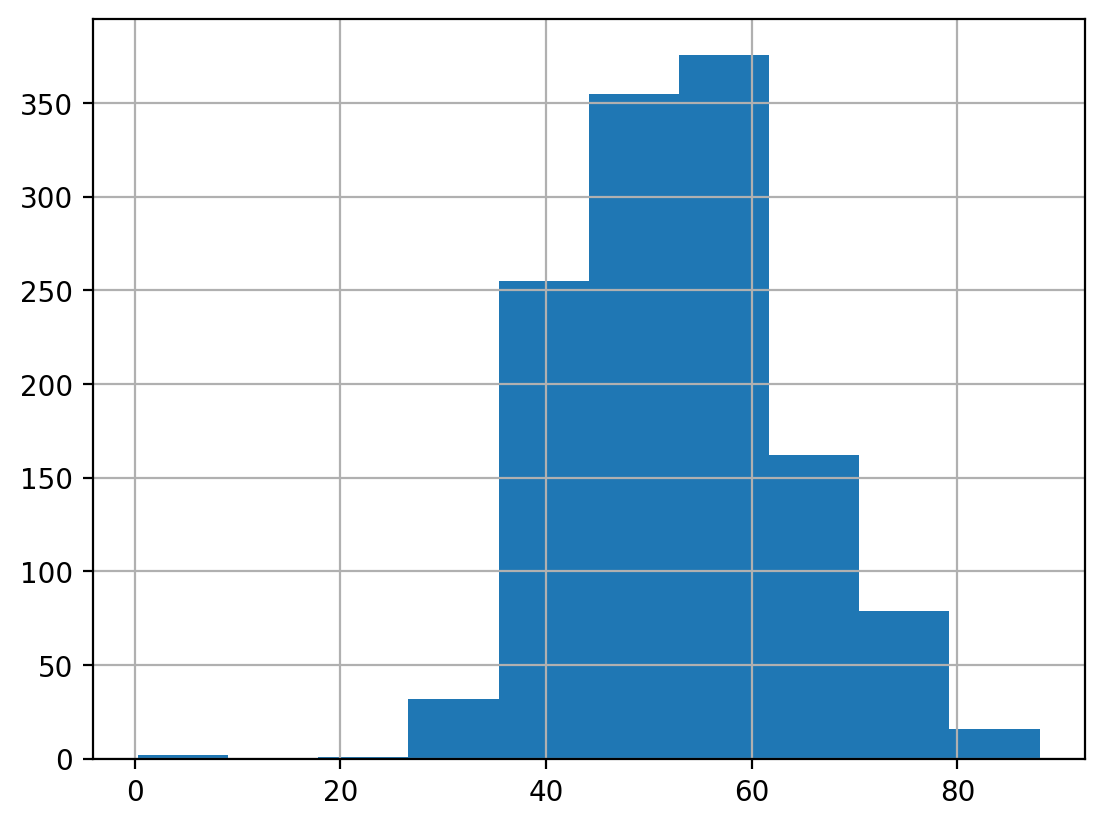

In [93]:
df['left.ventricular.end.diastolic.diameter.LV'].hist()
plt.show()

In [94]:
df['left.ventricular.end.diastolic.diameter.LV'] = df['left.ventricular.end.diastolic.diameter.LV'] / 10

Repeat the outlier analysis

In [95]:
get_outliers(df, 'left.ventricular.end.diastolic.diameter.LV', threshold=3)

left.ventricular.end.diastolic.diameter.LV    zscore
inpatient.number                                                      
805096                                                 0.093 -4.798047
728768                                                 8.800  3.233776
743698                                                 0.030 -4.856162
777934                                                 8.700  3.141530
810832                                                 8.800  3.233776
729704                                                 8.600  3.049285

In [96]:
df.loc[df['left.ventricular.end.diastolic.diameter.LV'] < 0.1, 'left.ventricular.end.diastolic.diameter.LV'] = np.nan

In [97]:
get_outliers(df, 'creatinine.enzymatic.method', threshold=8)

creatinine.enzymatic.method     zscore
inpatient.number                                        
859541                                  897.1  10.463459
830537                                  963.4  11.341196

`creatinine.enzymatic.method` normal range: 44-110 $\mu$mol/L

In [98]:
df.loc[df['creatinine.enzymatic.method'] > 200, 'creatinine.enzymatic.method'] = np.nan

In [99]:
get_outliers(df, 'urea', threshold=4)

urea    zscore
inpatient.number                 
857297            36.18  5.106689
800350            31.05  4.129153
840048            35.68  5.011412
792818            31.03  4.125342
845261            31.51  4.216807
837061            36.81  5.226737
850176            44.80  6.749253
855364            41.47  6.114713
825046            35.55  4.986641

`urea` (mmol/l), ref:1.7 - 8.3 mmol/L

Abnormal levels of urea and creatine in the blood may be indicative of renal dysfunction.
This means that the kidneys fail to properly eliminate toxic substances in the body.

In [100]:
get_outliers(df, 'cystatin', threshold=6)

cystatin    zscore
inpatient.number                    
868892               10.37  9.291517

`cystatin` (mg/L); ref: 0.51–0.98.

High levels of cysteine in the blood are associated with an increased risk of cardiovascular disease, therefore more likely to suffer diseases such as heart attack, intermittent claudication, ischemic heart disease etc.

In [101]:
df.loc[df['cystatin'] >=10, 'cystatin'] = np.nan

In [102]:
get_outliers(df, 'white.blood.cell', threshold=6)

white.blood.cell    zscore
inpatient.number                            
791945                       28.14  6.033230
819538                       31.46  6.992829
803948                       32.79  7.377246

`white.blood.cell` count (\*10^9/L); ref: 4-10

Leukocytosis, which is the increase in the number of white blood cells above 11, is often caused by the normal response of the body to fight an infection or by certain drugs such as corticosteroids
threshold can be setted >= 11.6.

In [103]:
df.loc[df['white.blood.cell'] >=11.6, 'white.blood.cell'] = np.nan

`eosinophil.ratio` was probably supposed to be a percentage, as we see from the histogram, and since the data information says the ref range is 0.5-5 we multiply by 100 and check outliers.

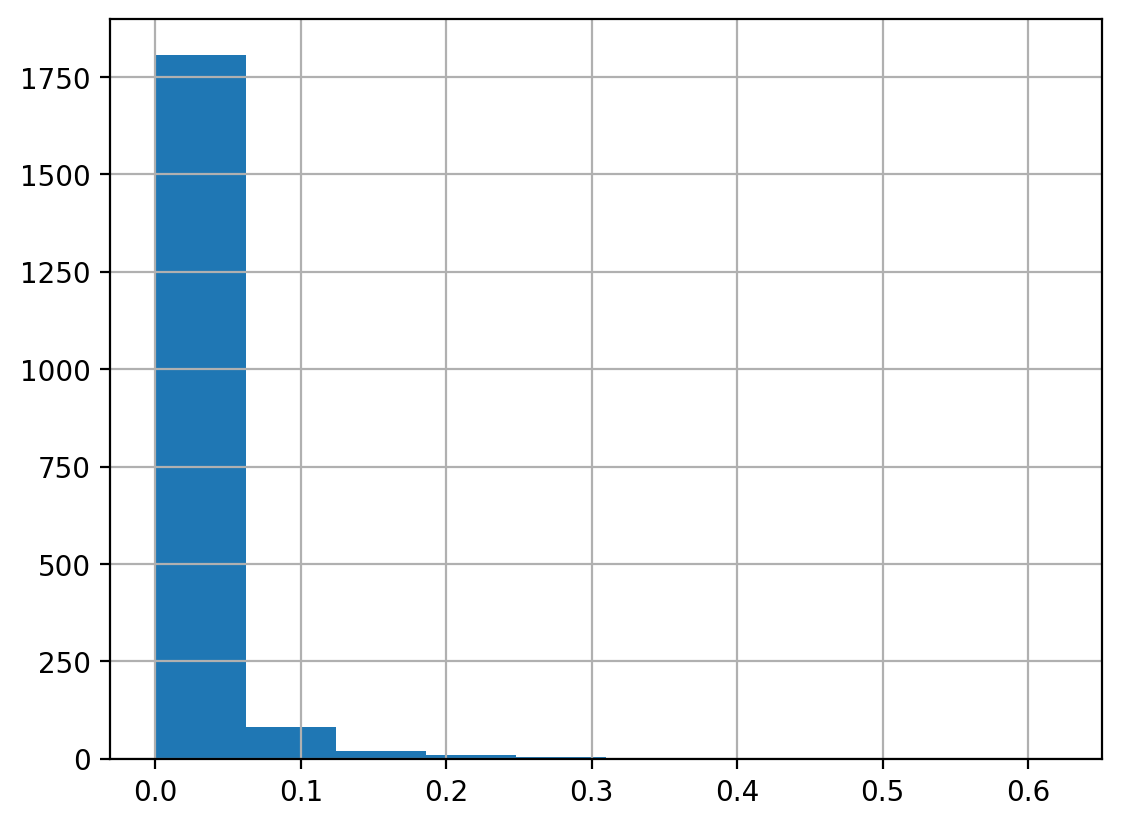

In [104]:
df['eosinophil.ratio'].hist()
plt.show()

In [105]:
df['eosinophil.ratio'] = df['eosinophil.ratio'] * 100

In [106]:
get_outliers(df, 'eosinophil.ratio', threshold=8)

eosinophil.ratio     zscore
inpatient.number                             
814592                        27.6   8.150121
821564                        27.4   8.086746
770722                        62.0  19.050688
869958                        30.0   8.910626

In [107]:
df.loc[df['eosinophil.ratio'] > 30, 'eosinophil.ratio'] = np.nan

In [108]:
get_outliers(df, 'basophil.count', threshold=8)

basophil.count     zscore
inpatient.number                           
792818                      0.28   8.390552
799371                      0.73  23.572896

`basophil.count` (\*10^9/L); ref: 0-0.1

An higher count of basophilis can be a symptom of chronic myeloid leukemia

In [109]:
df.loc[df['basophil.count'] > 0.280, 'basophil.count'] = np.nan

In [110]:
get_outliers(df, 'D.dimer', threshold=8)

D.dimer     zscore
inpatient.number                    
785929              57.46  11.668268
760663              91.60  18.891687
792875              89.97  18.546808
799154              48.26   9.721711
732617              64.76  13.212819

`D.dimer` (mg/l); ref: 0-0.5

D-dimer is one of the protein fragments generated by the decomposition of clots in the body.

In [111]:
df.loc[df['D.dimer'] > 48, 'D.dimer'] = np.nan

In [112]:
get_outliers(df, 'international.normalized.ratio', threshold=8)

international.normalized.ratio     zscore
inpatient.number                                           
817905                                     10.36  12.582278
852904                                     15.16  19.281283
864040                                      8.70  10.265539
836984                                      7.08   8.004625
819538                                      8.89  10.530708
855364                                     16.59  21.277028
825046                                      7.68   8.842001

`international.normalized.ratio` ref: 0.8-1.5

In [113]:
df.loc[df['international.normalized.ratio'] > 7, 'international.normalized.ratio'] = np.nan

In [114]:
get_outliers(df, 'activated.partial.thromboplastin.time', threshold=8)

activated.partial.thromboplastin.time     zscore
inpatient.number                                                  
726938                                            105.9   8.579206
847822                                            181.9  17.813636

`activated.partial.thromboplastin.time` (s) ref: 20-40

Having a high `activated.partial.thromboplastin.time` means that the coagulation process of the body is lengthened.

In [115]:
df.loc[df['activated.partial.thromboplastin.time'] > 105, 'activated.partial.thromboplastin.time'] = np.nan

In [116]:
get_outliers(df, 'thrombin.time', threshold=3)

thrombin.time     zscore
inpatient.number                          
863400                     78.5  11.016625
841896                    129.2  20.123026
847822                    209.3  34.510061

`thrombin.time` (s); ref: 14-21

Thrombin is an enzyme involved in fibrinogen coagulation factor, whose activity is measured by Thrombin Time (TT).

When platelets or clotting factors are not present in adequate quantities or do not work, thrombotic or bleeding episodes may occur.

In [117]:
df.loc[df['thrombin.time'] > 78, 'thrombin.time'] = np.nan

The variable `high.sensitivity.troponin` presents an anomalous range of values and a probably wrong unit of measure since from the dataset information: `high.sensitivity.troponin` (pg/mL); ref:0-14

According to [literature](https://www.reglab.org/news/new-test-high-sensitivity-troponin-i/):

> The new reference range is ≤15 pg/ml for females and ≤20 pg/ml for males; results above these values indicate the possibility of myocardial infarction and require additional patient evaluation. An elevated and actionable value of hs TnI is > 100 pg/mL for males and > 75 pg/mL for females, and indicates an increased likelihood of myocardial damagewomen.

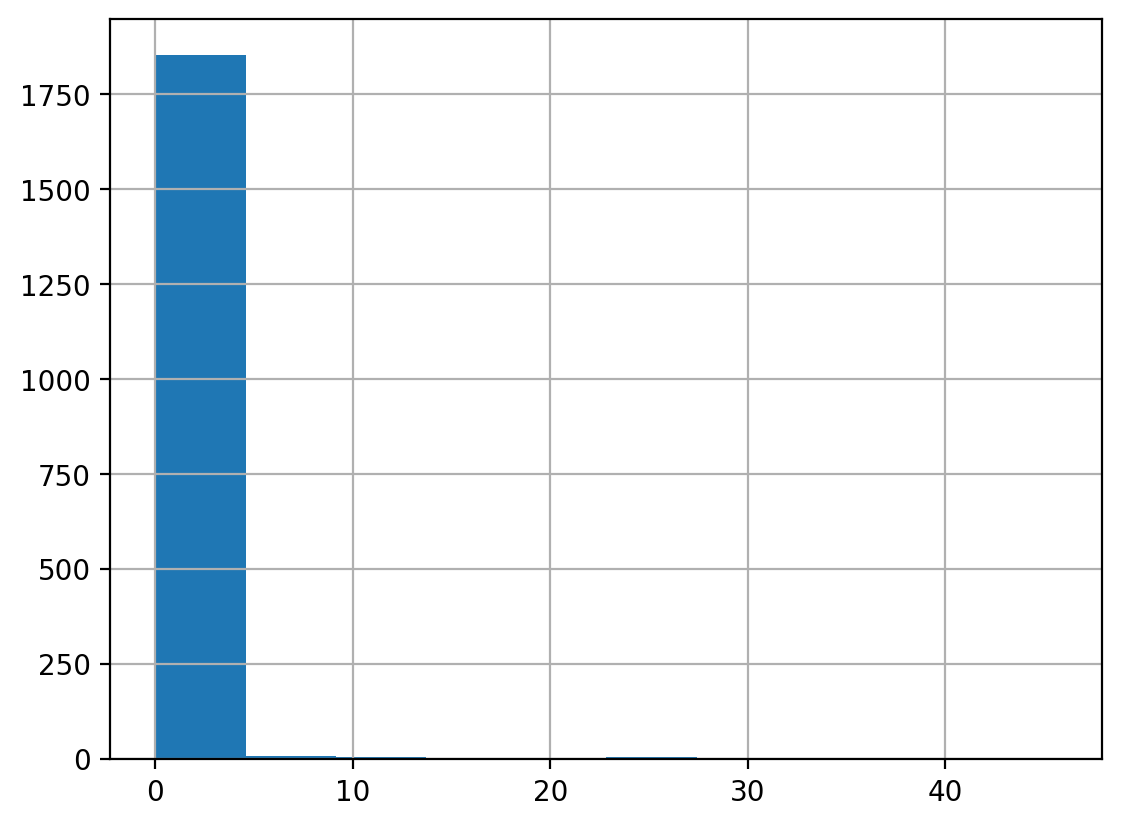

In [118]:
df['high.sensitivity.troponin'].hist()
plt.show()

Given the many values set to 0 and the anomalous bins, we simply use statistics and remove some values based on z-score

In [119]:
get_outliers(df, 'high.sensitivity.troponin', threshold=3)

high.sensitivity.troponin     zscore
inpatient.number                                      
797752                               31.719  16.140493
791740                                9.282   4.621822
789355                               45.675  23.305202
791103                                8.464   4.201879
802917                               13.659   6.868879
798002                               10.672   5.335418
845261                                7.053   3.477502
830368                               25.805  13.104374
821560                               26.718  13.573088
742126                               34.206  17.417266
794904                               26.940  13.687058

In [120]:
df.loc[df['high.sensitivity.troponin'] > 7, 'high.sensitivity.troponin'] = np.nan

In [121]:
get_outliers(df, 'prothrombin.time.ratio', threshold=6)

prothrombin.time.ratio     zscore
inpatient.number                                   
817905                             10.36  13.208011
852904                             13.66  18.044317
864040                              8.01   9.763974
836984                              7.08   8.401015
819538                              8.89  11.053656
855364                             14.89  19.846940
825046                              7.68   9.280344

In [122]:
df.loc[df['prothrombin.time.ratio'] > 7, 'prothrombin.time.ratio'] = np.nan

In [123]:
get_outliers(df, 'sodium', threshold=8)

Empty DataFrame
Columns: [sodium, zscore]
Index: []

`sodium` (mmol/L); ref: 137-147

In [124]:
get_outliers(df, 'potassium', threshold=8)

potassium     zscore
inpatient.number                      
867601                 11.1  10.369829

`potassium` (mmol/L); ref: 3.5-5.3

In [125]:
df.loc[df['potassium'] > 11, 'potassium'] = np.nan

In [126]:
get_outliers(df, 'calcium', threshold=8)

Empty DataFrame
Columns: [calcium, zscore]
Index: []

In [127]:
get_outliers(df, 'hydroxybutyrate.dehydrogenase.to.lactate.dehydrogenase', threshold=8)

Empty DataFrame
Columns: [hydroxybutyrate.dehydrogenase.to.lactate.dehydrogenase, zscore]
Index: []

In [128]:
get_outliers(df, 'hydroxybutyrate.dehydrogenase', threshold=8)

hydroxybutyrate.dehydrogenase     zscore
inpatient.number                                          
836026                                   1650.0  11.263153
829127                                   2192.0  15.506506
799605                                   1499.0  10.080964
819538                                   2657.0  19.147020
736630                                   1605.0  10.910845

`hydroxybutyrate.dehydrogenase` (U/L); ref: 90-180

In [129]:
df.loc[df['hydroxybutyrate.dehydrogenase'] > 1498, 'hydroxybutyrate.dehydrogenase'] = np.nan

In [130]:
get_outliers(df, 'glutamic.oxaloacetic.transaminase', threshold=8)

glutamic.oxaloacetic.transaminase     zscore
inpatient.number                                              
866587                                       1444.0   8.576221
799605                                       3437.0  20.846252
833216                                       1571.0   9.358105
819538                                       3454.0  20.950913
736630                                       1611.0   9.604367
732617                                       1626.0   9.696716

In [131]:
df.loc[df['glutamic.oxaloacetic.transaminase'] > 1400, 'glutamic.oxaloacetic.transaminase'] = np.nan

In [132]:
get_outliers(df, 'creatine.kinase', threshold=8)

creatine.kinase     zscore
inpatient.number                            
836026                     3105.0  12.065509
826826                     5920.0  23.485198
819538                     5876.0  23.306702

`creatine.kinase` (IU/L); ref: 22-270

An exponential increase in creatine kinase generally indicates that there has been a recent muscle or heart damage.

In [133]:
df.loc[df['creatine.kinase'] > 3000, 'creatine.kinase'] = np.nan

In [134]:
get_outliers(df, 'creatine.kinase.isoenzyme', threshold=8)

creatine.kinase.isoenzyme     zscore
inpatient.number                                      
848849                                151.5   8.711000
836026                                184.0  10.849953
829127                                217.1  13.028395
826826                                205.9  12.291279
819538                                187.7  11.093465
799957                                165.9   9.658721

In [135]:
df.loc[df['creatine.kinase.isoenzyme'] > 150, 'creatine.kinase.isoenzyme'] = np.nan

In [136]:
get_outliers(df, 'lactate.dehydrogenase', threshold=8)

lactate.dehydrogenase     zscore
inpatient.number                                  
829127                           2341.0  11.166681
799605                           2818.0  13.731266
833216                           1935.0   8.983828
819538                           4039.0  20.295957
789663                           2027.0   9.478464

In [137]:
df.loc[df['lactate.dehydrogenase'] > 1900, 'lactate.dehydrogenase'] = np.nan

In [138]:
get_outliers(df, 'alkaline.phosphatase', threshold=8)

alkaline.phosphatase     zscore
inpatient.number                                 
864040                          1085.0  22.060695

In [139]:
df.loc[df['alkaline.phosphatase'] > 1000, 'alkaline.phosphatase'] = np.nan

In [140]:
get_outliers(df, 'indirect.bilirubin', threshold=8)

indirect.bilirubin     zscore
inpatient.number                               
741054                          90.6   8.369338
839579                          87.9   8.075521
763848                         128.6  12.504541

`indirect.bilirubin` (umol/L); ref: 0-16

Indirect bilirubin is the difference between total and direct bilirubin.

In [141]:
df.loc[df['indirect.bilirubin'] > 90, 'indirect.bilirubin'] = np.nan

In [142]:
get_outliers(df, 'glutamic.pyruvic.transaminase', threshold=8)

glutamic.pyruvic.transaminase     zscore
inpatient.number                                          
866587                                   1384.0  10.443975
764381                                   1161.0   8.703548
862470                                   1116.0   8.352340
814415                                   1229.0   9.234261
799605                                   1977.0  15.072108
751016                                   1310.0   9.866434
762205                                   1196.0   8.976709
833841                                   1317.0   9.921067
819538                                   1860.0  14.158969
863901                                   1311.0   9.874239

In [143]:
df.loc[df['glutamic.pyruvic.transaminase'] > 1800, 'glutamic.pyruvic.transaminase'] = np.nan

In [144]:
get_outliers(df, 'globulin', threshold=8)

globulin    zscore
inpatient.number                    
816794                88.3  9.931972

`globulin` (g/L); ref: 20-40

In [145]:
df.loc[df['globulin'] > 88, 'globulin'] = np.nan

In [146]:
get_outliers(df, 'direct.bilirubin', threshold=8)

direct.bilirubin     zscore
inpatient.number                             
857297                       109.2  10.689051
739403                       179.8  18.214075

`direct.bilirubin` (umol/L); ref: 0-6.8

Bilirubin is a substance made when your body breaks down red blood cells. This is a normal process. Bilirubin is also part of bile, which your liver makes to help digest the food you eat.

In [147]:
df.loc[df['direct.bilirubin'] > 10, 'direct.bilirubin'] = np.nan

In [148]:
get_outliers(df, 'total.bilirubin', threshold=8)

total.bilirubin     zscore
inpatient.number                            
857297                      164.5   8.223853
739403                      256.6  13.561754
763848                      167.4   8.391930

`total.bilirubin` (umol/l); ref: 2-20.4

In [149]:
df.loc[df['total.bilirubin'] > 160, 'total.bilirubin'] = np.nan

In [150]:
get_outliers(df, 'total.bile.acid', threshold=8)

total.bile.acid     zscore
inpatient.number                            
814558                      122.6   8.461143
827204                      170.2  11.990381
851326                      134.1   9.313795
739403                      166.2  11.693807

`total.bile.acid` (umol/l); ref: 0-20

Bile Acids are synthesised in the liver and secreted into the bile. Their function is to facilitate the excretion of fat soluble waste products into the gut.

Bile acids are increased in patients with acute hepatitis, chronic hepatitis, liver sclerosis, liver cancer and obstetric cholestatis.

In [151]:
df.loc[df['total.bile.acid'] > 120, 'total.bile.acid'] = np.nan

In [152]:
get_outliers(df, 'triglyceride', threshold=8)

triglyceride     zscore
inpatient.number                         
821261                   14.24  11.986505
870127                   10.76   8.796438
838870                   22.46  19.521663
867601                   24.45  21.345868

In [153]:
df.loc[df['triglyceride'] > 10, 'triglyceride'] = np.nan

In [154]:
get_outliers(df, 'dischargeDay', threshold=8)

dischargeDay     zscore
inpatient.number                         
794077                     123  14.238064
757711                      76   8.343006
791880                      88   9.848127
794784                      82   9.095567
768711                     118  13.610930

In [155]:
cols_numerical, cols_categorical = get_num_cat(df)

#### More in-depth study for some numerical features
Control when for more than 90 percent of patients the variable takes nearly equal values

In [156]:
def check_histogram_bins(data, numerical_features,threshold=0.9):

    bin_counts = []
    selected_features = []

    for feature in numerical_features:
        feature_values = data[feature]
        counts, bins, _ = plt.hist(feature_values, bins=10)
        bin_counts.append(counts)

        # Check if a bin satisfies the threshold condition
        for j in range(len(counts)):
            if counts[j] >= threshold * data.shape[0]:
                selected_features.append(feature)
                print(f"Feature {feature}: Bin {j+1} - Count: {counts[j]}")

    plt.close()  # Close the figure to prevent unnecessary plots
    return selected_features

In [157]:
col_inspect = check_histogram_bins(df[cols_numerical], cols_numerical)

Feature visit.times: Bin 1 - Count: 1802.0
Feature eye.opening: Bin 10 - Count: 1921.0
Feature verbal.response: Bin 10 - Count: 1917.0
Feature movement: Bin 10 - Count: 1912.0
Feature eosinophil.count: Bin 1 - Count: 1872.0
Feature high.sensitivity.troponin: Bin 1 - Count: 1767.0
Feature glutamic.pyruvic.transaminase: Bin 1 - Count: 1782.0
Feature GCS: Bin 10 - Count: 1912.0


`visit.times`, `eye.opening`, `verbal.response`, `movement` and `GCS` are discerete numerical variable and it's therefore reasonable that a lot of patients are characterised by the same value.
Discard them from the suspicious columns.

In [158]:
col_inspect.remove('visit.times')
col_inspect.remove('eye.opening')
col_inspect.remove('verbal.response')
col_inspect.remove('movement')
col_inspect.remove('GCS')

Plot with more bins

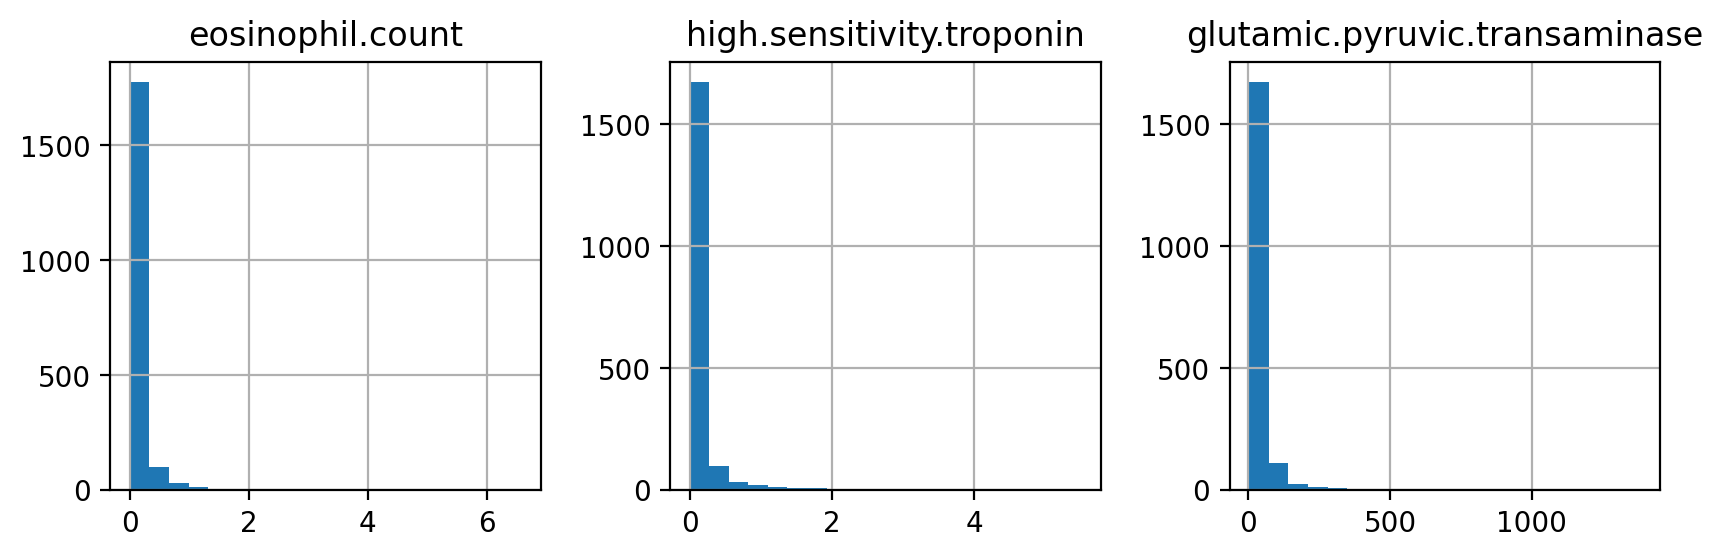

In [159]:
df[col_inspect].hist(layout=(3,3), figsize=(10,10), bins=20)
plt.show()

The problem with these variables is not trivial: it's likely that part of them was inserted in a different unit of measure, however they are marked in the top important variables in many models. We decide to just keep them as is, but this range it's really likely it will affect scaling.

#### Barplot of categorical variables

Plot the categorical variables, except the target.

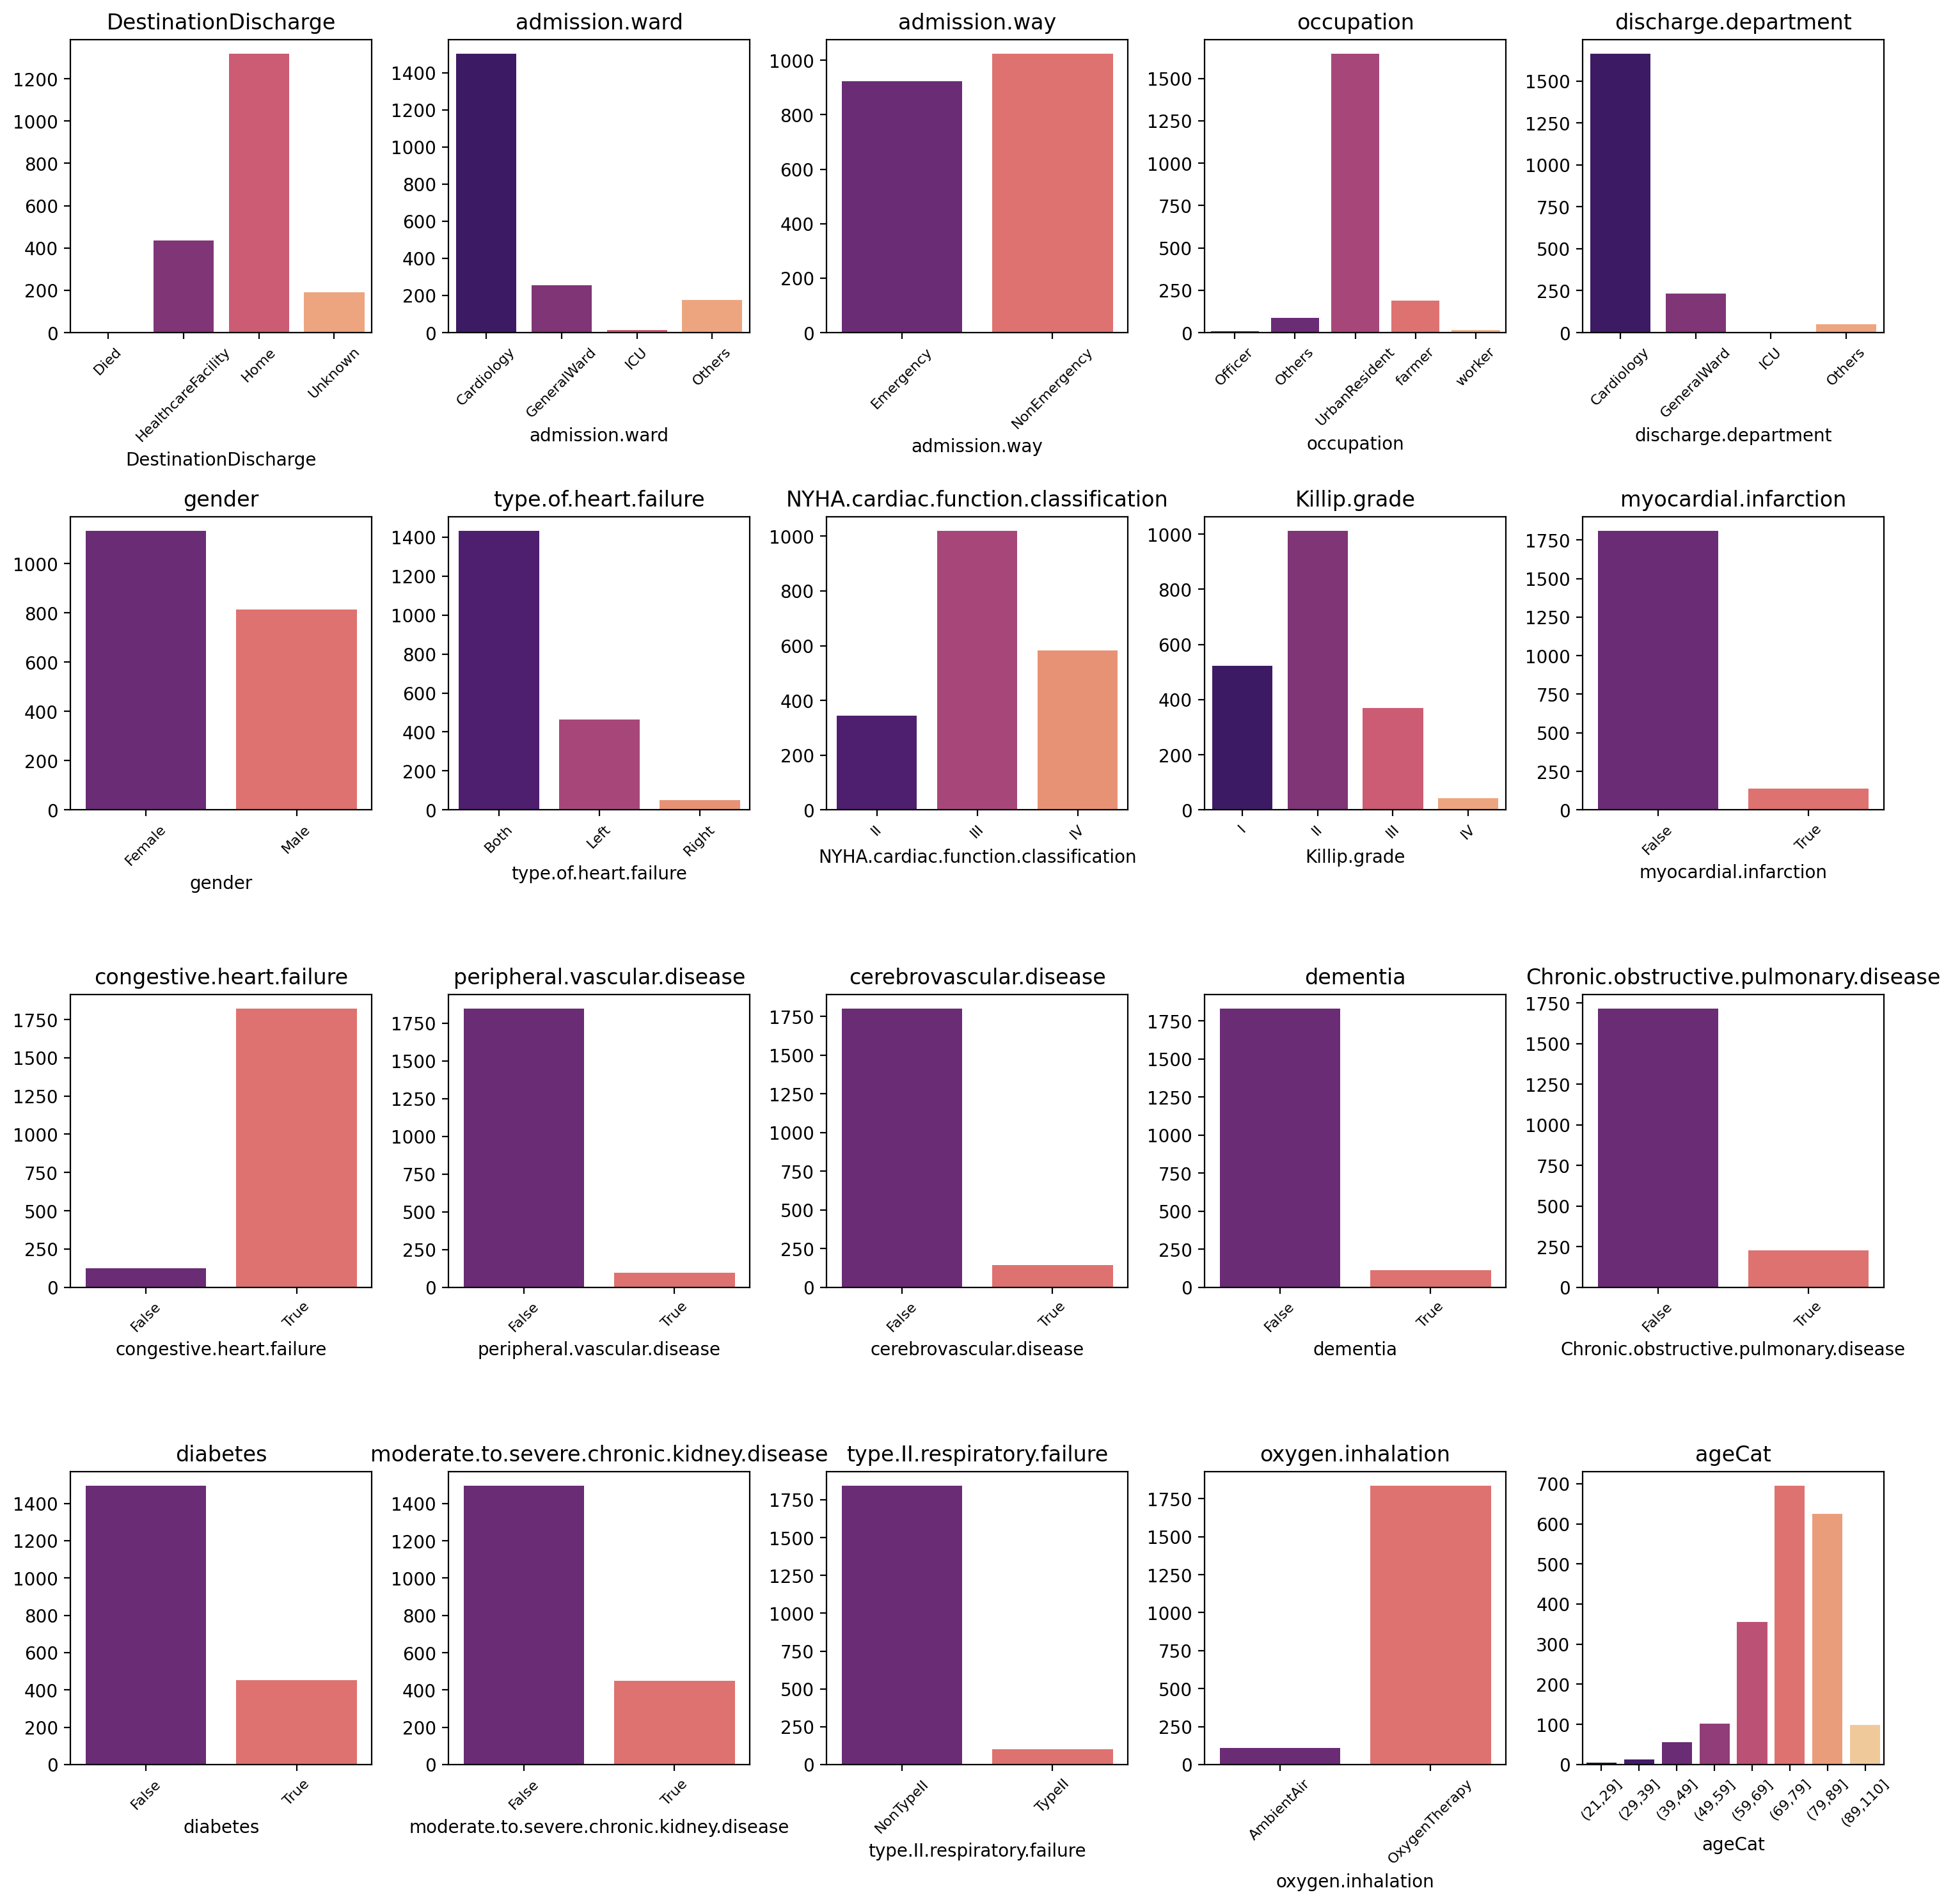

In [160]:
col_inspect = cols_categorical.values.tolist()
col_inspect.remove(target_var)
col_inspect = [c for c in col_inspect if c not in ['Drugs_IFHC', 'Drugs_Inhibitor', 'Drugs_Vasodilatory']]

# Adjust subplots and figsize
fig, axes = plt.subplots(4, 5,figsize=[15,15])
axes = axes.flatten()

for idx, col_name in enumerate(col_inspect):
    plt.sca(axes[idx]) # set the current Axes
    #plt.hist(df_categorical[x],density=True)
    sns.countplot(x=col_name, data=df, palette='magma')
    plt.xticks(fontsize=8, rotation=45) # Rotates X-Axis Ticks by 45-degrees
    plt.ylabel('')
    plt.title(col_name)

fig.tight_layout()
plt.savefig(str(OUTPUT_FOLDER / 'plot_categorical.pdf'), bbox_inches='tight')
plt.show()

Plot the target.

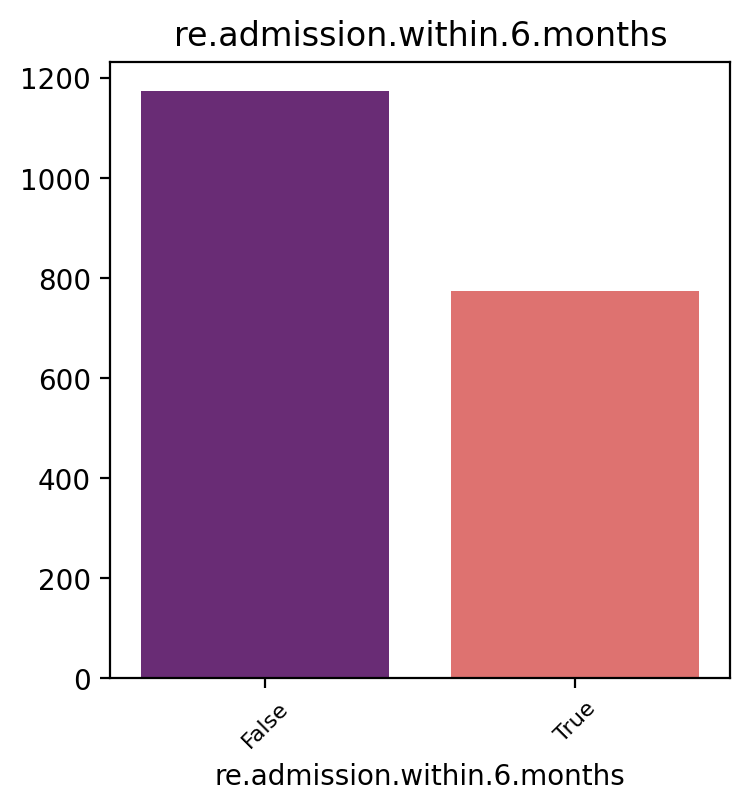

In [161]:
fig, axes = plt.subplots(figsize=[4,4])
sns.countplot(x=target_var, data=df, palette='magma')
plt.xticks(fontsize=8, rotation=45) # Rotates X-Axis Ticks by 45-degrees
plt.ylabel('')
plt.title(target_var)
plt.savefig(str(OUTPUT_FOLDER / 'plot_target.pdf'), bbox_inches='tight')
plt.show()

In [162]:
n_pos = df.loc[df['re.admission.within.6.months'] == 1].shape[0]
n_neg = df.loc[df['re.admission.within.6.months'] == 0].shape[0]
print(f'Number of patients that were readmitted within 6 months: {n_pos}, i.e. {n_pos/len(df.index):.2%}')
print(f'Number of patients that were not readmitted within 6 months: {n_neg}, i.e. {n_neg/len(df.index):.2%}')

Number of patients that were readmitted within 6 months: 773, i.e. 39.72%
Number of patients that were not readmitted within 6 months: 1173, i.e. 60.28%


In [163]:
age_counts = df.ageCat.value_counts()
age_5989 = age_counts['(59,69]'] + age_counts['(69,79]'] + age_counts['(79,89]']
print(f"Total and percentage in the age range 59-89: {age_5989} {age_5989/len(df.index):.2%}")

Total and percentage in the age range 59-89: 1675 86.07%


`ageCat` is actually a numerical variable divided into bins, but it's ordinal. So before moving forward, we encoded into a scale of numbers and make it `int64`.

In [164]:
df['ageCat'] = df['ageCat'].map({
    '(21,29]': 0,
    '(29,39]': 1,
    '(39,49]': 2,
    '(49,59]': 3,
    '(59,69]': 4,
    '(69,79]': 5,
    '(79,89]': 6,
    '(89,110]': 7
})
df = df.astype({'ageCat': 'int64'})

In [165]:
gender_counts = df.gender.value_counts()
gender_Female = gender_counts['Female']
print(f"{gender_Female/len(df.index):.2%} of females")
print(f"{1-(gender_Female)/len(df.index):.2%} of males")

58.22% of females
41.78% of males


In [166]:
hf_type_counts = df['type.of.heart.failure'].value_counts()
hf_type_right = hf_type_counts['Right']
hf_type_left = hf_type_counts['Left']
hf_type_both = hf_type_counts['Both']
print(f"{hf_type_right/len(df.index):.2%} with type Right")
print(f"{hf_type_left/len(df.index):.2%} with type Left")
print(f"{hf_type_both/len(df.index):.2%} with type Both")

2.62% with type Right
23.84% with type Left
73.54% with type Both


In [167]:
diabetes_counts = df.diabetes.value_counts()
diabetes_true = diabetes_counts[True]
print(f"{diabetes_true/len(df.index):.2%} with diabetes")

23.18% with diabetes


### Correlation analysis

Using clinical knowledge, we inspect some groups of variables we think could be quite correlated.

In [168]:
corr_matrix = df.corr(numeric_only=True)

In [169]:
def plot_subcorrelation_matrix(corr_matrix, inspect_col, threshold=0.4):

    if not inspect_col or len(inspect_col) == 1:
        return

    if len(inspect_col) == 2:
        correlation_value = corr_matrix.values[0,1]
        if correlation_value >= threshold:
            print(f'Correlation: {correlation_value:.2f}')
        else:
            print('Correlation is below threshold')
    else:
        sub_corr_matrix = corr_matrix[inspect_col].loc[inspect_col]
        # Data will not be shown in cells where `mask` is `True`
        mask = np.triu(np.ones_like(sub_corr_matrix, dtype=bool), k=0) | (np.abs(sub_corr_matrix) <= threshold)

        # Plot the correlation matrix using seaborn
        fig, ax = plt.subplots(figsize=(5, 5))
        sns.heatmap(sub_corr_matrix,
                    annot=True, fmt='.2f',
                    mask=mask,
                    cmap='RdBu_r', vmin=-1, vmax=1, cbar=True,
                    linewidths=.5,
                    ax=ax)
        ax.set_aspect("equal")
        plt.title("Correlation matrix")
        plt.show()

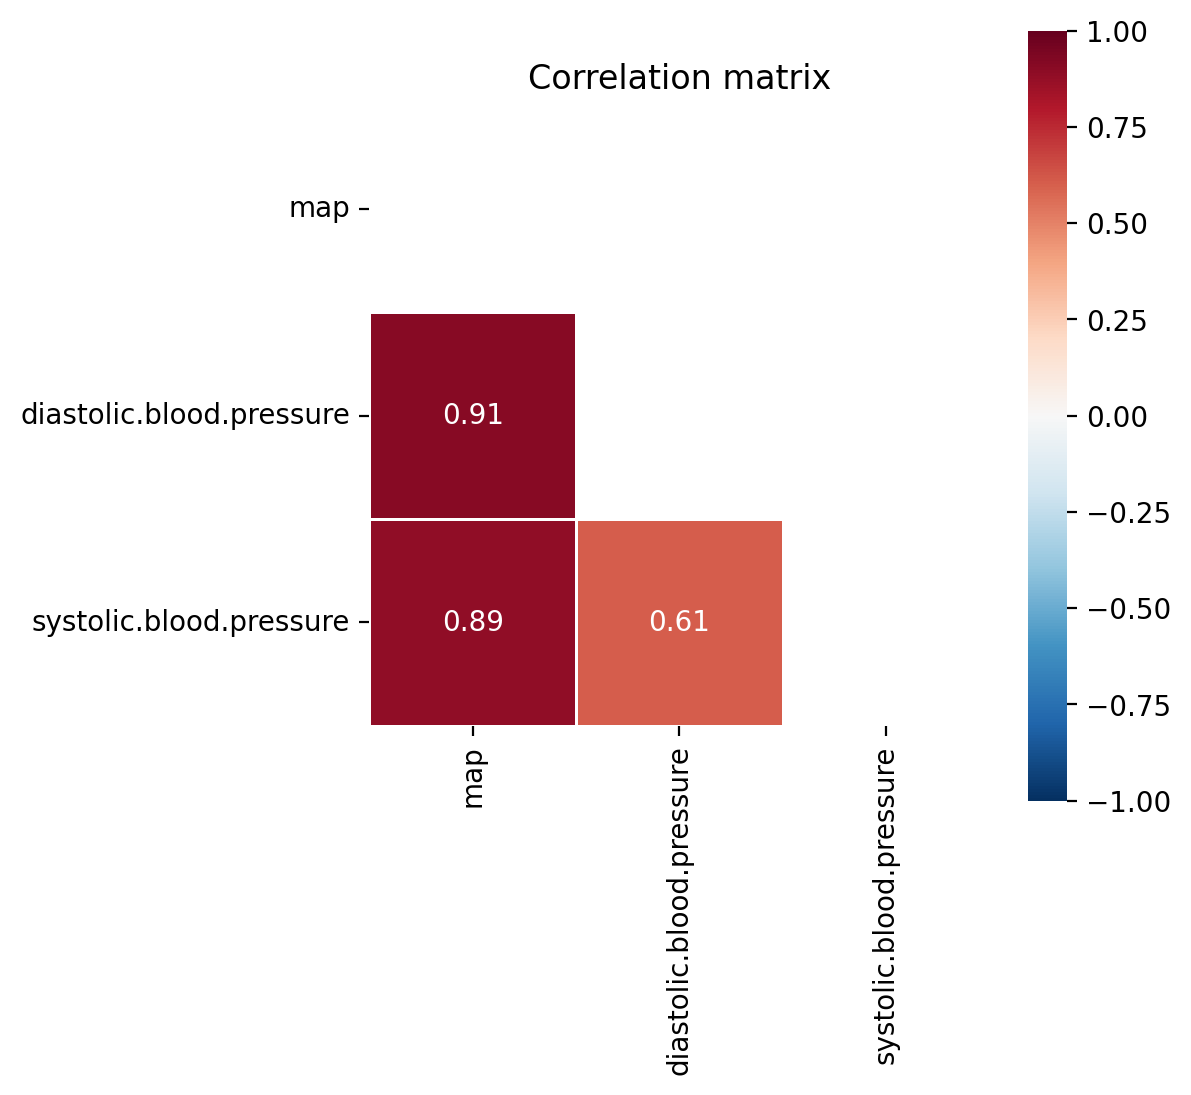

In [170]:
inspect_col = ['map', 'diastolic.blood.pressure', 'systolic.blood.pressure']
plot_subcorrelation_matrix(corr_matrix=corr_matrix, inspect_col=inspect_col, threshold=0.4)

In [171]:
inspect_col = ['sodium', 'chloride']
plot_subcorrelation_matrix(corr_matrix=corr_matrix, inspect_col=inspect_col, threshold=0.4)

Correlation is below threshold


In [172]:
inspect_col = ['cholesterol', 'low.density.lipoprotein.cholesterol']
plot_subcorrelation_matrix(corr_matrix=corr_matrix, inspect_col=inspect_col, threshold=0.4)

Correlation is below threshold


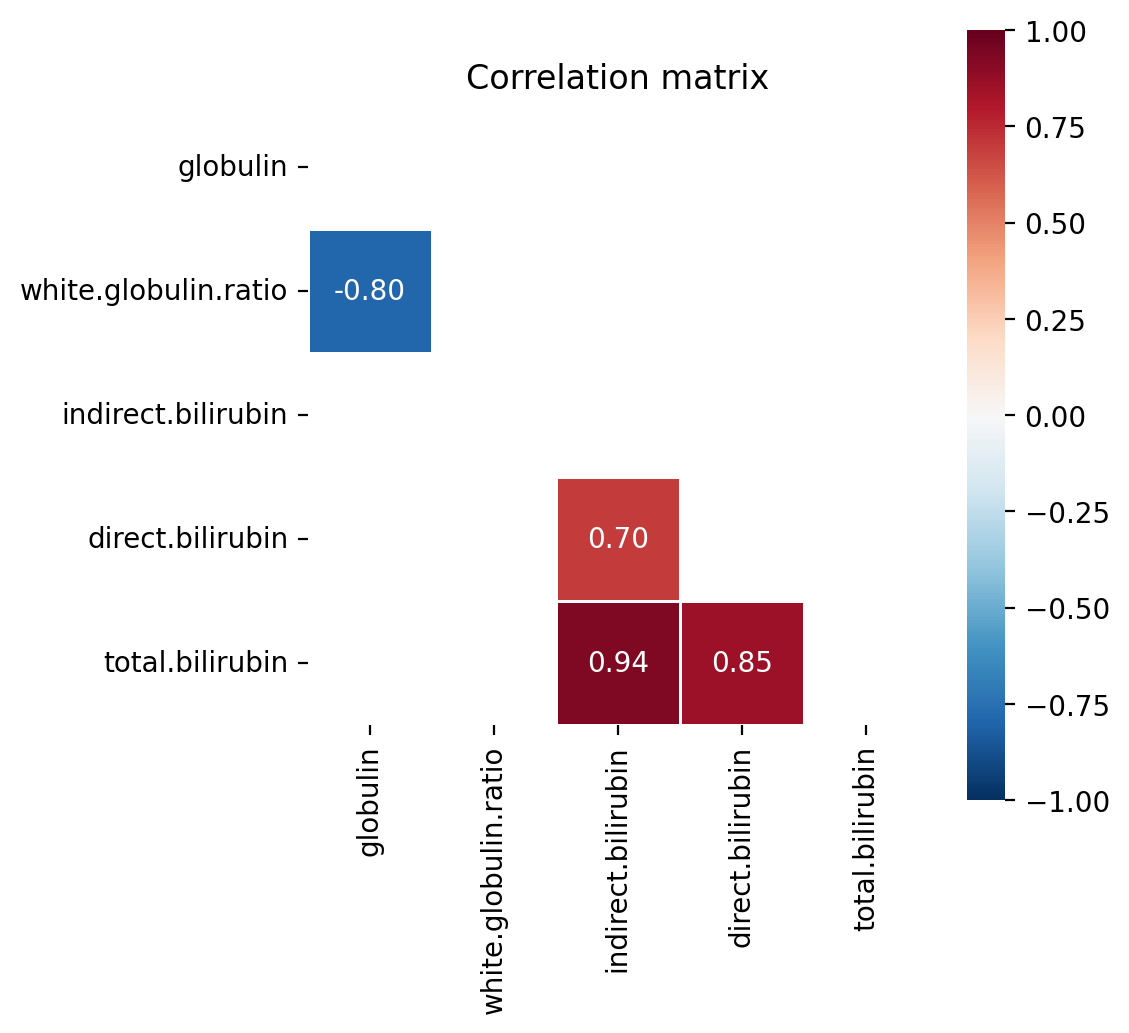

In [173]:
inspect_col = ['globulin', 'white.globulin.ratio', 'indirect.bilirubin', 'direct.bilirubin', 'total.bilirubin']
plot_subcorrelation_matrix(corr_matrix=corr_matrix, inspect_col=inspect_col, threshold=0.4)

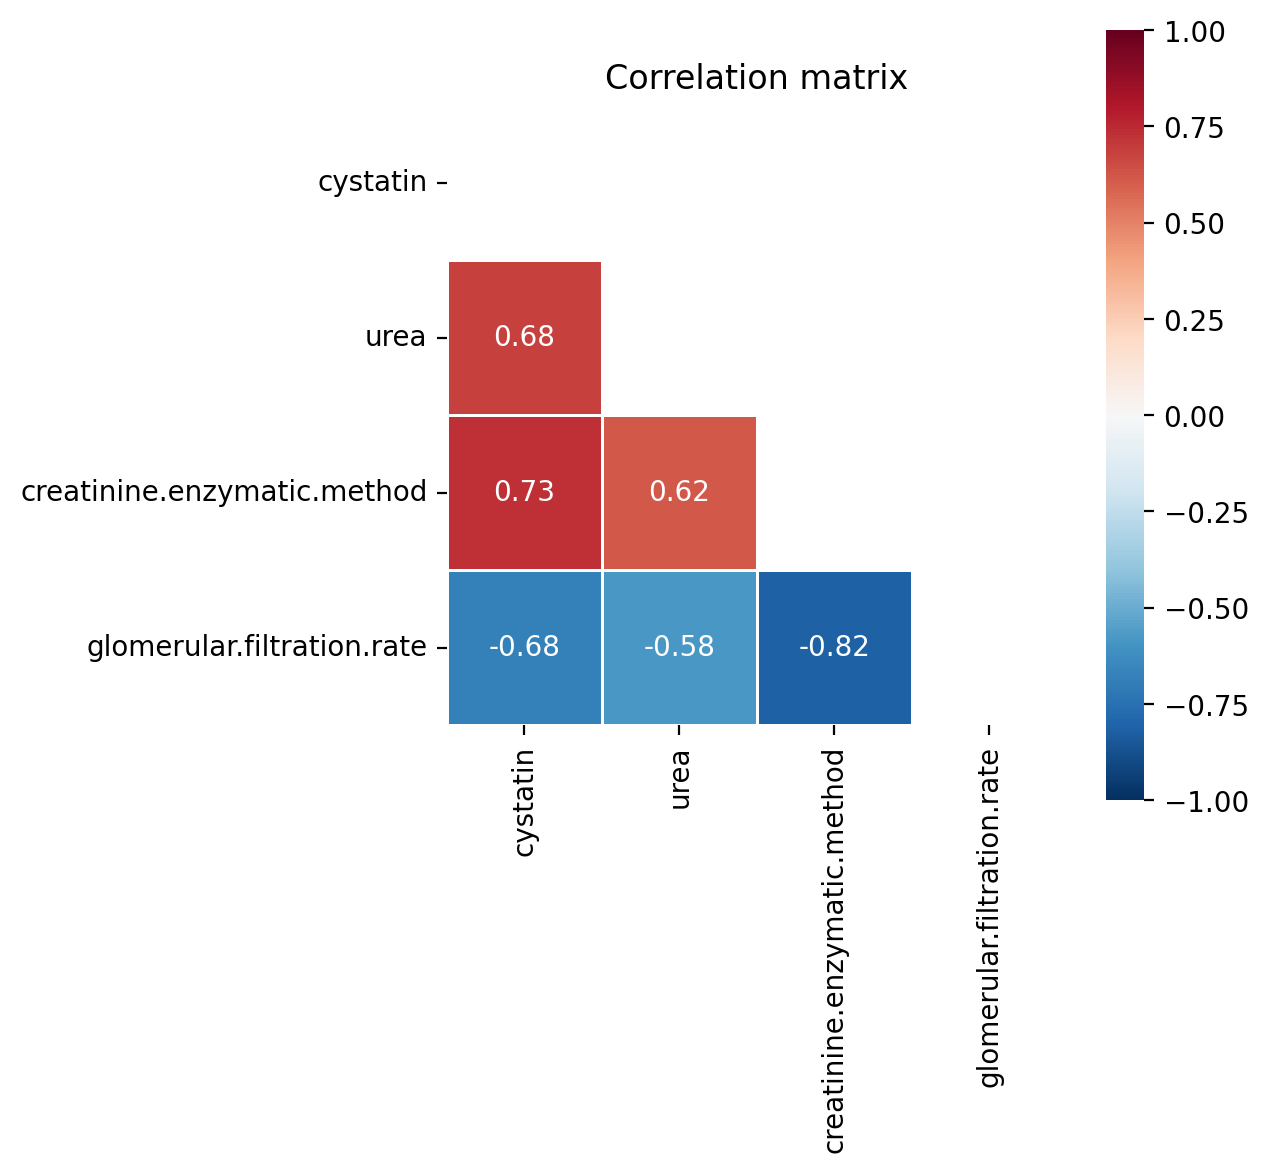

In [174]:
inspect_col = ['cystatin', 'urea', 'creatinine.enzymatic.method', 'glomerular.filtration.rate']
plot_subcorrelation_matrix(corr_matrix=corr_matrix, inspect_col=inspect_col, threshold=0.4)

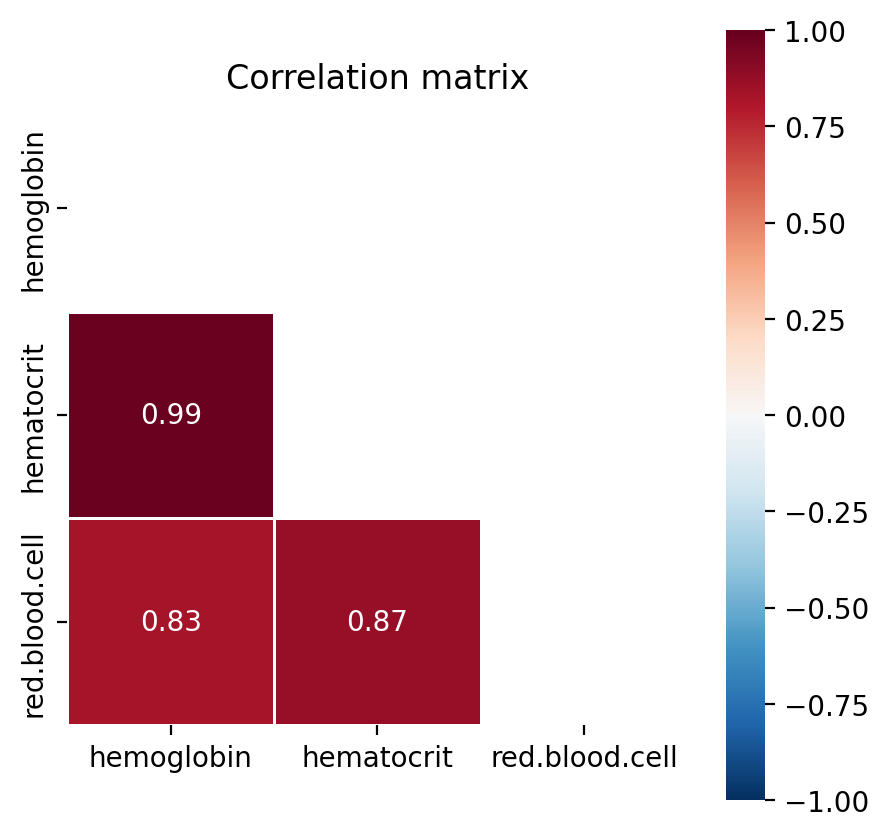

In [175]:
inspect_col = ['hemoglobin', 'hematocrit', 'red.blood.cell']
plot_subcorrelation_matrix(corr_matrix=corr_matrix, inspect_col=inspect_col, threshold=0.4)

In [176]:
inspect_col = ['basophil.count', 'basophil.ratio']
plot_subcorrelation_matrix(corr_matrix=corr_matrix, inspect_col=inspect_col, threshold=0.4)

Correlation is below threshold


In [177]:
inspect_col = ['eosinophil.count', 'eosinophil.ratio']
plot_subcorrelation_matrix(corr_matrix=corr_matrix, inspect_col=inspect_col, threshold=0.4)

Correlation is below threshold


In [178]:
inspect_col = ['white.blood.cell', 'neutrophil.count']
plot_subcorrelation_matrix(corr_matrix=corr_matrix, inspect_col=inspect_col, threshold=0.4)

Correlation is below threshold


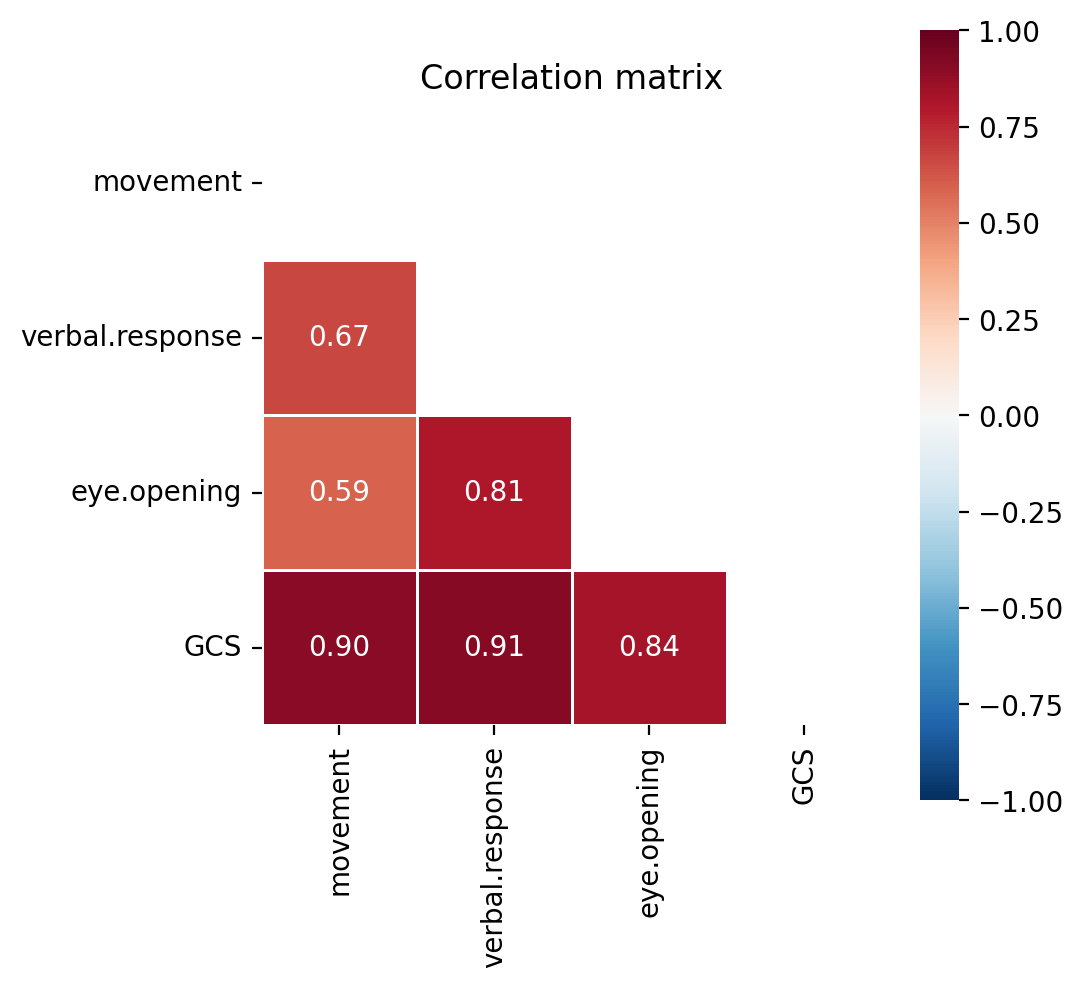

In [179]:
inspect_col = ['movement', 'verbal.response', 'eye.opening', 'GCS']
plot_subcorrelation_matrix(corr_matrix=corr_matrix, inspect_col=inspect_col, threshold=0.4)

We are safe enough to do the following: write a function to discard variables correlated with others by more than a threshold we fix to 0.85.

In [180]:
def remove_highly_correlated(df, threshold=0.5):
    """
    Given a dataframe, removes variables that are highly correlated with the others
    Returns a dataframe with the highly correlated variables removed
    threshold is the correlation threshold to use
    Code from https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/
    """

    # Create correlation matrix
    corr_matrix = df.corr(numeric_only=True).abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Find index of feature columns with correlation greater than threshold
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    
    # Print dropped columns
    print(f"Dropping {len(to_drop)} columns:")
    print(to_drop)

    # Return with dropped features
    return df.drop(to_drop, axis=1)

In [181]:
df = remove_highly_correlated(df, threshold=0.85)

Dropping 12 columns:
['map', 'hematocrit', 'mean.hemoglobin.volume', 'eosinophil.count', 'hemoglobin', 'platelet.hematocrit', 'neutrophil.count', 'prothrombin.time.ratio', 'lactate.dehydrogenase', 'total.bilirubin', 'low.density.lipoprotein.cholesterol', 'GCS']


Final shape of the dataset

In [182]:
df.shape

(1946, 107)

### Modeling

In [183]:
df = df.astype({
    'DestinationDischarge': 'category',
    'admission.ward': 'category',
    'admission.way': 'category',
    'occupation': 'category',
    'discharge.department': 'category',
    'type.of.heart.failure': 'category',
    'NYHA.cardiac.function.classification': 'category',
    'Killip.grade': 'category',
    'type.II.respiratory.failure': 'category',
    'oxygen.inhalation': 'category',
    'gender': 'category'
})

In [184]:
cols_numerical, cols_categorical = get_num_cat(df)

Make sure the values of categorical don't contain strange characters.

In [186]:
df[cols_categorical] = df[cols_categorical].applymap(lambda x: re.sub(r'[\[\]<\(\)]', '', str(x)) if isinstance(x, str) else x)
df[cols_categorical] = df[cols_categorical].applymap(lambda x: re.sub(r',', '_', str(x)) if isinstance(x, str) else x)

### Splitting data into training and testing sets

Separate the target variable from the features.

In [187]:
X = df.drop([target_var], axis=1)
y = df[target_var]

Split the dataset into training and testing sets.

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.15,
                                                    stratify=y, # preserve target propotions
                                                    random_state=SEED)

### Preprocessing categorical data

In [189]:
cols_categorical = cols_categorical.tolist()
cols_categorical.remove(target_var)

Perform one-hot encoding.

In [190]:
# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='if_binary')

# Fit the encoder on the training data
encoder.fit(X_train[cols_categorical])

# Transform the categorical columns in both train and test data
train_encoded = pd.DataFrame(encoder.transform(X_train[cols_categorical]), columns=encoder.get_feature_names_out(cols_categorical))
test_encoded = pd.DataFrame(encoder.transform(X_test[cols_categorical]), columns=encoder.get_feature_names_out(cols_categorical))

# Concatenate the encoded features with the original numerical columns
X_train = pd.concat([X_train.drop(cols_categorical, axis=1).reset_index(drop=True), train_encoded.reset_index(drop=True)], axis=1)
X_test = pd.concat([X_test.drop(cols_categorical, axis=1).reset_index(drop=True), test_encoded.reset_index(drop=True)], axis=1)

### Preprocessing numerical data

#### Imputation

In [191]:
#imputer = IterativeImputer(max_iter=10, random_state=0, verbose=2) # Doesn't improve much but takes 10 min to run
imputer = KNNImputer(n_neighbors=5)

X_train = pd.DataFrame(imputer.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns = X_test.columns)

#### Feature engineering

Try adding the first PCs to the dataset and see whether they are selected by our method.

In [192]:
pca = PCA(n_components=5) # Specify the number of PCs
pca.fit(X_train[cols_numerical])

train_pca = pd.DataFrame(data=pca.transform(X_train[cols_numerical]), columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
test_pca = pd.DataFrame(data=pca.transform(X_test[cols_numerical]), columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

X_train = pd.concat([X_train, train_pca], axis=1)
X_test = pd.concat([X_test, test_pca], axis=1)

Let's add the log-transformation of `glutamic.pyruvic.transaminase`

In [193]:
X_train['glutamic.pyruvic.transaminase_log'] = X_train['glutamic.pyruvic.transaminase'].apply(lambda x: np.log(x+0.001))
X_test['glutamic.pyruvic.transaminase_log'] = X_test['glutamic.pyruvic.transaminase'].apply(lambda x: np.log(x+0.001))

In [194]:
cols_numerical, cols_categorical = get_num_cat(df)

In [195]:
X_train_unscaled = X_train.copy()
X_test_unscaled = X_test.copy()

#### Scaling

In [196]:
scaler = StandardScaler()

X_train[cols_numerical] = scaler.fit_transform(X_train[cols_numerical])
X_test[cols_numerical] = scaler.transform(X_test[cols_numerical])

### Imbalance

Compute class weights as inversely proportional to the prevalence in the training set.

In [197]:
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)
class_weights = dict(zip(np.unique(y_train), class_weights))
class_weights

{False: 0.8294884653961886, True: 1.2587519025875191}

### Feature selection

Ideally we want to perform some kind of backward selection. However, since the initial number of features is 131, the process is very computationally intensive (after a quick pilot run, about 20 seconds per feature to be removed). So to speed up the process we develop the following method to discard some features, trying to retain as much information as possible. We employ a `LogisticRegression` and a `RandomForestClassifier`, which are both suited for feature selection. Trying to take advantage of both worlds, we perform the following steps:

- Train a `LogisticRegression` with strong $L^1$ penalty to select a set $S_\text{lr}$ of features.
- Train a `RandomForestClassifier` and create an $S_\text{rf}$ set of features made by the top 30 features by impurity decrease importance.
- Create a set $S_\text{reduced} = S_\text{lr} \cup S_\text{rf}$

We can now perform a backward selection based on this $S_\text{reduced}$ set of features, and inspecting the evolution of our performance index (the AUC) we select a suitable number of features $S^\star_1$, similarly to an elbow rule. Then, since the results are often different, we perform a forward selection from 0 to 10 features on the same model to get the set $S^\star_2$, and finally we take the union of the two as our final features set $S^\star = S^\star_1 \cup S^\star_2$.

This will be later fed to a model selection part where can try many models, since the feature set is now very small.

In [198]:
print(f'Initial number of features: {X_train.shape[1]}')

Initial number of features: 131


#### Selection with LogisticRegression

In [199]:
logistic_selector = SelectFromModel(
    LogisticRegression(
        C=0.05,
        penalty='l1',
        solver='liblinear',
        max_iter=1000,
        random_state=SEED,
        class_weight=class_weights
    )
)

logistic_selector.fit(X_train, y_train)
selected_feature_indices_lr = logistic_selector.get_support(indices=True)
selected_feature_names_lr = [X_train.columns[index] for index in selected_feature_indices_lr]

print(f'Selected {len(selected_feature_names_lr)} features:')
selected_feature_names_lr

Selected 46 features:


['body.temperature',
 'pulse',
 'systolic.blood.pressure',
 'CCI.score',
 'fio2',
 'creatinine.enzymatic.method',
 'monocyte.count',
 'red.blood.cell',
 'standard.deviation.of.red.blood.cell.distribution.width',
 'mean.platelet.volume',
 'basophil.ratio',
 'basophil.count',
 'eosinophil.ratio',
 'neutrophil.ratio',
 'D.dimer',
 'international.normalized.ratio',
 'prothrombin.activity',
 'high.sensitivity.troponin',
 'calcium',
 'sodium',
 'hydroxybutyrate.dehydrogenase.to.lactate.dehydrogenase',
 'nucleotidase',
 'albumin',
 'white.globulin.ratio',
 'cholesterol',
 'triglyceride',
 'high.density.lipoprotein.cholesterol',
 'standard.bicarbonate',
 'partial.pressure.of.carbon.dioxide',
 'glucose.blood.gas',
 'lactate',
 'anion.gap',
 'dischargeDay',
 'ageCat',
 'occupation_farmer',
 'type.of.heart.failure_Both',
 'type.of.heart.failure_Left',
 'NYHA.cardiac.function.classification_II',
 'NYHA.cardiac.function.classification_IV',
 'Drugs_IFHC_True',
 'PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',

Among the drugs, `Drugs_IFHC_True` has been selected.

#### Selection with RandomForestClassifier

In [200]:
rf_selector = SelectFromModel(
    RandomForestClassifier(
        criterion='entropy',
        max_depth=10,
        n_estimators=250,
        random_state=SEED,
        class_weight=class_weights
    ),
    max_features=50
)

rf_selector.fit(X_train, y_train)
selected_feature_indices_rf = rf_selector.get_support(indices=True)
selected_feature_names_rf = [X_train.columns[index] for index in selected_feature_indices_rf]

print(f'Selected {len(selected_feature_names_rf)} features:')
selected_feature_names_rf

Selected 50 features:


['pulse',
 'BMI',
 'left.ventricular.end.diastolic.diameter.LV',
 'mitral.valve.EMS',
 'creatinine.enzymatic.method',
 'urea',
 'uric.acid',
 'glomerular.filtration.rate',
 'cystatin',
 'white.blood.cell',
 'monocyte.count',
 'red.blood.cell',
 'coefficient.of.variation.of.red.blood.cell.distribution.width',
 'standard.deviation.of.red.blood.cell.distribution.width',
 'mean.corpuscular.volume',
 'lymphocyte.count',
 'platelet',
 'neutrophil.ratio',
 'D.dimer',
 'activated.partial.thromboplastin.time',
 'prothrombin.activity',
 'fibrinogen',
 'high.sensitivity.troponin',
 'carbon.dioxide.binding.capacity',
 'calcium',
 'potassium',
 'chloride',
 'sodium',
 'hydroxybutyrate.dehydrogenase.to.lactate.dehydrogenase',
 'hydroxybutyrate.dehydrogenase',
 'high.sensitivity.protein',
 'fucosidase',
 'albumin',
 'glutamyltranspeptidase',
 'indirect.bilirubin',
 'alkaline.phosphatase',
 'globulin',
 'direct.bilirubin',
 'total.bile.acid',
 'total.protein',
 'cholesterol',
 'triglyceride',
 'high.d

No drug has been selected.

Inspect the 10 most important features selected by the Random Forest.

In [201]:
df_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_selector.estimator_.feature_importances_
})

df_importance = df_importance.sort_values(by=['importance'], ascending=False).iloc[:10]
df_importance

feature  importance
15                            mitral.valve.EMS    0.021252
19                  glomerular.filtration.rate    0.020578
17                                        urea    0.017026
37                                     D.dimer    0.016478
16                 creatinine.enzymatic.method    0.015830
39       activated.partial.thromboplastin.time    0.015719
48                                      sodium    0.015296
36                            neutrophil.ratio    0.015188
14  left.ventricular.end.diastolic.diameter.LV    0.015133
43                   high.sensitivity.troponin    0.014816

In [202]:
df_importance.head(10).to_latex(
    str(OUTPUT_FOLDER / 'importance_top10_rf.tex'),
    index=False,
    formatters={"name": str.upper},
    float_format="{:.4f}".format,
    caption="Top 10 feature importance in RF selection.",
    label='tab:importance-rf'
)

/var/folders/1n/5l6269bd647d957r5df7_hj80000gn/T/ipykernel_22084/3201238467.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_importance.head(10).to_latex(


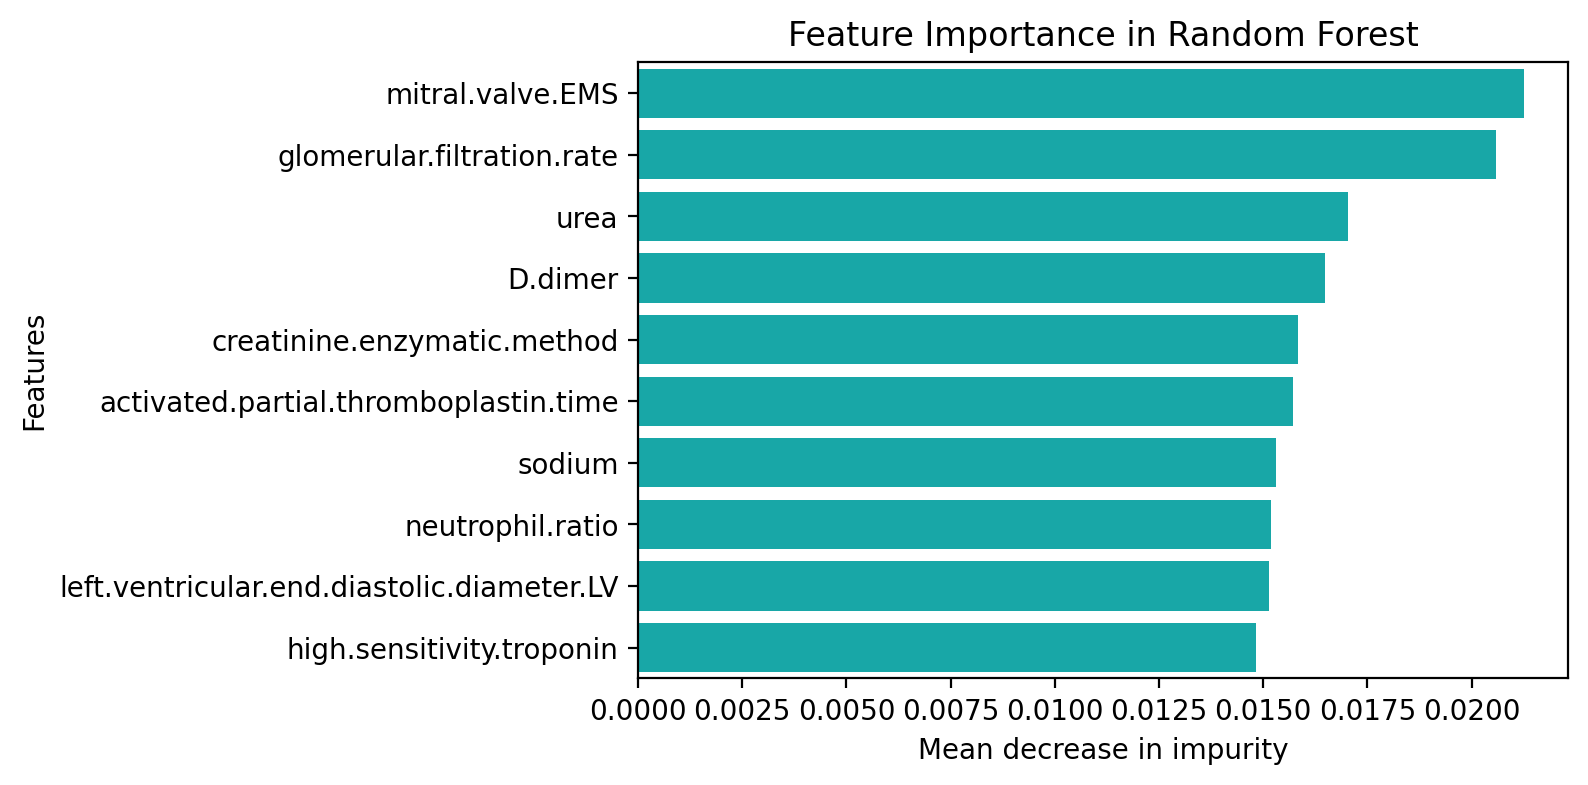

In [203]:
fig, ax = plt.subplots(figsize=(6,4))

sns.barplot(x='importance', y='feature', data=df_importance, color='c')
plt.xlabel('Mean decrease in impurity')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest')
plt.savefig(str(OUTPUT_FOLDER / 'feature_importance_RandomForestClassifier.pdf'), bbox_inches='tight')
plt.show()

Let's see the intersections.

In [204]:
set(selected_feature_names_rf) & set(selected_feature_names_lr)

{'D.dimer',
 'PC2',
 'PC3',
 'PC4',
 'albumin',
 'calcium',
 'cholesterol',
 'creatinine.enzymatic.method',
 'dischargeDay',
 'glucose.blood.gas',
 'high.density.lipoprotein.cholesterol',
 'high.sensitivity.troponin',
 'hydroxybutyrate.dehydrogenase.to.lactate.dehydrogenase',
 'monocyte.count',
 'neutrophil.ratio',
 'partial.pressure.of.carbon.dioxide',
 'prothrombin.activity',
 'pulse',
 'red.blood.cell',
 'sodium',
 'standard.bicarbonate',
 'standard.deviation.of.red.blood.cell.distribution.width',
 'triglyceride'}

#### Adding extra variables

We see that neither of the methods selected the presence of diabetes, while we think it could be meaninfgul. So we take the union and add `diabetes_True`.

In [205]:
selected_features = list(set(selected_feature_names_rf+selected_feature_names_lr))
if not 'diabetes_True' in selected_features:
    selected_features.append('diabetes_True')

selected_features

['mean.corpuscular.volume',
 'dischargeDay',
 'anion.gap',
 'potassium',
 'direct.bilirubin',
 'type.of.heart.failure_Both',
 'body.temperature',
 'hydroxybutyrate.dehydrogenase',
 'fibrinogen',
 'lactate',
 'triglyceride',
 'PC2',
 'high.sensitivity.troponin',
 'cholesterol',
 'alkaline.phosphatase',
 'mitral.valve.EMS',
 'PC4',
 'basophil.count',
 'calcium',
 'fio2',
 'left.ventricular.end.diastolic.diameter.LV',
 'prothrombin.activity',
 'coefficient.of.variation.of.red.blood.cell.distribution.width',
 'chloride',
 'total.protein',
 'Drugs_IFHC_True',
 'urea',
 'platelet',
 'NYHA.cardiac.function.classification_IV',
 'nucleotidase',
 'PC3',
 'red.blood.cell',
 'glutamyltranspeptidase',
 'systolic.blood.pressure',
 'standard.bicarbonate',
 'activated.partial.thromboplastin.time',
 'lymphocyte.count',
 'standard.deviation.of.red.blood.cell.distribution.width',
 'high.density.lipoprotein.cholesterol',
 'occupation_farmer',
 'carbon.dioxide.binding.capacity',
 'glutamic.pyruvic.transami

In [206]:
len(selected_features)

74

#### Backward selection

Let's perform backward selection on another `LogisticRegression`

In [259]:
classifier = LogisticRegression(C=0.1, max_iter=10000, random_state=SEED, class_weight=class_weights)

In [262]:
# sfs_backward = SequentialFeatureSelector(
#     classifier,
#     k_features=1,
#     forward=False,
#     floating=False,
#     scoring='roc_auc',
#     verbose=0,
#     cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED),
#     n_jobs=-1).fit(X_train[selected_features], y_train)

In [263]:
# with open(str(OUTPUT_FOLDER / 'sfs_backward.pkl'), 'wb') as handle:
#     pickle.dump(sfs_backward, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [264]:
with open(str(OUTPUT_FOLDER / 'sfs_backward.pkl'), 'rb') as handle:
    sfs_backward = pickle.load(handle)

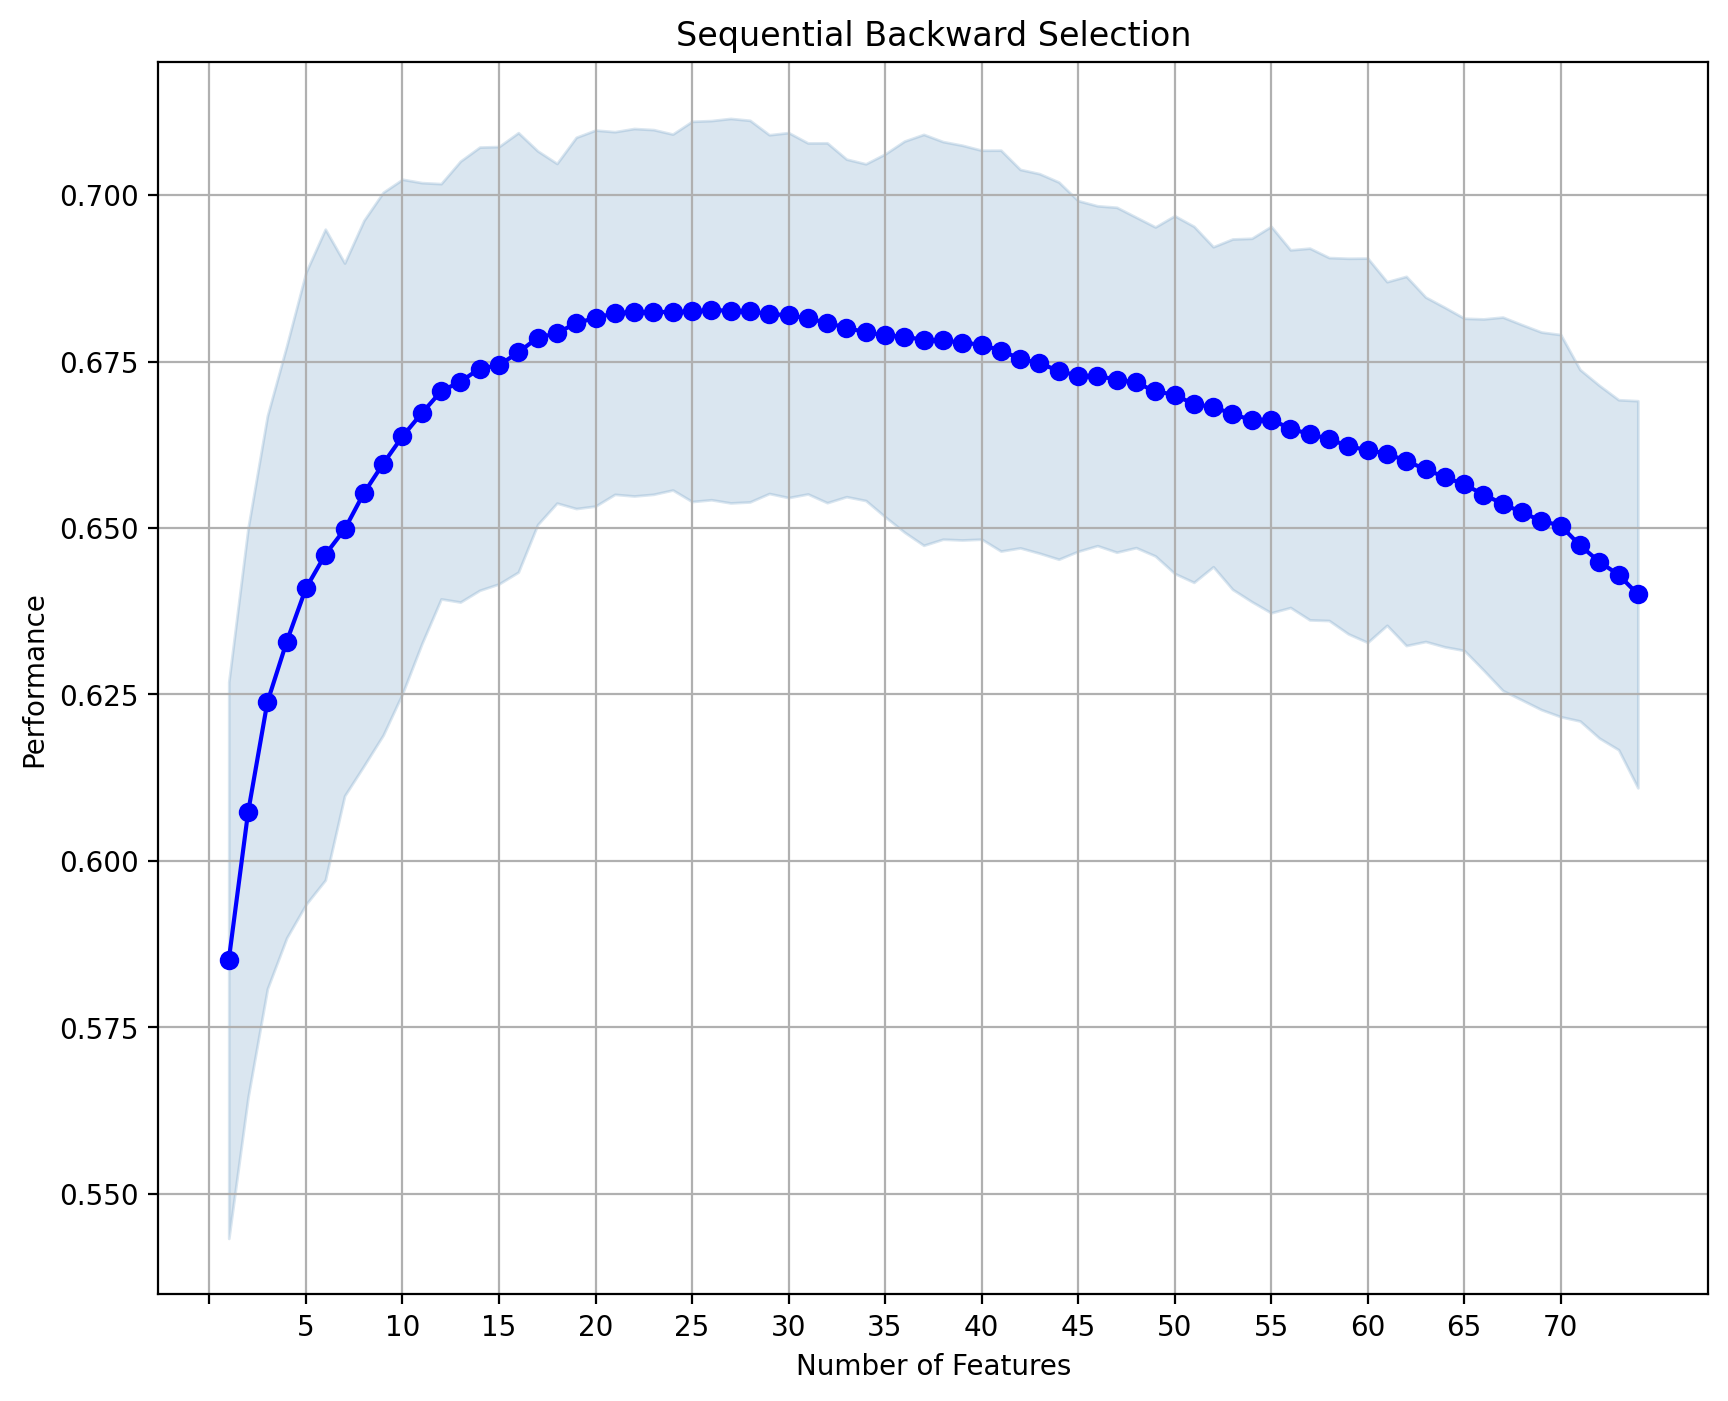

In [265]:
plot_sfs(sfs_backward.get_metric_dict(), kind='std_dev',figsize=(10, 8))

plt.title('Sequential Backward Selection')
plt.xticks(np.arange(0, 75, 5))
plt.grid()
plt.savefig(str(OUTPUT_FOLDER / 'feature_selection_backward_logistic.pdf'), bbox_inches='tight')
plt.show()

In [266]:
feature_idxs = [list(sfs_backward.subsets_[step]['feature_idx']) for step in sfs_backward.subsets_.keys()]
feature_idxs.append([]) # append empty set
added = []
for idx in range(len(feature_idxs)-1):
    added.append(np.setdiff1d(feature_idxs[idx], feature_idxs[idx+1])[0])
added = np.flip(added)

Here are the features ordered by the one that was always kept to the one that was first removed (a sort of feature importance).

In [267]:
removed_features = [selected_features[i] for i in added]
removed_features

['creatinine.enzymatic.method',
 'D.dimer',
 'type.of.heart.failure_Both',
 'occupation_farmer',
 'NYHA.cardiac.function.classification_IV',
 'diabetes_True',
 'partial.pressure.of.carbon.dioxide',
 'glutamic.pyruvic.transaminase_log',
 'sodium',
 'eosinophil.ratio',
 'Drugs_IFHC_True',
 'lactate',
 'anion.gap',
 'albumin',
 'platelet',
 'mean.platelet.volume',
 'dischargeDay',
 'basophil.count',
 'CCI.score',
 'monocyte.count',
 'ageCat',
 'NYHA.cardiac.function.classification_II',
 'urea',
 'cystatin',
 'neutrophil.ratio',
 'high.density.lipoprotein.cholesterol',
 'type.of.heart.failure_Left',
 'high.sensitivity.troponin',
 'nucleotidase',
 'indirect.bilirubin',
 'calcium',
 'basophil.ratio',
 'PC5',
 'chloride',
 'cholesterol',
 'body.temperature',
 'standard.deviation.of.red.blood.cell.distribution.width',
 'total.protein',
 'globulin',
 'glucose.blood.gas',
 'fio2',
 'coefficient.of.variation.of.red.blood.cell.distribution.width',
 'mean.corpuscular.volume',
 'high.sensitivity.pro

#### Forward selection

In [268]:
# sfs_forward = SequentialFeatureSelector(
#     classifier,
#     k_features=30,
#     forward=True,
#     floating=False,
#     scoring='roc_auc',
#     verbose=0,
#     cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED),
#     n_jobs=-1).fit(X_train[selected_features], y_train)

In [269]:
# with open(str(OUTPUT_FOLDER / 'sfs_forward.pkl'), 'wb') as handle:
#     pickle.dump(sfs_forward, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [270]:
with open(str(OUTPUT_FOLDER / 'sfs_forward.pkl'), 'rb') as handle:
    sfs_forward = pickle.load(handle)

Inspect the 10 features selected backward:

In [271]:
sfs_backward.subsets_[10]['feature_names']

('type.of.heart.failure_Both',
 'NYHA.cardiac.function.classification_IV',
 'occupation_farmer',
 'glutamic.pyruvic.transaminase_log',
 'sodium',
 'creatinine.enzymatic.method',
 'D.dimer',
 'partial.pressure.of.carbon.dioxide',
 'eosinophil.ratio',
 'diabetes_True')

Inspect the 10 features selected forward:

In [272]:
sfs_forward.subsets_[10]['feature_names']

('dischargeDay',
 'type.of.heart.failure_Both',
 'NYHA.cardiac.function.classification_IV',
 'occupation_farmer',
 'sodium',
 'creatinine.enzymatic.method',
 'basophil.ratio',
 'D.dimer',
 'international.normalized.ratio',
 'diabetes_True')

As we expected, they don't perfectly match. Take the union as final set of features:

In [273]:
final_features = list(set(sfs_backward.subsets_[10]['feature_names']) | set(sfs_forward.subsets_[10]['feature_names']))
final_features

['occupation_farmer',
 'dischargeDay',
 'glutamic.pyruvic.transaminase_log',
 'type.of.heart.failure_Both',
 'sodium',
 'creatinine.enzymatic.method',
 'basophil.ratio',
 'NYHA.cardiac.function.classification_IV',
 'D.dimer',
 'partial.pressure.of.carbon.dioxide',
 'eosinophil.ratio',
 'diabetes_True',
 'international.normalized.ratio']

None of the drugs made it to the final selection phase, so overall we can say that they are not that important to predict the target, and it makes some sense, since the drugs may vary in dosage quantity and their effect may not be see in 6 months. However, among them, the one that proved to be most informative is the `IFHC` group.

As final step, plot some numerical features distribution separately with the respect to the target to see if we have some hints in features that separate well.

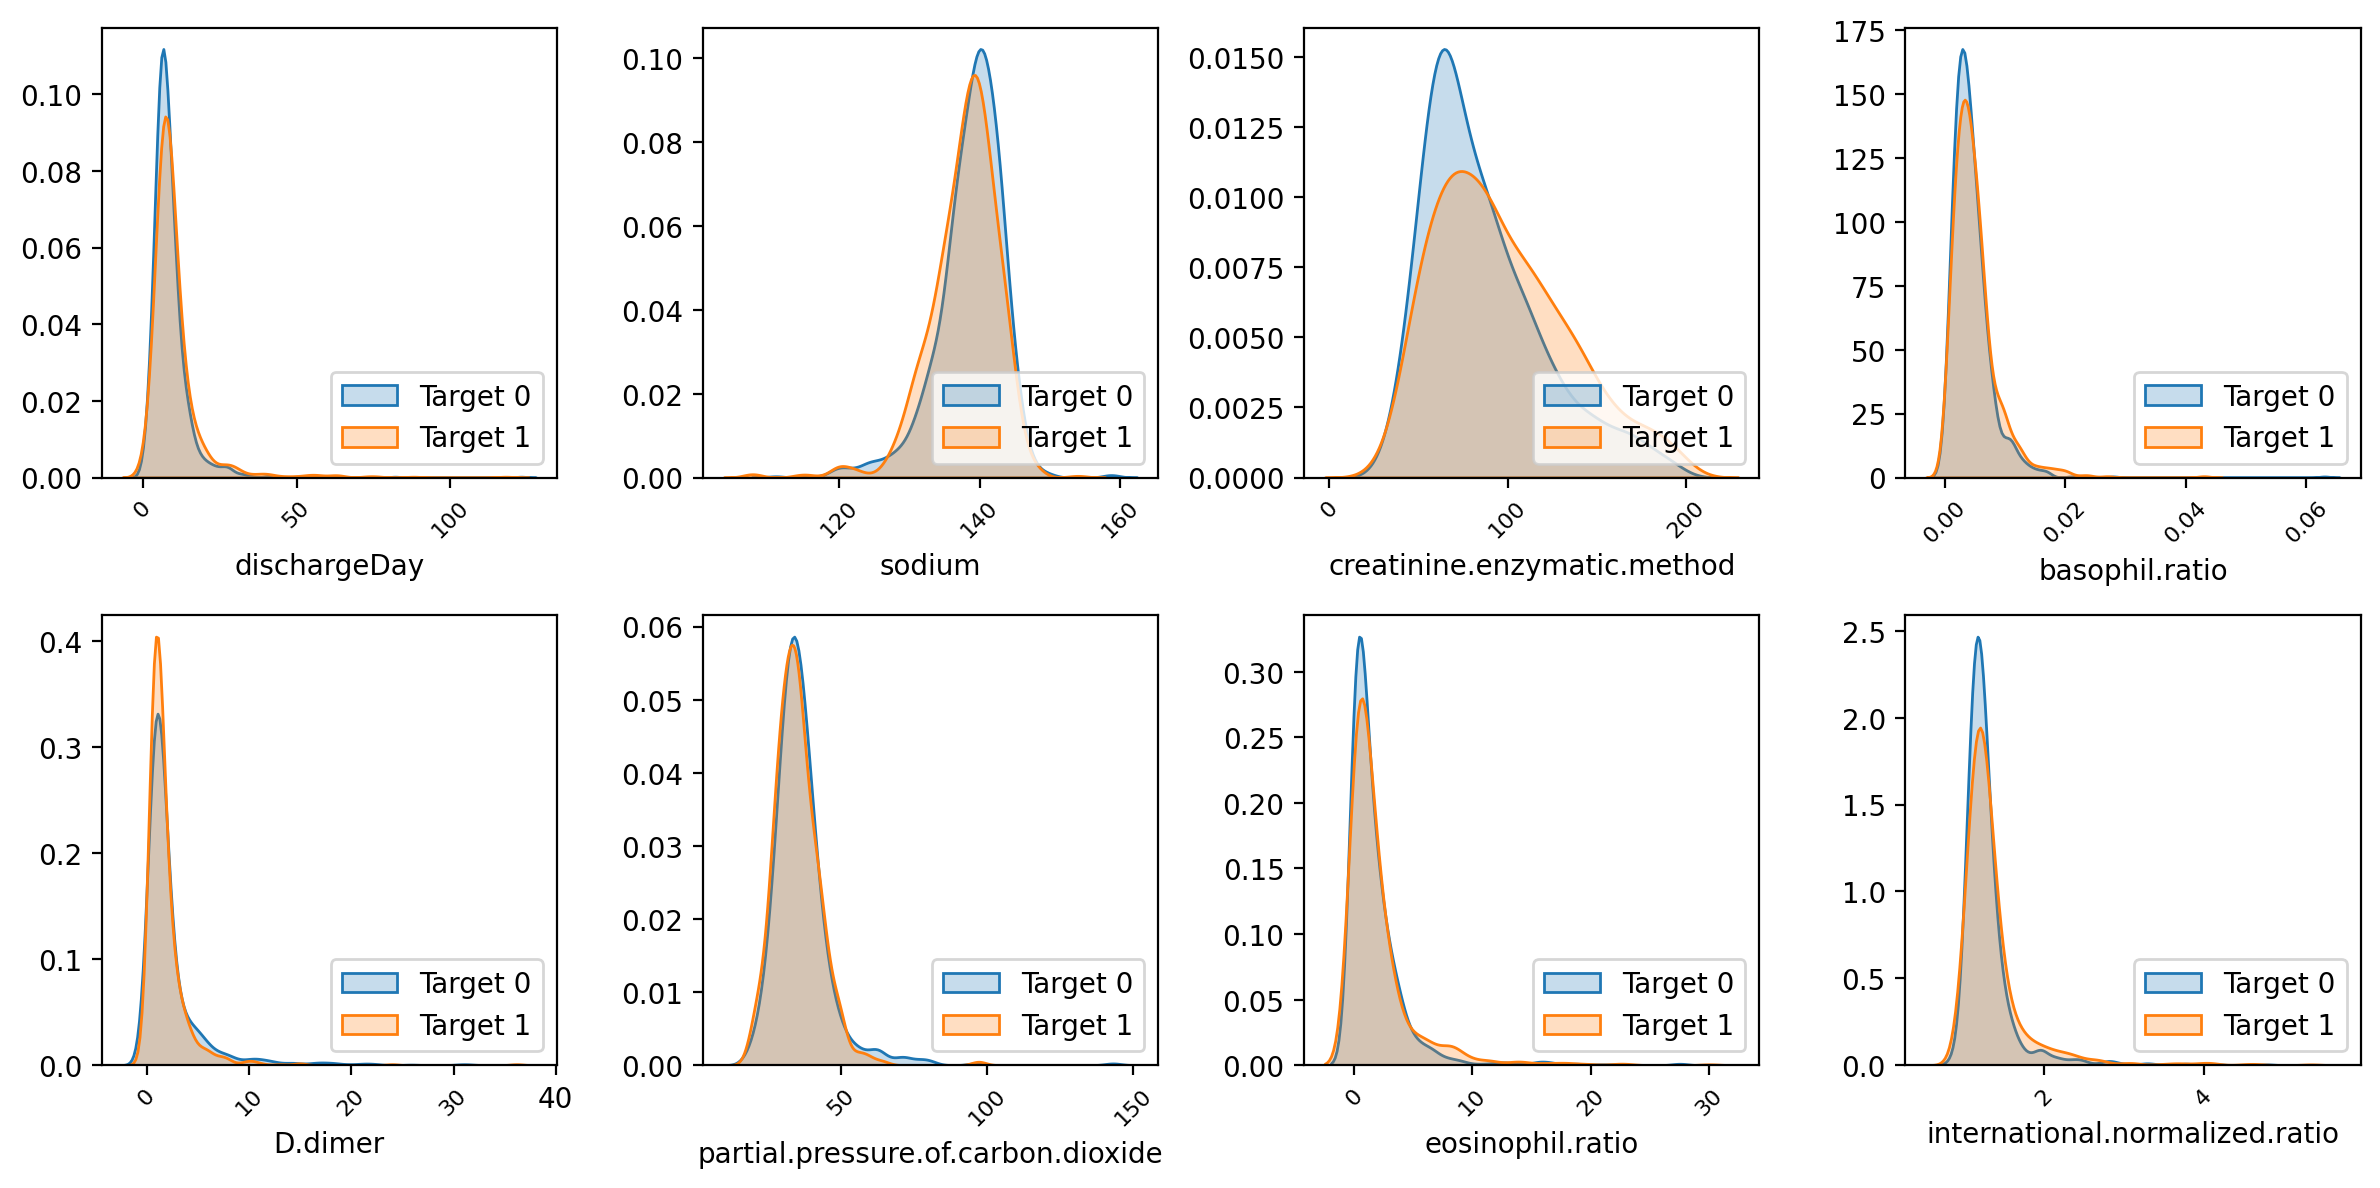

In [274]:
col_inspect = [
    'dischargeDay',
    'sodium',
    'creatinine.enzymatic.method',
    'basophil.ratio',
    'D.dimer',
    'partial.pressure.of.carbon.dioxide',
    'eosinophil.ratio',
    'international.normalized.ratio'
]

fig, axes = plt.subplots(2, 4,figsize=[12,6])
axes = axes.flatten()

for idx, col_name in enumerate(col_inspect):
    plt.sca(axes[idx]) # set the current Axes
    sns.kdeplot(df[df[target_var] == 0][col_name], fill=True, label="Target 0")
    sns.kdeplot(df[df[target_var] == 1][col_name], fill=True, label="Target 1")
    plt.legend(loc='lower right')
    plt.xticks(fontsize=8, rotation = 45) # Rotates X-Axis Ticks by 45-degrees
    plt.ylabel('')

fig.tight_layout()
plt.savefig(str(OUTPUT_FOLDER / 'distribution_wrt_target.pdf'), bbox_inches='tight')
plt.show()

It's really clear the difference in distribution of the `creatinine.enzymatic.method`, we expect it to be very significant in the final models.

### Model selection

Define the models and their parameter grids for grid search.

In [275]:
models_config = {
    'logistic_regression': {
        'model': LogisticRegression(max_iter=10000),
        'param_grid': {
            'penalty': ['l1', 'l2'],
            'solver': ['saga'],
            'C': np.logspace(-3, 2, 20),
            'random_state': [SEED],
            'class_weight': [class_weights]
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'param_grid': {
            'n_estimators': [100, 250, 450, 600],
            'max_depth': [5, 10, 15, 20],
            'criterion' : ['entropy'],
            'oob_score': [True],
            'random_state': [SEED],
            'class_weight': [class_weights]
        }
    },
    'knn': {
        'model': KNeighborsClassifier(),
        'param_grid': {
            'n_neighbors': np.arange(5,80,10)
        }
    },
    'decision_tree_classifier': {
        'model': DecisionTreeClassifier(),
        'param_grid': {
            'criterion': ['entropy','gini'],
            'max_depth': [5,10],
            'min_samples_split': [5,10,20],
            'min_samples_leaf': [5,10],
            'random_state': [SEED]
        }
    },
    'mlp': {
        'model': MLPClassifier(),
        'param_grid': {
            'hidden_layer_sizes': [(10, 5),(100,20,5)],
            'max_iter': [2000],
            'alpha': [0.01],
            'random_state': [SEED]
        }
    },
    'naive_bayes': {
        'model': GaussianNB(),
        'param_grid': {}
    }
}

In [248]:
models = {}

Perform grid search cross-validation for each model and output the test AUC.

We do so on the `X_train_unscaled` version of the dataset, which we saw gives a better performance and doesn't require to unscale the coefficients for interpreting the ODDS ratio.

In [276]:
# %%time
# 
# for name, model in models_config.items():
#     grid_search = GridSearchCV(
#         models_config[name]['model'],
#         param_grid=models_config[name]['param_grid'],
#         cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED),
#         scoring="roc_auc",
#         refit="AUC",
#         return_train_score=True,
#         verbose=0
#     )
#     grid_search.fit(X_train_unscaled[final_features], y_train)
#     models[name] = grid_search

CPU times: user 3min 24s, sys: 3min 10s, total: 6min 35s
Wall time: 1min 59s


Check the output results.

In [277]:
for name, model in models.items():
    print(f'{name:30}| train AUC = {model.score(X_train_unscaled[final_features], y_train):.4f} | test AUC = {model.score(X_test_unscaled[final_features], y_test):.4f}')
    print('-'*80)

logistic_regression           | train AUC = 0.6768 | test AUC = 0.6702
--------------------------------------------------------------------------------
random_forest                 | train AUC = 0.9875 | test AUC = 0.6769
--------------------------------------------------------------------------------
knn                           | train AUC = 0.6210 | test AUC = 0.5681
--------------------------------------------------------------------------------
decision_tree_classifier      | train AUC = 0.6846 | test AUC = 0.5943
--------------------------------------------------------------------------------
mlp                           | train AUC = 0.5030 | test AUC = 0.5028
--------------------------------------------------------------------------------
naive_bayes                   | train AUC = 0.6677 | test AUC = 0.6452
--------------------------------------------------------------------------------


Save for later

In [279]:
# with open(str(OUTPUT_FOLDER / 'models.pkl'), 'wb') as handle:
#     pickle.dump(models, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open(str(OUTPUT_FOLDER / 'models.pkl'), 'rb') as handle:
    models = pickle.load(handle)

## 3. Results

Even though it's not the most performing model, we choose the Logistic Regression for its superior interpretability and simplicity, at the cost of just one percentage point in the performance.

### Cross-validation inspection

Let us analyze the evolution of the `LogisticRegression`

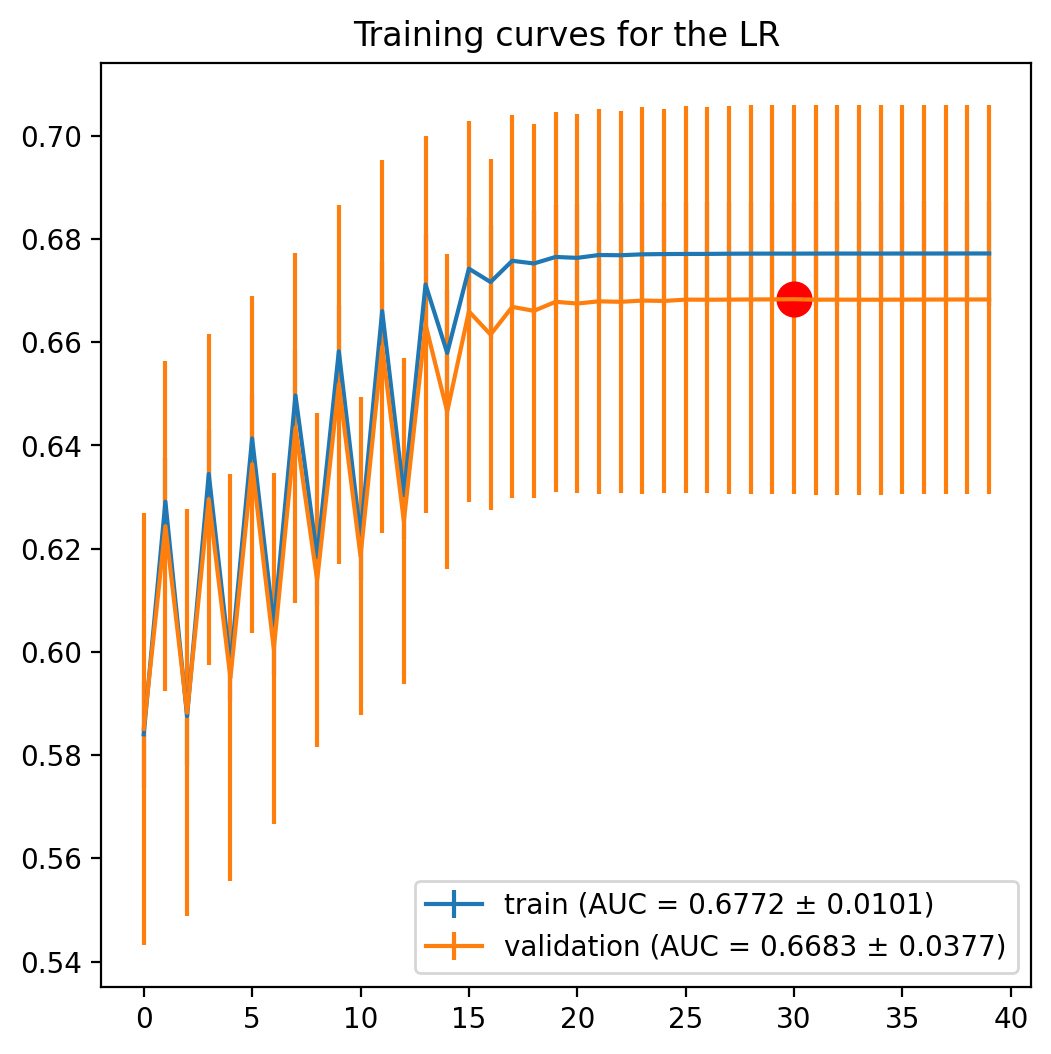

In [280]:
def plot_cv_results(res, title=''):

    m1 = res['mean_test_score']
    s1 = res['std_test_score']
    m2 = res['mean_train_score']
    s2 = res['std_train_score']
    
    j1 = np.argmax(m1) # maximum value of AUC in terms of mean over the CV folds
    
    axisX = list(range(len(m1)))
    plt.errorbar(axisX, m2, s2, label=f'train (AUC = {m2[j1]:.4f} ± {s2[j1]:.4f})')
    plt.errorbar(axisX, m1, s1, label=f'validation (AUC = {m1[j1]:.4f} ± {s1[j1]:.4f})')

    plt.plot(axisX[j1], m1[j1], 'ro', markersize=12)
    plt.legend(loc='lower right')
    plt.title(f'{title}')
    

fig, ax = plt.subplots(1, 1, figsize=(6,6))
#plt.sca(ax[0])
plot_cv_results(models['logistic_regression'].cv_results_, 'Training curves for the LR')
plt.savefig(str(OUTPUT_FOLDER / 'crossvalidation_curve.pdf'), bbox_inches='tight')
plt.show()

### Model analysis

Inspect the best configuration.

In [281]:
models['logistic_regression'].best_params_

{'C': 8.858667904100823,
 'class_weight': {False: 0.8294884653961886, True: 1.2587519025875191},
 'penalty': 'l1',
 'random_state': 42,
 'solver': 'saga'}

Inspect the $\beta_i$ coefficients of the model:

$$
\operatorname{logit}(p(\boldsymbol{X}))
= \log (\operatorname{odds}(p(\boldsymbol{X})))
= \log \left( \frac{p(\boldsymbol{X})}{1-p(\boldsymbol{X})} \right)
= \beta_0 + \beta_1 X_1 + \cdots + \beta_p X_p
$$

where

$$
\boldsymbol{X} = [ X_1 \, X_2 \cdots X_p] \in \mathbb{R}^{n \times p}
\quad
\boldsymbol{\beta} = [ \beta_0 \, \beta_1 \, \beta_2 \cdots \beta_p] \in \mathbb{R}^{p+1}
$$

In [283]:
coeff = pd.DataFrame()
coeff['feature'] = X_test_unscaled[final_features].columns
coeff['beta'] = models['logistic_regression'].best_estimator_.coef_[0]
coeff['exp_beta'] = np.exp(coeff['beta'])
coeff = coeff.sort_values(by=['beta'])

coeff

feature      beta  exp_beta
0                         occupation_farmer -0.697343  0.497907
2         glutamic.pyruvic.transaminase_log -0.130542  0.877620
8                                   D.dimer -0.091132  0.912897
9        partial.pressure.of.carbon.dioxide -0.026081  0.974256
4                                    sodium -0.004881  0.995131
6                            basophil.ratio  0.005457  1.005472
5               creatinine.enzymatic.method  0.006581  1.006603
1                              dischargeDay  0.029357  1.029792
10                         eosinophil.ratio  0.048606  1.049806
7   NYHA.cardiac.function.classification_IV  0.359886  1.433166
11                            diabetes_True  0.404874  1.499114
12           international.normalized.ratio  0.407376  1.502868
3                type.of.heart.failure_Both  0.550181  1.733567

In [284]:
coeff.to_latex(
    str(OUTPUT_FOLDER / 'final_lr_coeff.tex'),
    index=False,
    formatters={"name": str.upper},
    float_format="{:.4f}".format,
    caption="Logistic Regression coefficients.",
    label='tab:lr-coeff'
)

/var/folders/1n/5l6269bd647d957r5df7_hj80000gn/T/ipykernel_22084/716557692.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  coeff.to_latex(


[This website](https://stats.oarc.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/) provides an insightful interpretation of the coefficients in a logistic regression model.

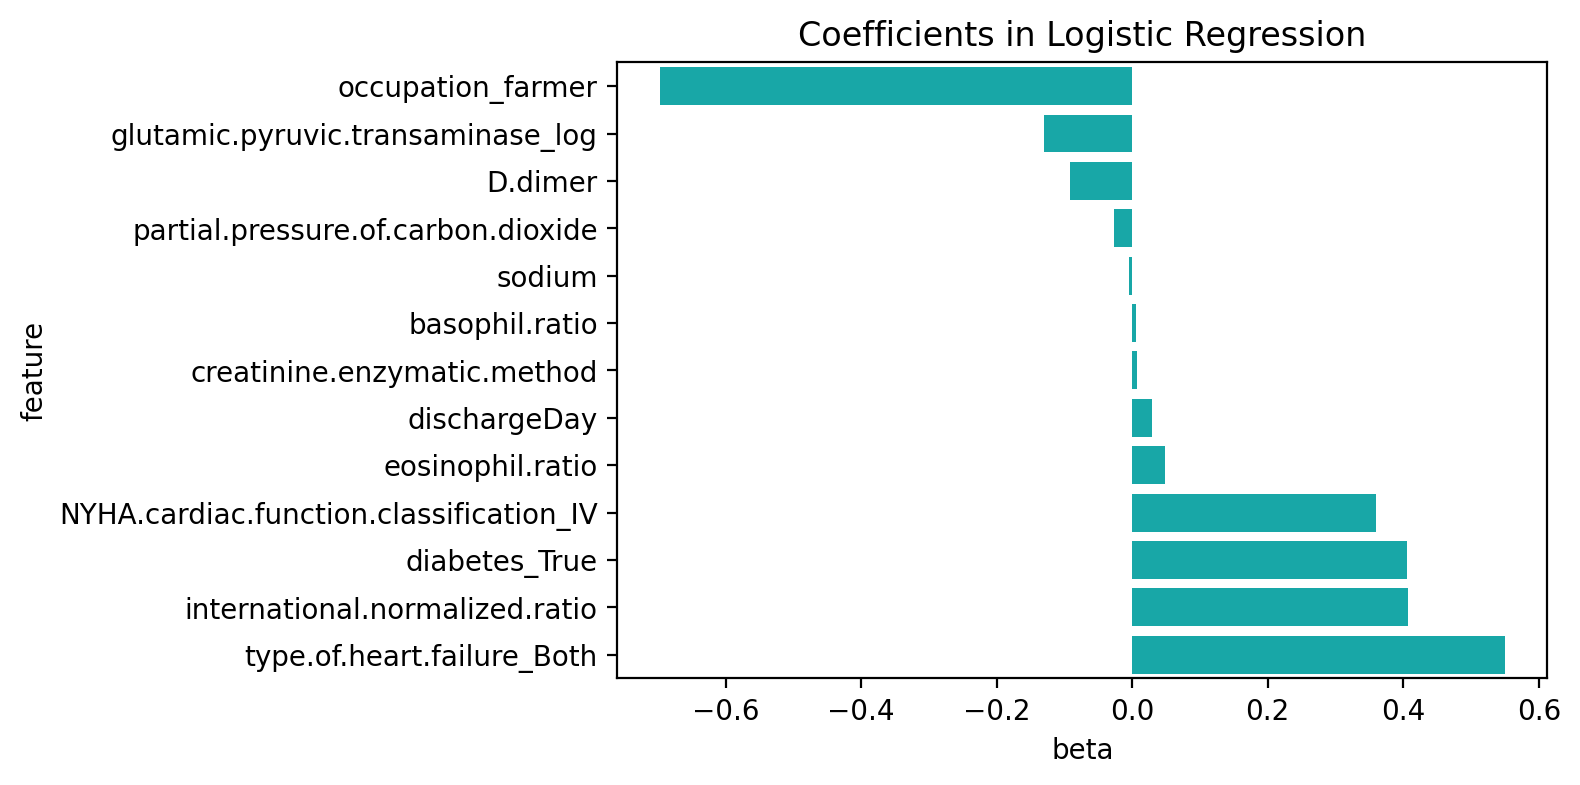

In [285]:
fig, ax = plt.subplots(figsize=(6,4))

sns.barplot(data=coeff[abs(coeff.beta) > 0.00], x='beta', y='feature', color='c')
plt.title('Coefficients in Logistic Regression')
plt.savefig(str(OUTPUT_FOLDER / 'feature_importance_weightsLogisticRegression.pdf'), bbox_inches='tight')
plt.show()

### Performance evaluation

Print the AUC

In [286]:
AUC = models['logistic_regression'].score(X_test_unscaled[final_features], y_test)
print(f'AUC: {AUC:.4f}')

AUC: 0.6702


Set a threshold for the score and print the classification metrics.

In [287]:
classification_threshold = 0.50
y_score = models['logistic_regression'].predict_proba(X_test_unscaled[final_features])[:,1]
y_pred = (y_score >= classification_threshold).astype(bool)

In [314]:
report = classification_report(y_test, y_pred, output_dict=True)
accuracy = report.pop('accuracy')
print(f'Accuracy: {accuracy}')
report = pd.DataFrame(report).transpose()
report = report.astype({'support':'int64'})
report

Accuracy: 0.636986301369863


precision    recall  f1-score  support
False          0.724359  0.642045  0.680723      176
True           0.536765  0.629310  0.579365      116
macro avg      0.630562  0.635678  0.630044      292
weighted avg   0.649835  0.636986  0.640457      292

In [316]:
report.to_latex(
    str(OUTPUT_FOLDER / 'classification_report.tex'),
    index=False,
    formatters={"name": str.upper},
    float_format="{:.4f}".format,
    caption="Classification Report.",
    label='tab:classification-report'
)

/var/folders/1n/5l6269bd647d957r5df7_hj80000gn/T/ipykernel_22084/2762341394.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  report.to_latex(


Print the confusion matrix

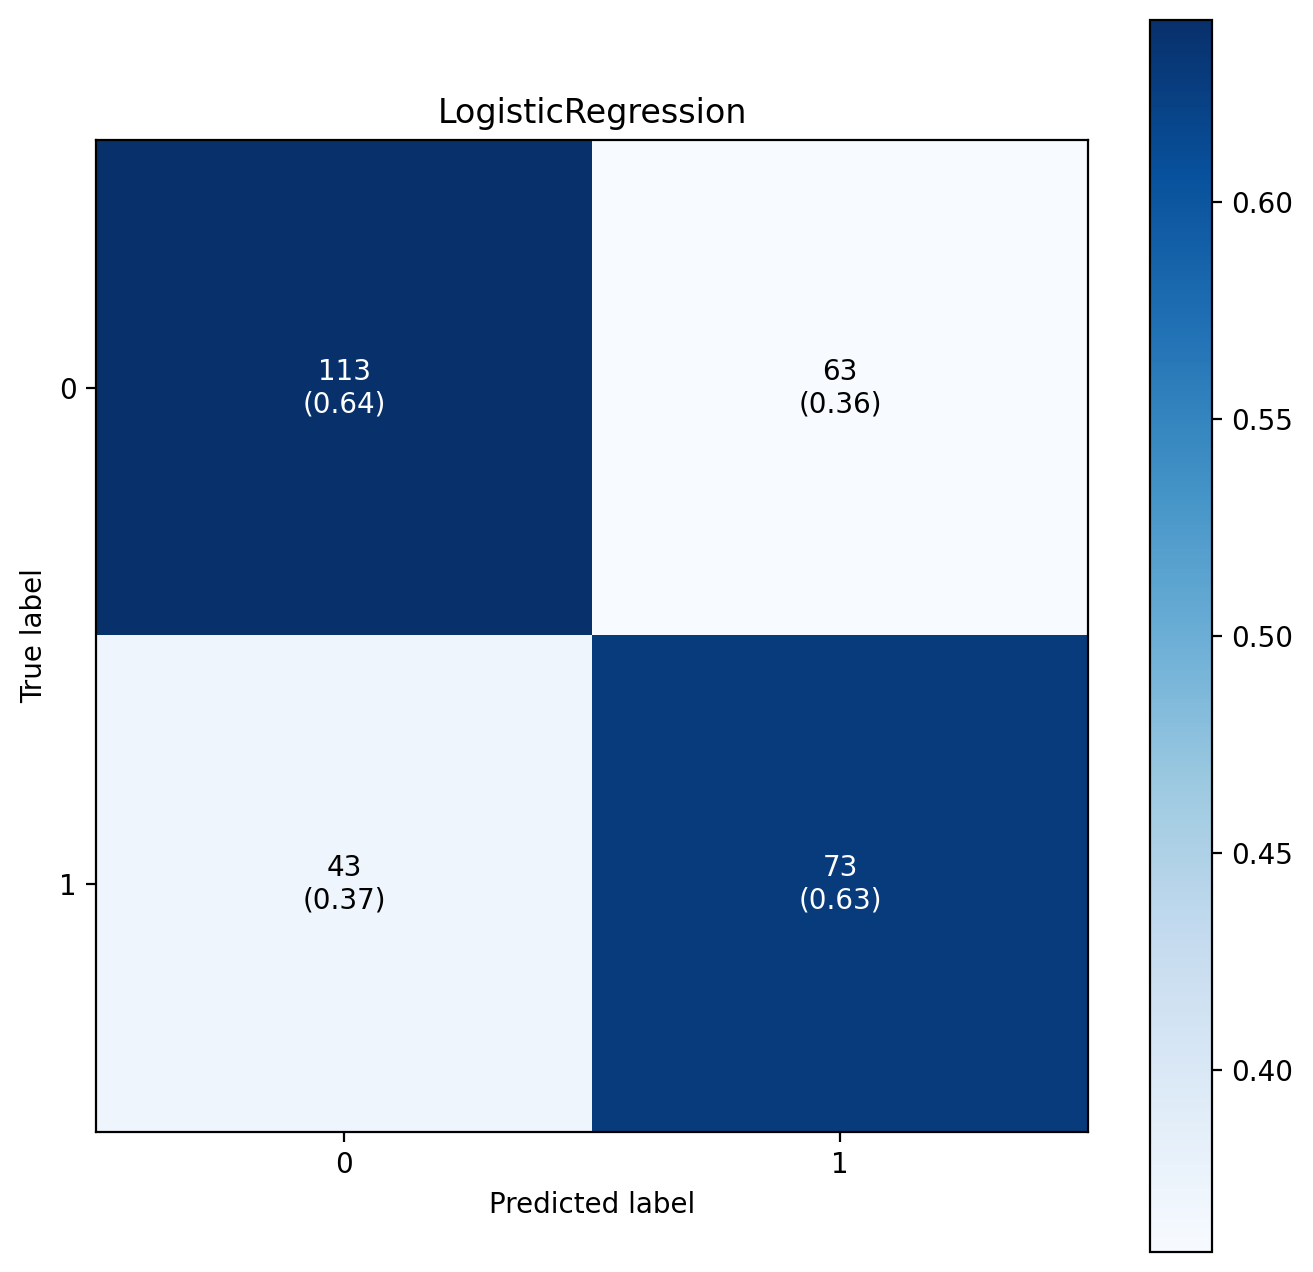

In [320]:
fig, ax = plt.subplots(figsize=(8,8))

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
ax.set_title(models['logistic_regression'].best_estimator_.__class__.__name__)
plot_confusion_matrix(conf_mat=cm,
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True, figure=fig, axis=ax)

ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')

plt.savefig(str(OUTPUT_FOLDER / 'confusion_matrix_LR.pdf'), bbox_inches='tight')
plt.show()

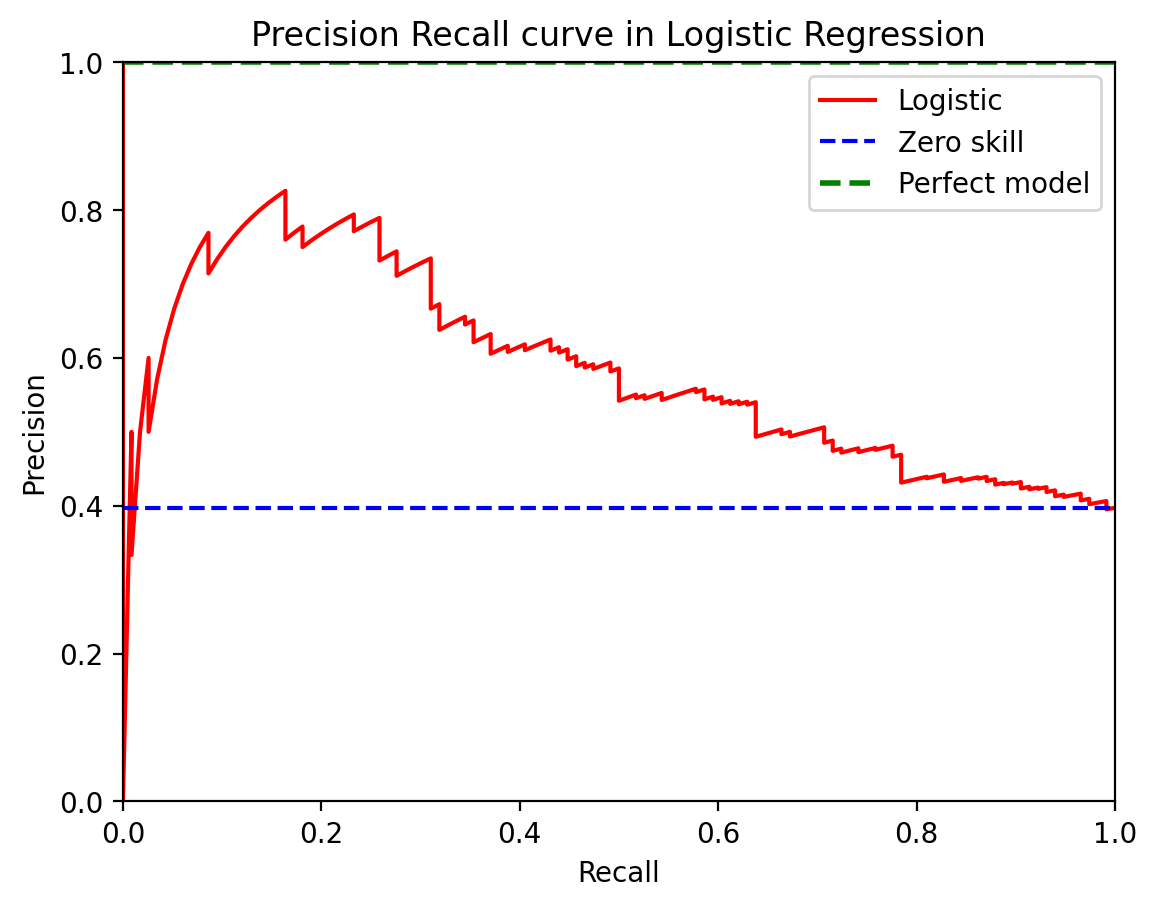

In [321]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_score)

# Compute the zero skill model line
# It will depend on the fraction of observations belonging to the positive class
zero_skill = len(y_test[y_test==1]) / len(y_test)

# Compute the perfect model line
perfect_precision = np.ones_like(recalls)
perfect_recall = np.linspace(0, 1, num=len(perfect_precision))

plt.plot(recalls, precisions, 'r-', label='Logistic')
plt.plot([0, 1], [zero_skill, zero_skill], 'b--', label='Zero skill')
plt.plot(perfect_recall, perfect_precision, 'g--', linewidth=2, label='Perfect model')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.axis([0, 1, 0, 1])
#plt.grid()
plt.title('Precision Recall curve in Logistic Regression')
plt.legend()
plt.savefig(str(OUTPUT_FOLDER / 'precision_recall_curve_LR.pdf'), bbox_inches='tight')
plt.show()

### Model comparison

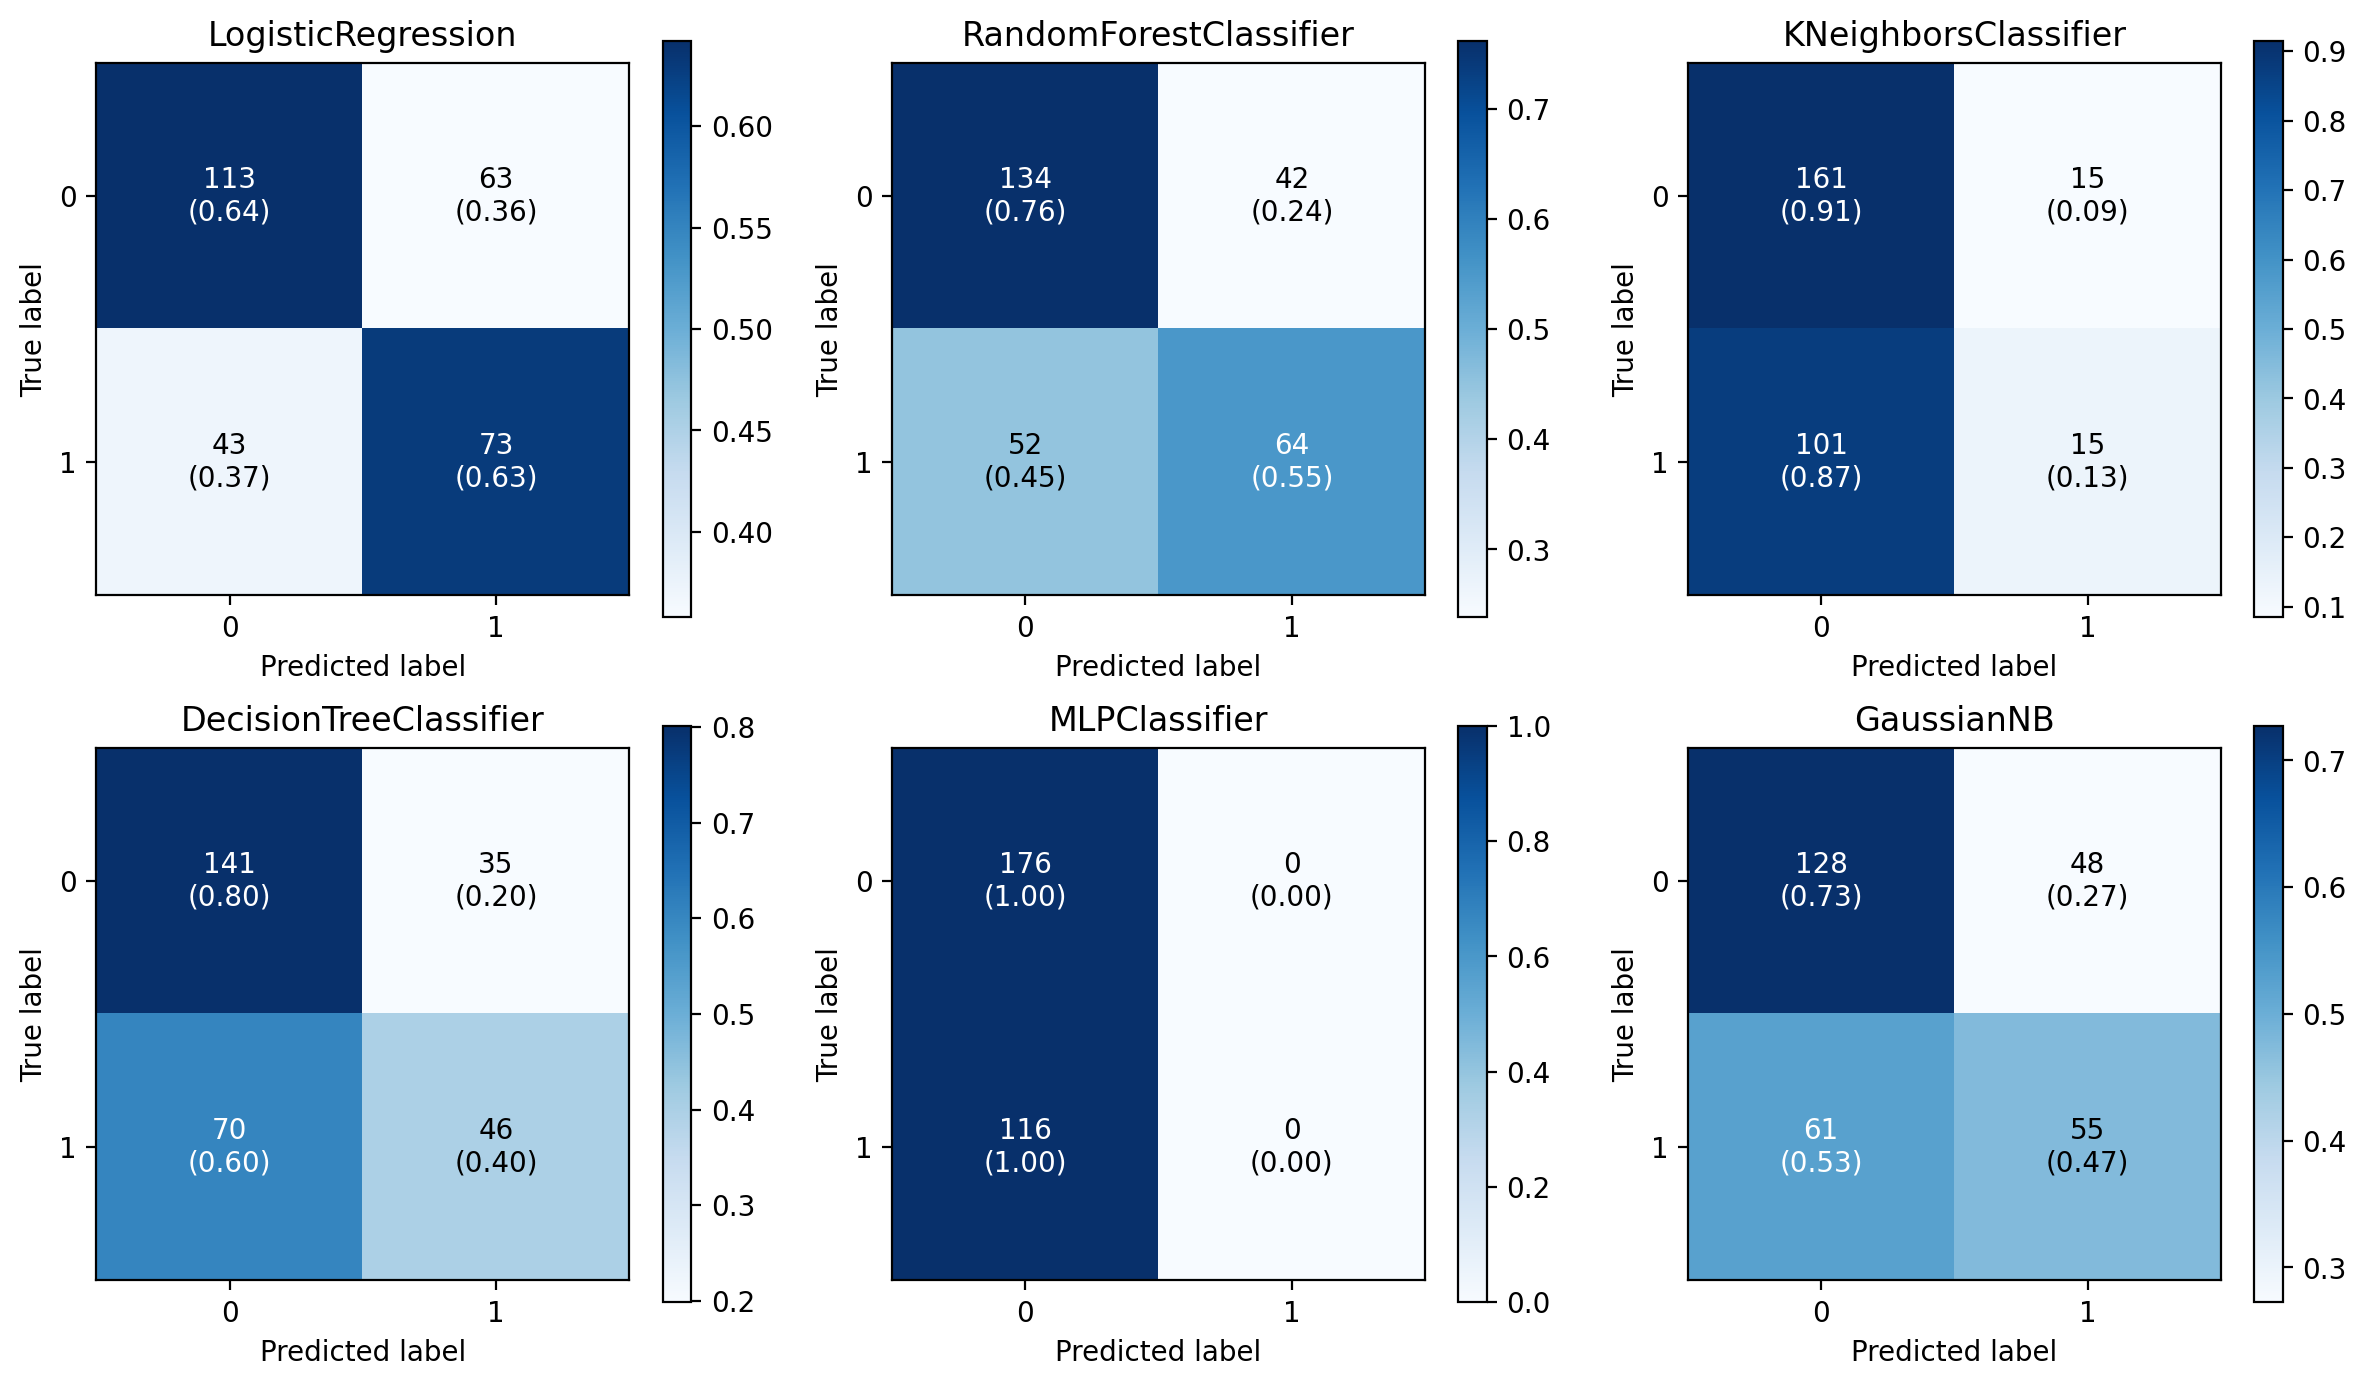

In [322]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,7))#, height_ratios = [1,3])
axes = axes.flatten()

rows = []
i = 0
roc_details = {}

for name, model in models.items():

    # Make predictions on the testing set
    y_score = model.predict_proba(X_test_unscaled[final_features])[:,1]
    y_pred = (y_score >= classification_threshold).astype(bool)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    #sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d', ax=axes[0,i])
    axes[i].set_title(model.best_estimator_.__class__.__name__)
    plot_confusion_matrix(conf_mat=cm,
                          show_absolute=True,
                          show_normed=True,
                          colorbar=True, figure=fig, axis=axes[i])

    axes[i].set_xlabel('Predicted label')
    axes[i].set_ylabel('True label')

    # Calculate the ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    # Save for later
    roc_details[model.best_estimator_.__class__.__name__] = {
        'fpr': fpr,
        'tpr': tpr,
        'roc_auc': roc_auc
    }

    # Save for later
    row = {
        'Model': model.best_estimator_.__class__.__name__,
        'AUC': roc_auc,
    }

    # Append the row to the list
    rows.append(row)

    i += 1

plt.tight_layout()
plt.savefig(str(OUTPUT_FOLDER / 'confusion_matrices.pdf'), bbox_inches='tight')
plt.show()

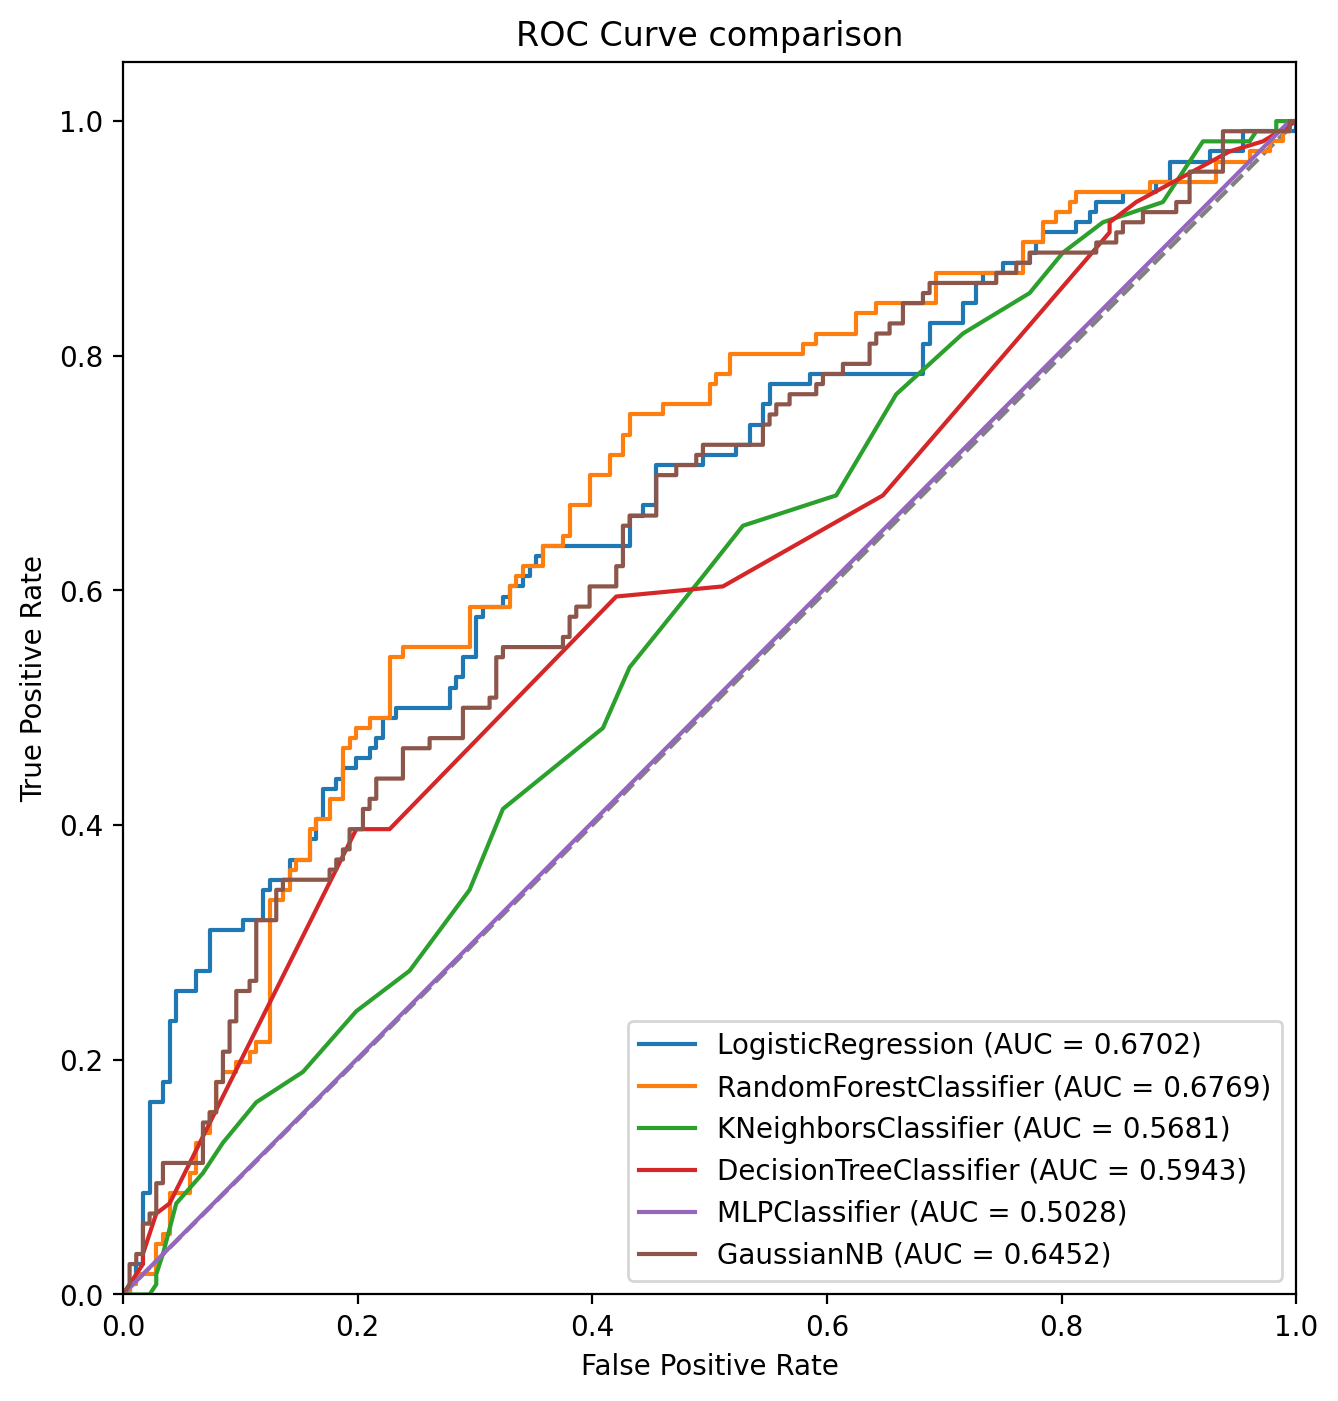

In [323]:
# Plot the ROC curve
fig, ax = plt.subplots(figsize=(8,8))

ax.plot([0, 1], [0, 1], linestyle='--', color='gray')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

for key, values in roc_details.items():
    ax.plot(values['fpr'], values['tpr'], label=key + ' (AUC = %0.4f)' % values['roc_auc'])

ax.set_title('ROC Curve comparison')
ax.legend(loc="lower right")
ax.set_aspect('equal')
ax.set_aspect('equal')
plt.savefig(str(OUTPUT_FOLDER / 'roc_comparison.pdf'), bbox_inches='tight')
plt.show()

In [324]:
df_performance = pd.DataFrame(rows)
df_performance = df_performance.sort_values('AUC', ascending=False)
df_performance

Model       AUC
1  RandomForestClassifier  0.676871
0      LogisticRegression  0.670161
5              GaussianNB  0.645156
3  DecisionTreeClassifier  0.594338
2    KNeighborsClassifier  0.568059
4           MLPClassifier  0.502841

In [325]:
df_performance.to_latex(
    str(OUTPUT_FOLDER / 'performance_table.tex'),
    index=False,
    formatters={"name": str.upper},
    float_format="{:.4f}".format,
    caption="Comparison of performance.",
    label='tab:performance'
)

/var/folders/1n/5l6269bd647d957r5df7_hj80000gn/T/ipykernel_22084/1853442806.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_performance.to_latex(


### Export for web app

Having assessed the performance of the model, refit on the entire dataset and export for the webapp

In [327]:
final_features_webapp = [
    'occupation',
    'dischargeDay',
    'glutamic.pyruvic.transaminase',
    'type.of.heart.failure',
    'sodium',
    'creatinine.enzymatic.method',
    'basophil.ratio',
    'NYHA.cardiac.function.classification',
    'D.dimer',
    'partial.pressure.of.carbon.dioxide',
    'eosinophil.ratio',
    'diabetes',
    'international.normalized.ratio'
]

In [355]:
cols_numerical, cols_categorical = get_num_cat(df)
cols_numerical = cols_numerical.tolist()
cols_categorical = cols_categorical.tolist()
cols_categorical.remove(target_var)

X = df.drop([target_var], axis=1)
y = df[target_var]

imputer = KNNImputer(n_neighbors=5)
X = pd.concat([pd.DataFrame(imputer.fit_transform(X[cols_numerical]), columns=cols_numerical).reset_index(), X[cols_categorical].reset_index()], axis=1)

In [356]:
X = X[final_features_webapp]

Now I save all the information for the web app

In [357]:
cols_numerical, cols_categorical = get_num_cat(X)

with open(str(OUTPUT_FOLDER / 'cols_numerical.pkl'), 'wb') as handle:
    pickle.dump(cols_numerical, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open(str(OUTPUT_FOLDER / 'cols_categorical.pkl'), 'wb') as handle:
    pickle.dump(cols_categorical, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [358]:
def generate_column_info(dataframe):
    column_info = {}
    for column in dataframe.columns:
        column_type = dataframe[column].dtype
        if column_type == 'object' or pd.api.types.is_categorical_dtype(column_type):
            unique_values = dataframe[column].unique().tolist()
            column_info[column] = {"type": "category", "value": unique_values}
        elif pd.api.types.is_bool_dtype(column_type):
            unique_values = dataframe[column].unique().tolist()
            column_info[column] = {"type": "binary", "value": unique_values}
        elif pd.api.types.is_numeric_dtype(column_type):
            min_value = dataframe[column].min()
            max_value = dataframe[column].max()
            if pd.api.types.is_integer_dtype(column_type):
                column_info[column] = {"type": "integer", "value": [min_value, max_value]}
            else:
                column_info[column] = {"type": "continuous", "value": [min_value, max_value]}
    return column_info

# Generate column information dictionary
column_info = generate_column_info(X)

# Dump into file
with open(str(OUTPUT_FOLDER / 'column_info.pkl'), 'wb') as handle:
    pickle.dump(column_info, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [360]:
X['glutamic.pyruvic.transaminase_log'] = X['glutamic.pyruvic.transaminase'].apply(lambda x: np.log(x+0.001))
X = X.drop('glutamic.pyruvic.transaminase', axis=1)

In [362]:
# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='if_binary')

# Fit the encoder on the training data
encoder.fit(X[cols_categorical])

# Transform the categorical columns in both train and test data
X_encoded = pd.DataFrame(encoder.transform(X[cols_categorical]), columns=encoder.get_feature_names_out(cols_categorical))

# Concatenate the encoded features with the original numerical columns
X = pd.concat([X.drop(cols_categorical, axis=1).reset_index(drop=True), X_encoded.reset_index(drop=True)], axis=1)

with open(str(OUTPUT_FOLDER / 'encoder.pkl'), 'wb') as handle:
    pickle.dump(encoder, handle, protocol=pickle.HIGHEST_PROTOCOL)

Fit using the entire dataset.

In [363]:
final_model = LogisticRegression(max_iter=10000, penalty='l2', C=9, class_weight=class_weights)
final_model.fit(X, y)

LogisticRegression(C=9,
                   class_weight={False: 0.8294884653961886,
                                 True: 1.2587519025875191},
                   max_iter=10000)

In [364]:
with open(str(OUTPUT_FOLDER / 'final_model.pkl'), 'wb') as handle:
    pickle.dump(final_model, handle, protocol=pickle.HIGHEST_PROTOCOL)